In [26]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
import joblib
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sys.path.append("../scripts/")

In [28]:
from feature_creation import * 
from training import create_groupkfolds
import config

In [7]:
df = pd.read_csv(config.TRAINING_DATA_PATH)

In [8]:
model = 'adhoc'
fold =0
feature_pipeline = Pipeline(steps=[
                ("Language Features",LanguageFeature()),
                ("Graph Features",GraphFeatures()),
                ("Node Features",NodeFeatures()),
                ("Dataset Creation",FormatDataFrame()),
                ("Language One Hot Encoding",LanguageOHE(enc_lan=f"{model}/lan_encoder_{model}_{fold}.pkl",\
                                                         enc_lan_family=f"{model}/lan_family_encoder_{model}_{fold}.pkl"))
            ])
    

train_data = feature_pipeline.fit_transform(df) 

Langauge Feature Started
Langauge Feature Ended
Graph Features Creation Started
Graph Feature Creation Ended
Node Features Creation Started
Node Features Creation Ended
DataFrame Creation Started
DataFrame Creation Ended!!
One Hot Encoding Started
One Hot Encoding created and Saved


In [15]:
train_data.to_csv('../data/train_data_adhoc.csv',index=False)

In [6]:
# Get columns with null values
null_columns = train_data.columns[train_data.isnull().any()].tolist()
print("\nColumns containing null values:")
for col in null_columns:
    print(f"- {col}")



Columns containing null values:


In [9]:
train_data.head()

eccentricity  degree_cent  harmoni_cent  betweeness_cent  page_cent  \
0      0.714286          0.5      0.423577         0.144828   0.560736   
1      0.857143          0.0      0.094919         0.000000   0.047986   
2      0.571429          1.0      0.727544         0.406897   1.000000   
3      0.714286          0.0      0.250059         0.000000   0.007641   
4      0.428571          0.5      0.767919         0.496552   0.416681   

   eigen_cent  closeness_cent  katz_cent  information_cent  load_centrality  \
0    0.342448        0.304348   0.489002          0.304348         0.144828   
1    0.116679        0.132075   0.004617          0.132075         0.000000   
2    0.644085        0.512605   0.945117          0.512605         0.406897   
3    0.254916        0.285714   0.050228          0.285714         0.000000   
4    0.747263        0.730769   0.588540          0.730769         0.496552   

   ...  language_group_Indo-Aryan  language_group_Japonic  \
0  ...                        0.0                     1.0   
1  ...                        0.0                     1.0   
2  ...                        0.0                     1.0   
3  ...                        0.0                     1.0   
4  ...                        0.0                     1.0   

   language_group_Koreanic  language_group_Kra-Dai  language_group_Romance  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     0.0   
4                      0.0                     0.0                     0.0   

   language_group_Semitic  language_group_Sino-Tibetan  language_group_Slavic  \
0                     0.0                          0.0                    0.0   
1                     0.0                          0.0                    0.0   
2                     0.0                          0.0                    0.0   
3                     0.0                          0.0                    0.0   
4                     0.0                          0.0                    0.0   

   language_group_Turkic  language_group_Uralic  
0                    0.0                    0.0  
1                    0.0                    0.0  
2                    0.0                    0.0  
3                    0.0                    0.0  
4                    0.0                    0.0  

[5 rows x 623 columns]

In [9]:
# Create a function to plot distribution and log distribution
def plot_distribution(data, feature, figsize=(12,4)):
    plt.figure(figsize=figsize)
    
    # Original distribution
    plt.subplot(121)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    
    # Log transformed distribution
    plt.subplot(122)
    sns.histplot(np.log1p(data[feature]), kde=True)
    plt.title(f'Distribution of log({feature})')
    plt.xlabel(f'log({feature})')
    
    plt.tight_layout()
    plt.show()

# Get numeric columns only
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns



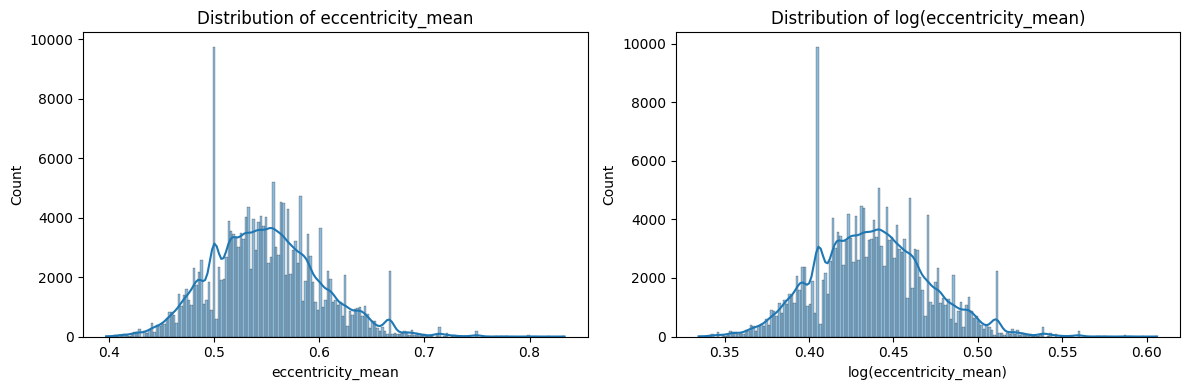


Feature: eccentricity_mean
Original skewness: 0.40
Log-transformed skewness: 0.29
Recommendation: Consider log transformation
--------------------------------------------------


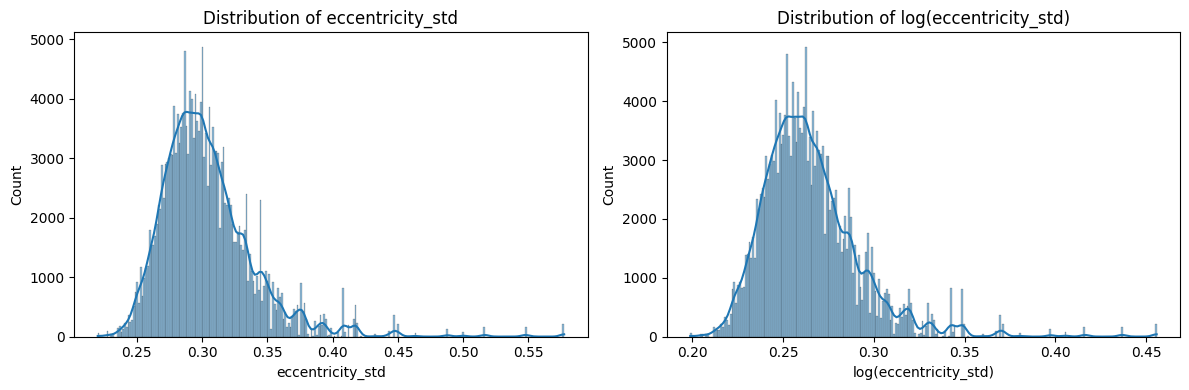


Feature: eccentricity_std
Original skewness: 1.82
Log-transformed skewness: 1.58
Recommendation: Consider log transformation
--------------------------------------------------


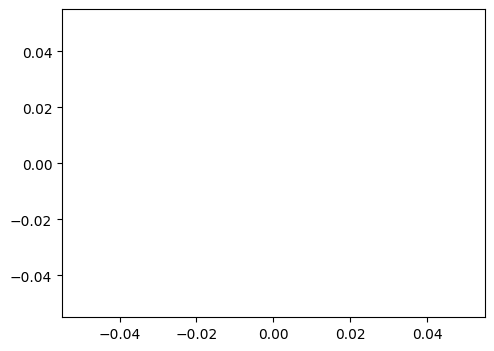

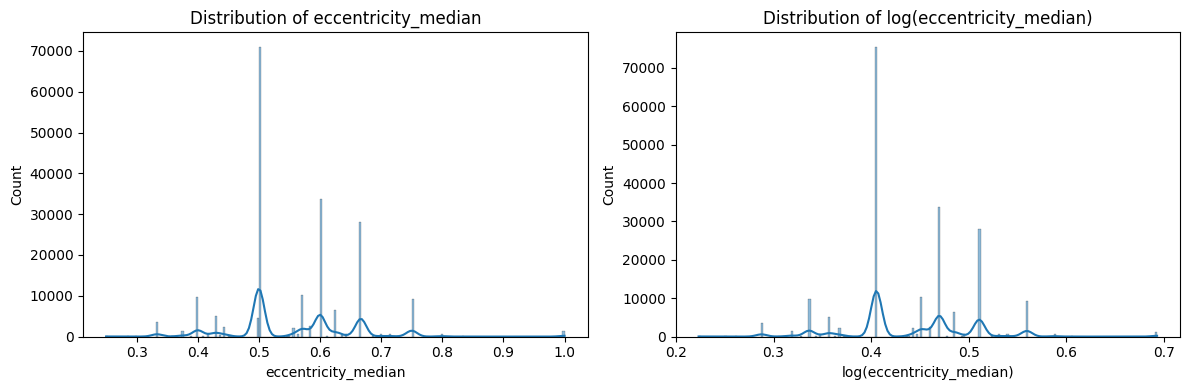


Feature: eccentricity_median
Original skewness: 0.55
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


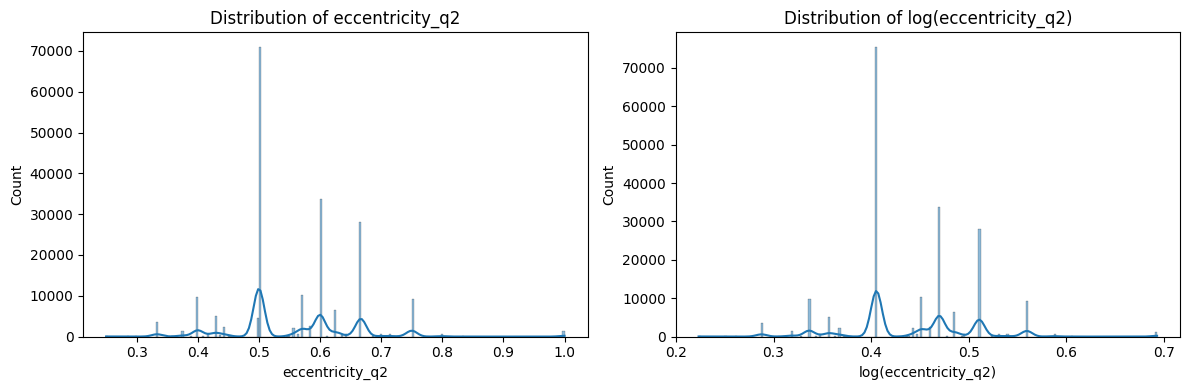


Feature: eccentricity_q2
Original skewness: 0.55
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


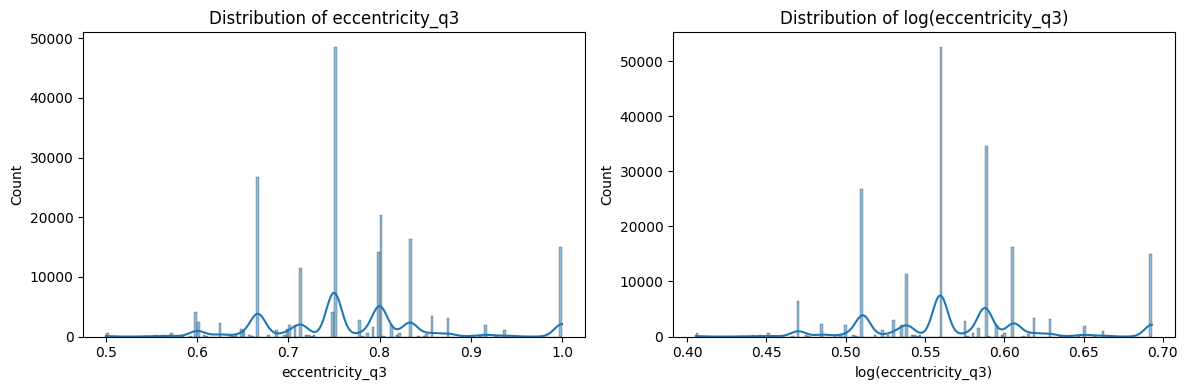


Feature: eccentricity_q3
Original skewness: 0.65
Log-transformed skewness: 0.46
Recommendation: Consider log transformation
--------------------------------------------------


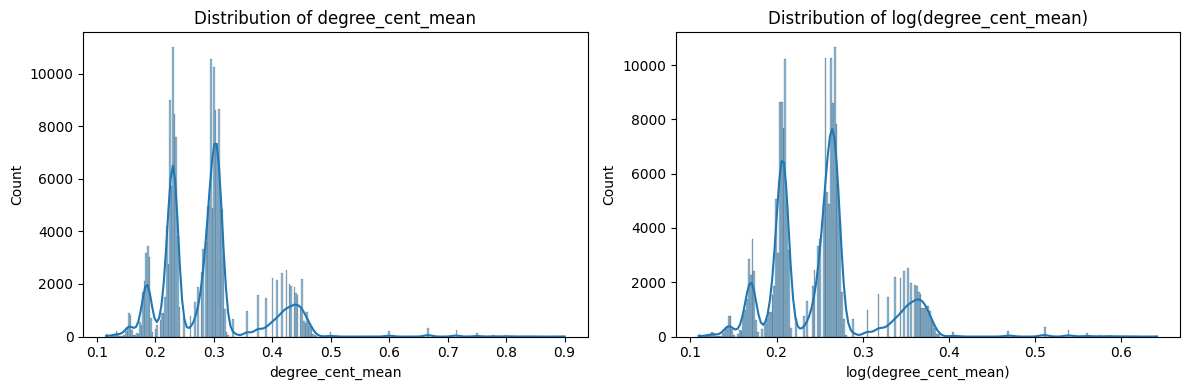


Feature: degree_cent_mean
Original skewness: 1.37
Log-transformed skewness: 1.05
Recommendation: Consider log transformation
--------------------------------------------------


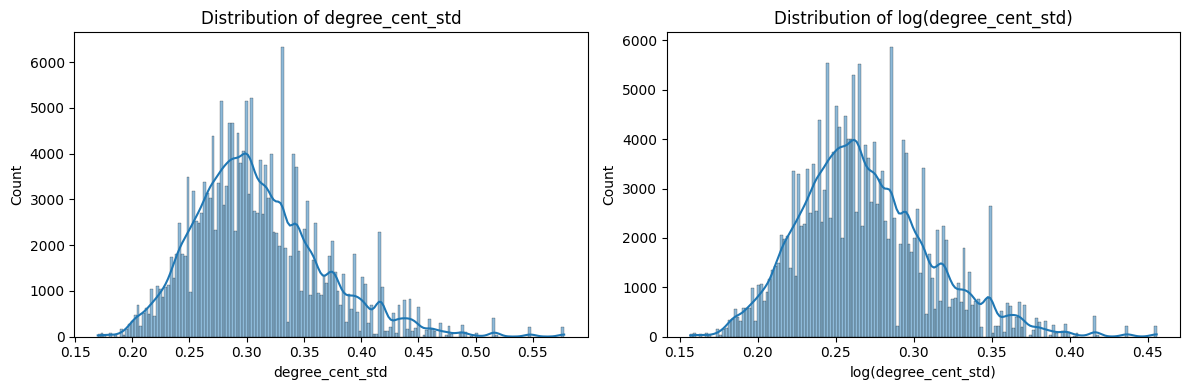


Feature: degree_cent_std
Original skewness: 0.78
Log-transformed skewness: 0.63
Recommendation: Consider log transformation
--------------------------------------------------


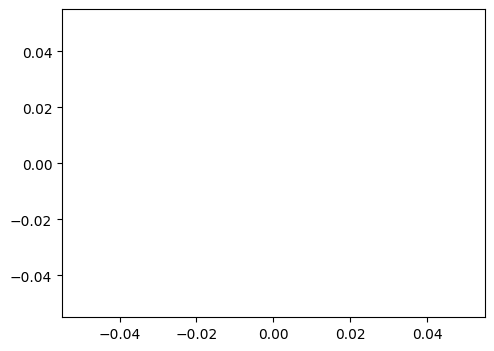

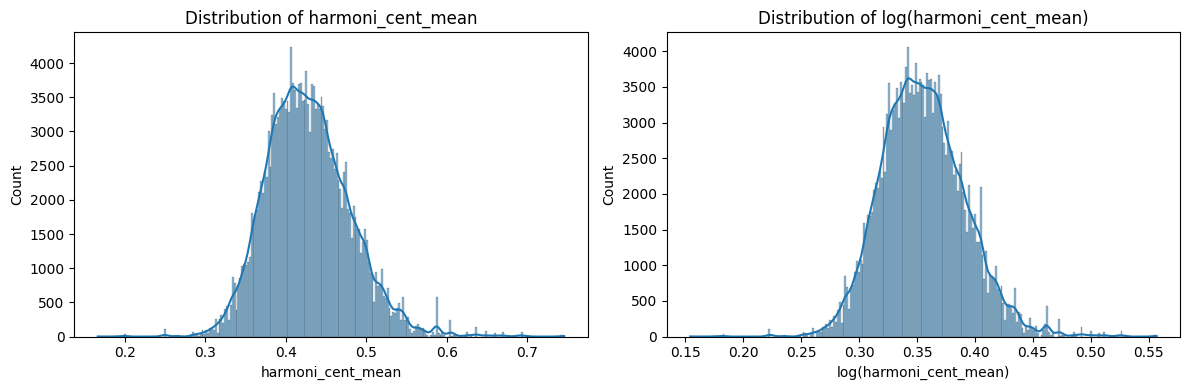


Feature: harmoni_cent_mean
Original skewness: 0.53
Log-transformed skewness: 0.38
Recommendation: Consider log transformation
--------------------------------------------------


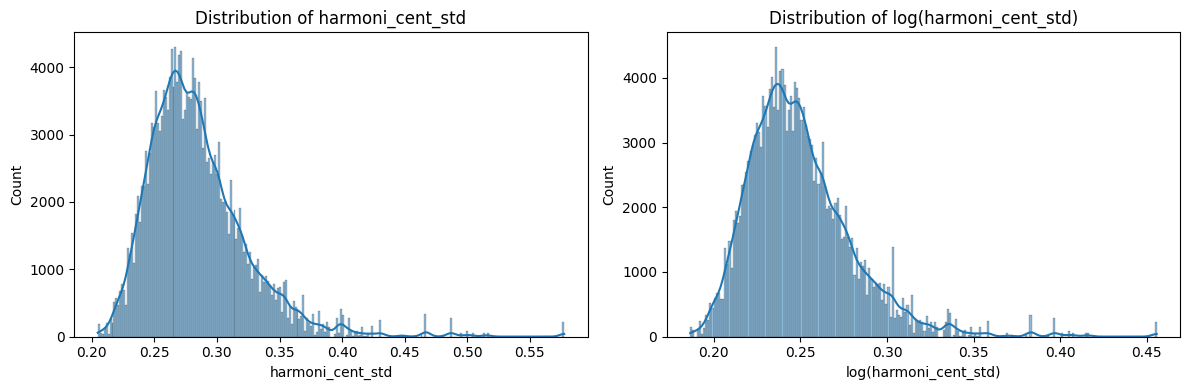


Feature: harmoni_cent_std
Original skewness: 1.63
Log-transformed skewness: 1.41
Recommendation: Consider log transformation
--------------------------------------------------


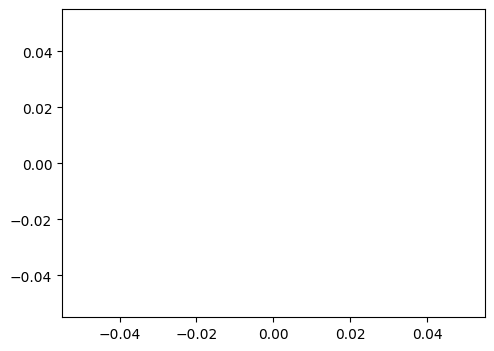

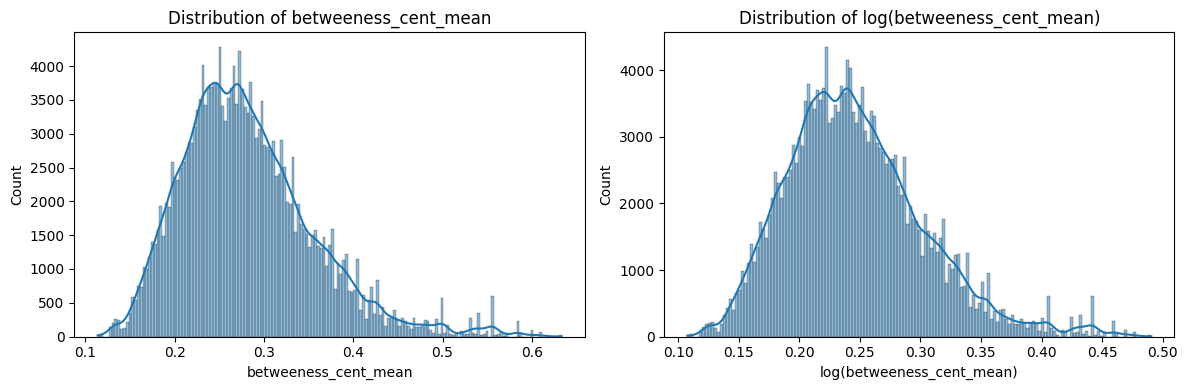


Feature: betweeness_cent_mean
Original skewness: 0.93
Log-transformed skewness: 0.72
Recommendation: Consider log transformation
--------------------------------------------------


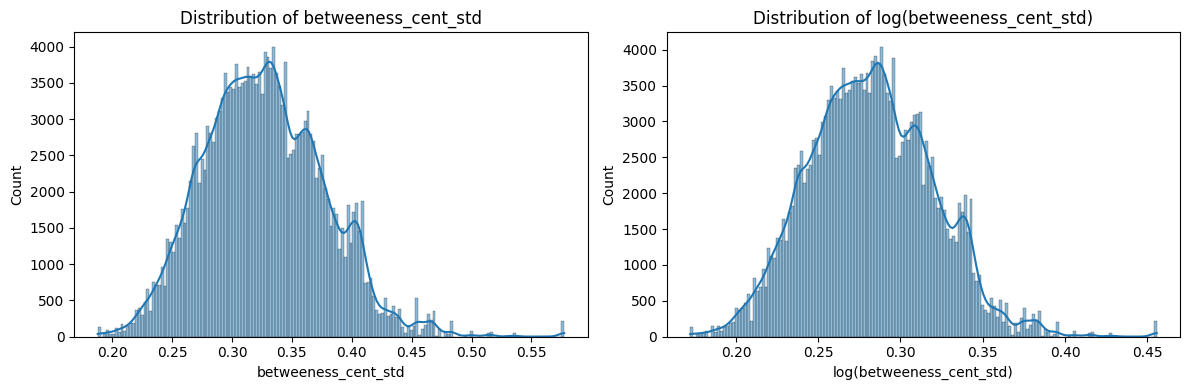


Feature: betweeness_cent_std
Original skewness: 0.38
Log-transformed skewness: 0.26
Recommendation: Consider log transformation
--------------------------------------------------


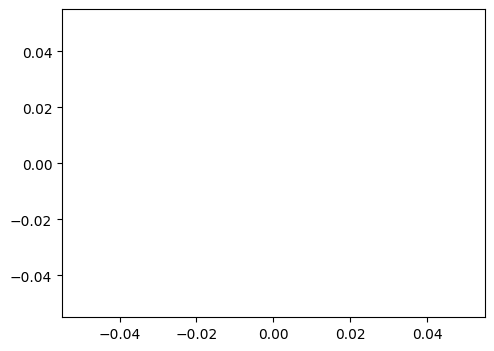

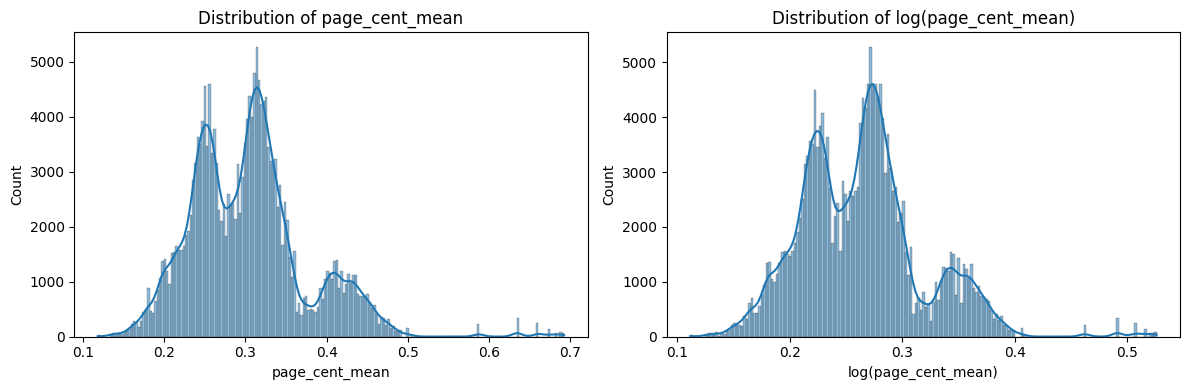


Feature: page_cent_mean
Original skewness: 0.96
Log-transformed skewness: 0.71
Recommendation: Consider log transformation
--------------------------------------------------


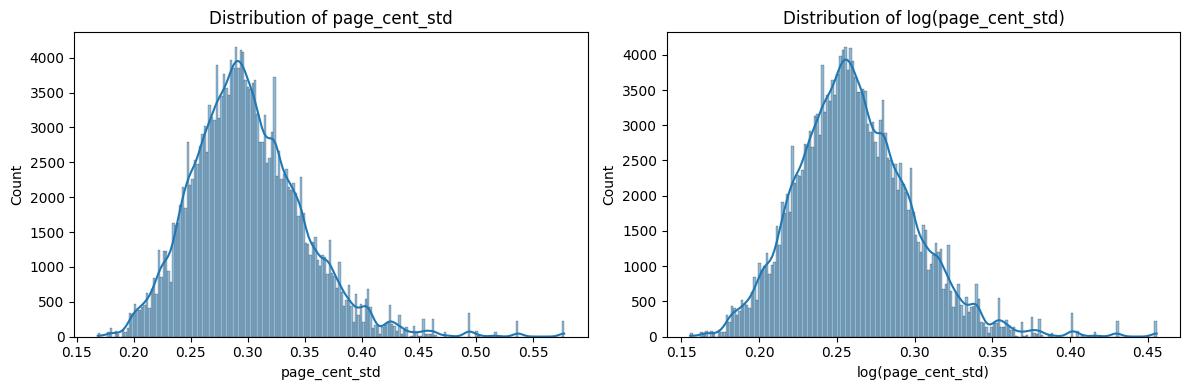


Feature: page_cent_std
Original skewness: 0.81
Log-transformed skewness: 0.63
Recommendation: Consider log transformation
--------------------------------------------------


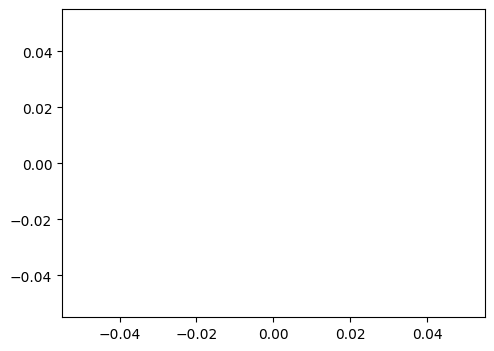

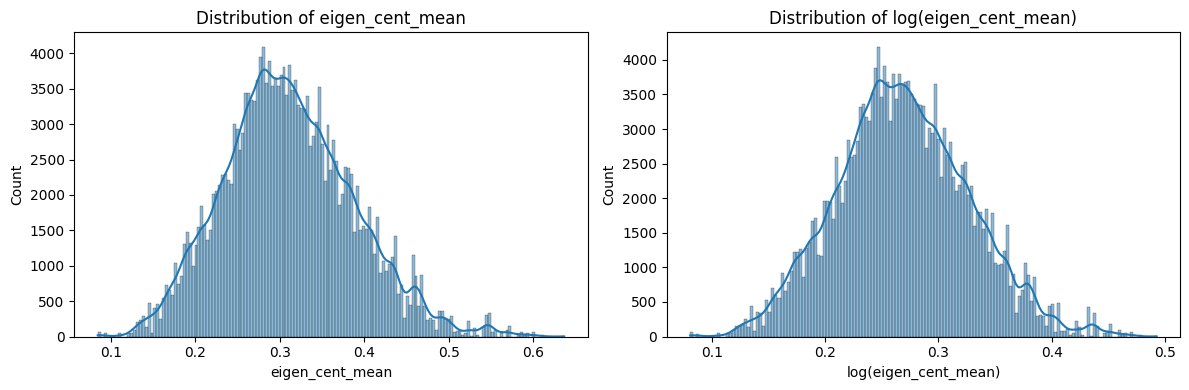


Feature: eigen_cent_mean
Original skewness: 0.36
Log-transformed skewness: 0.18
Recommendation: Consider log transformation
--------------------------------------------------


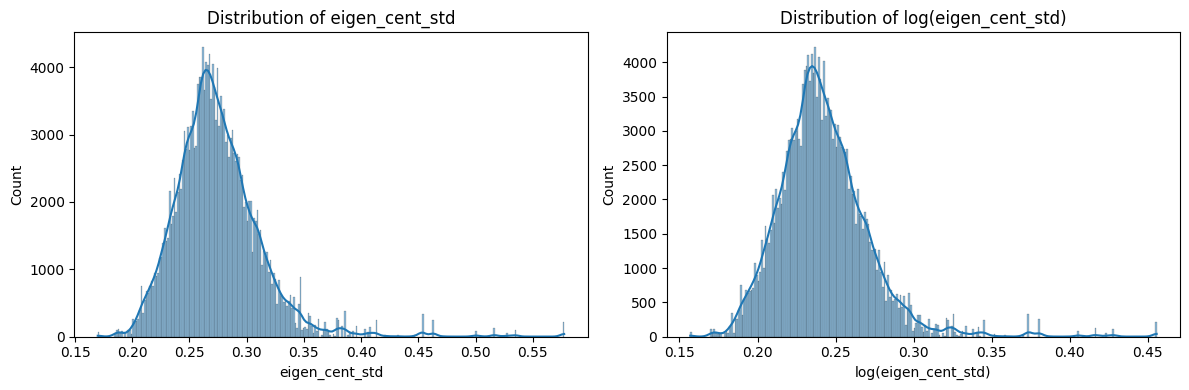


Feature: eigen_cent_std
Original skewness: 1.77
Log-transformed skewness: 1.46
Recommendation: Consider log transformation
--------------------------------------------------


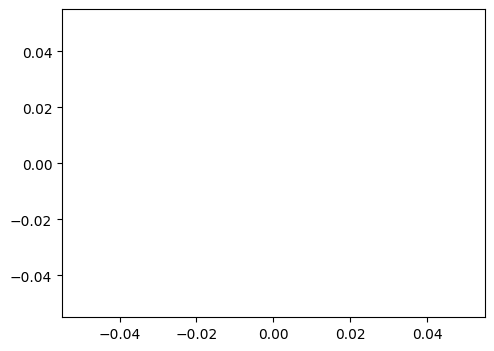

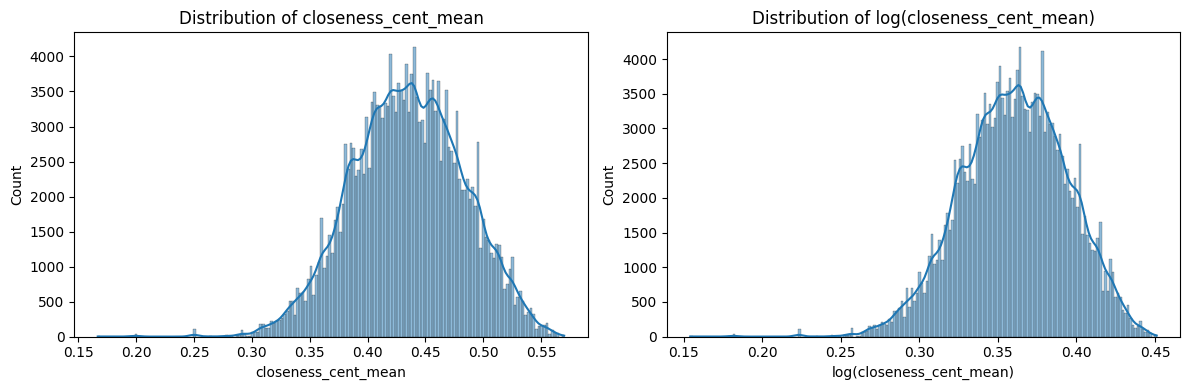


Feature: closeness_cent_mean
Original skewness: -0.11
Log-transformed skewness: -0.21
Recommendation: Keep original scale
--------------------------------------------------


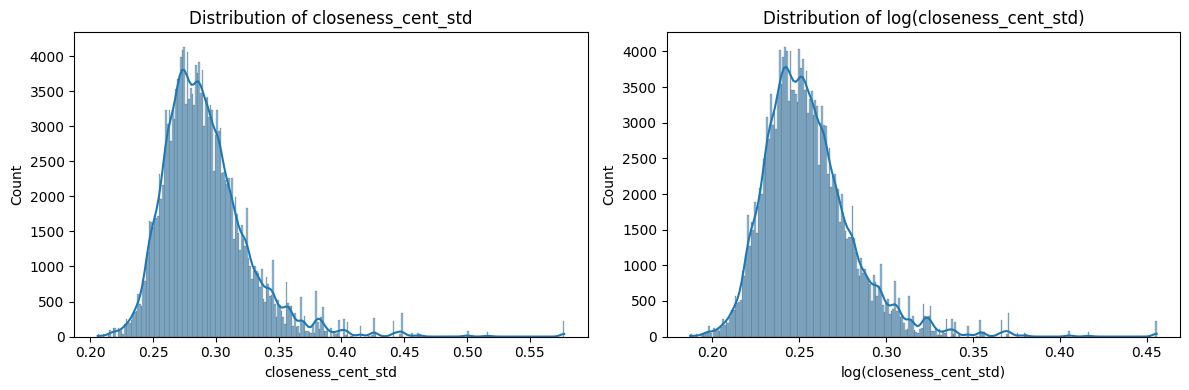


Feature: closeness_cent_std
Original skewness: 1.75
Log-transformed skewness: 1.52
Recommendation: Consider log transformation
--------------------------------------------------


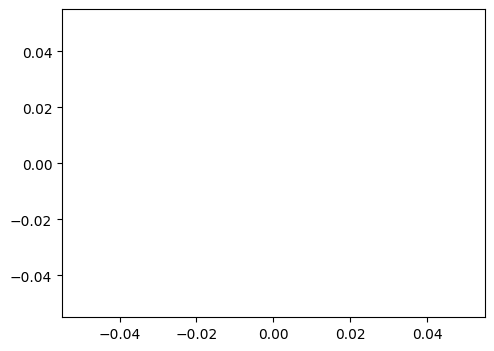

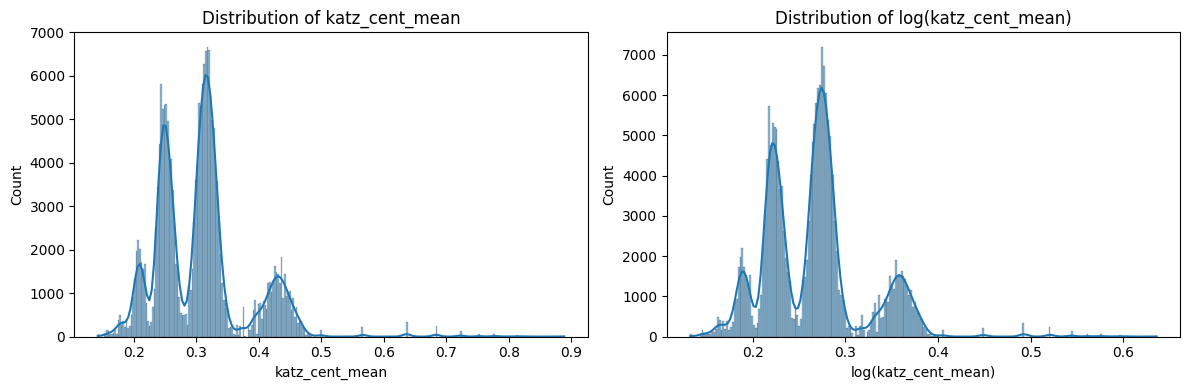


Feature: katz_cent_mean
Original skewness: 1.28
Log-transformed skewness: 0.97
Recommendation: Consider log transformation
--------------------------------------------------


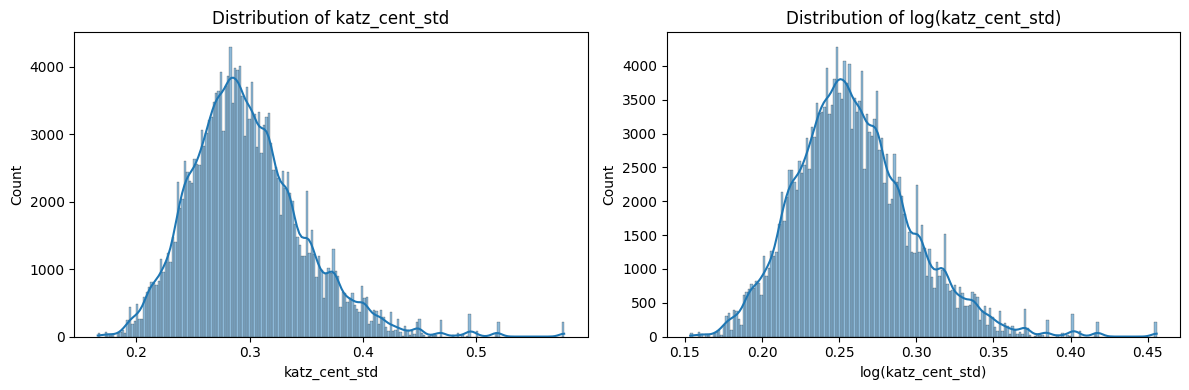


Feature: katz_cent_std
Original skewness: 0.84
Log-transformed skewness: 0.67
Recommendation: Consider log transformation
--------------------------------------------------


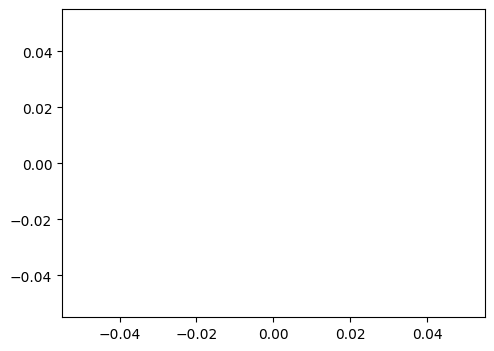

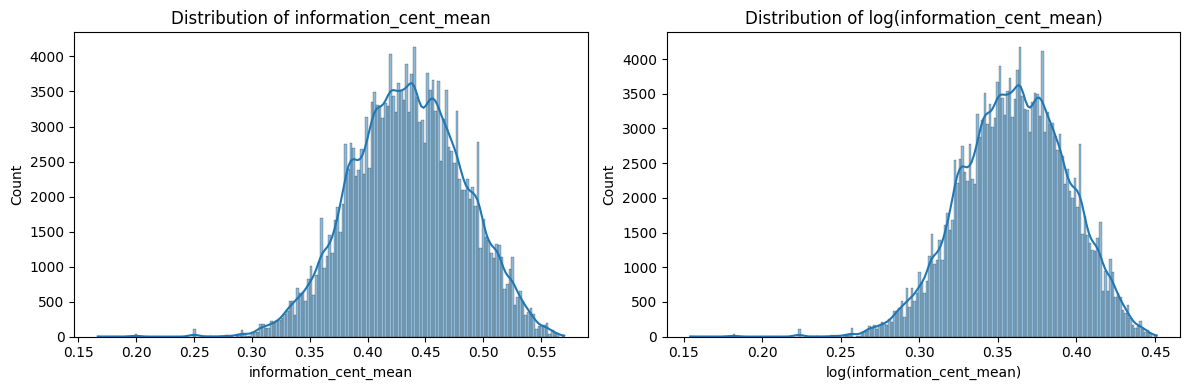


Feature: information_cent_mean
Original skewness: -0.11
Log-transformed skewness: -0.21
Recommendation: Keep original scale
--------------------------------------------------


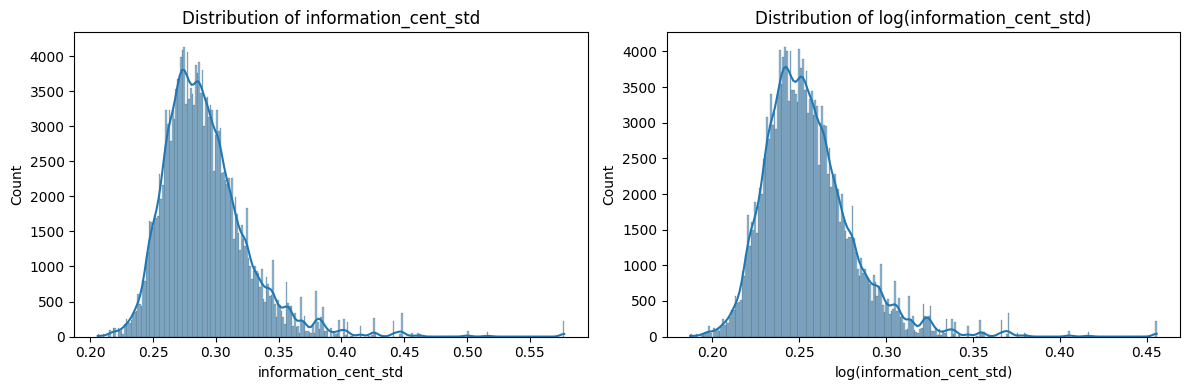


Feature: information_cent_std
Original skewness: 1.75
Log-transformed skewness: 1.52
Recommendation: Consider log transformation
--------------------------------------------------


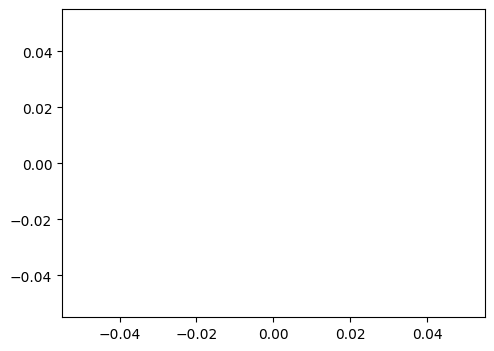

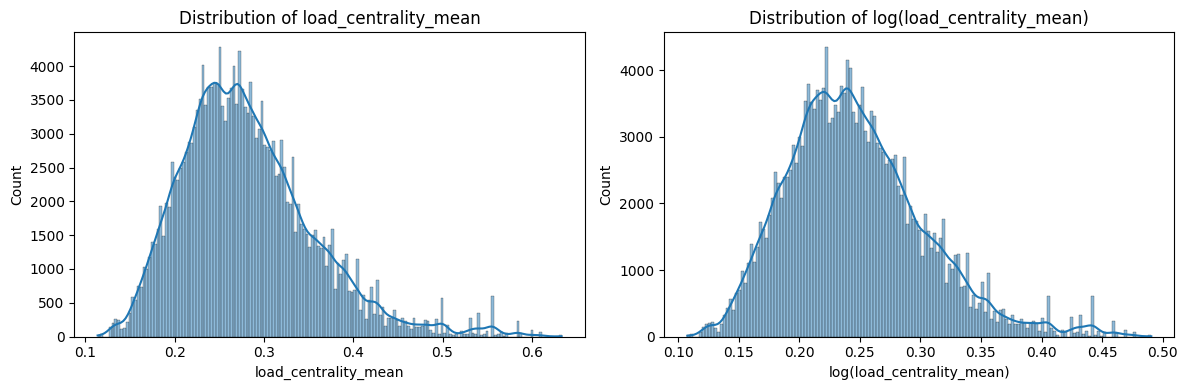


Feature: load_centrality_mean
Original skewness: 0.93
Log-transformed skewness: 0.72
Recommendation: Consider log transformation
--------------------------------------------------


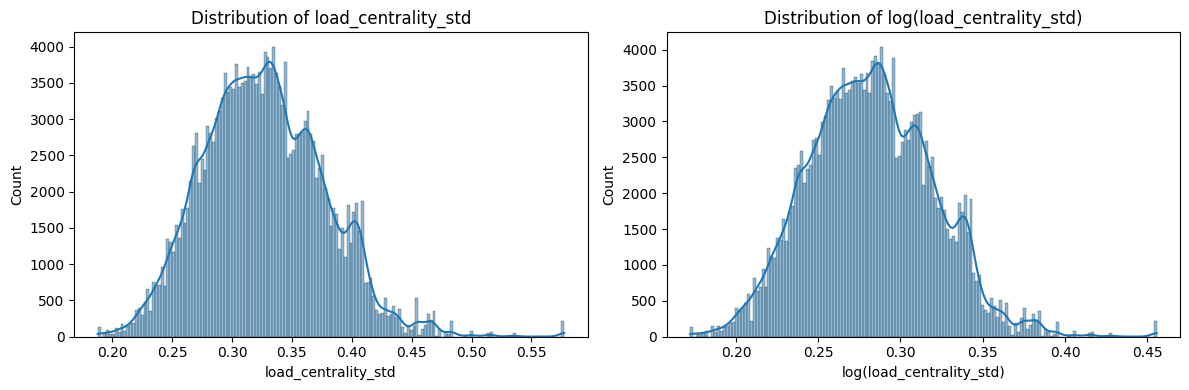


Feature: load_centrality_std
Original skewness: 0.38
Log-transformed skewness: 0.26
Recommendation: Consider log transformation
--------------------------------------------------


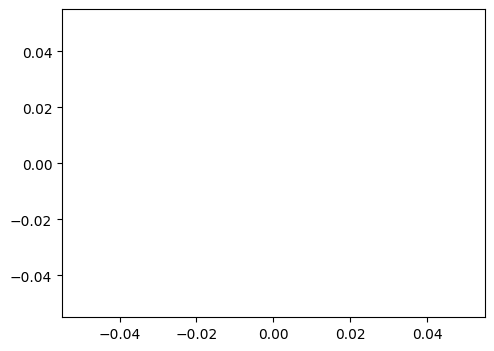

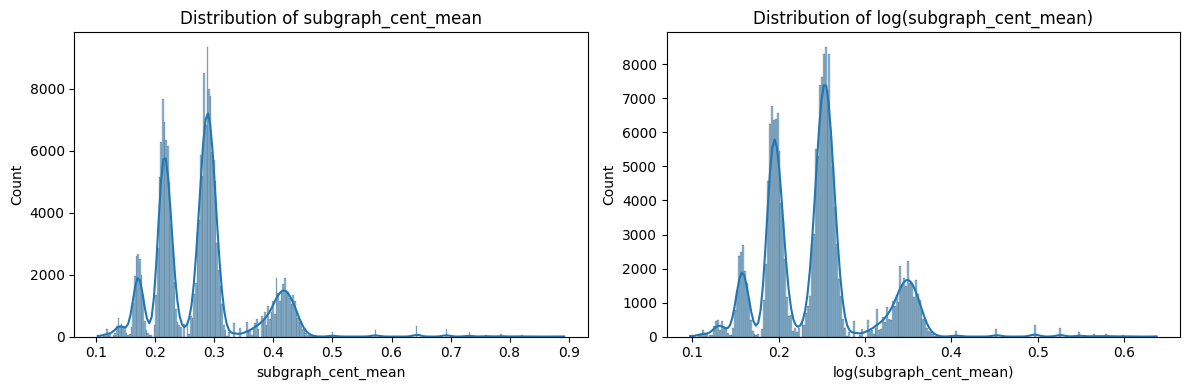


Feature: subgraph_cent_mean
Original skewness: 1.29
Log-transformed skewness: 0.96
Recommendation: Consider log transformation
--------------------------------------------------


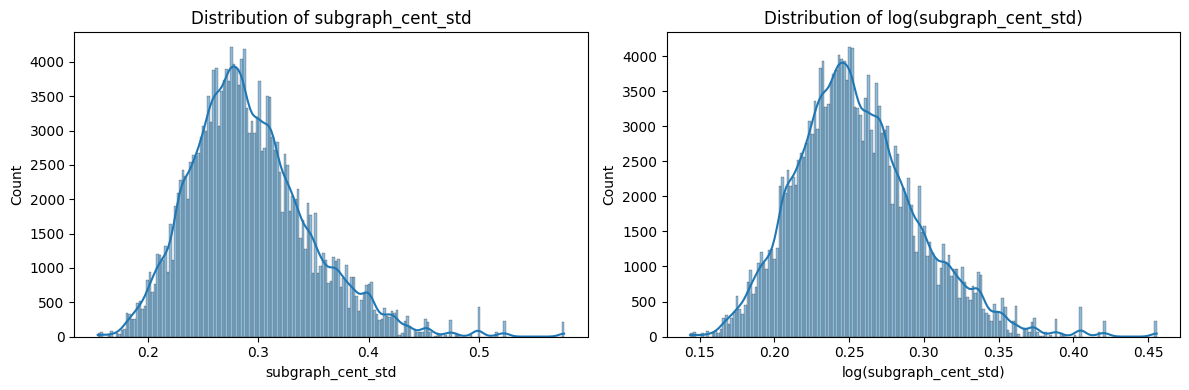


Feature: subgraph_cent_std
Original skewness: 0.80
Log-transformed skewness: 0.64
Recommendation: Consider log transformation
--------------------------------------------------


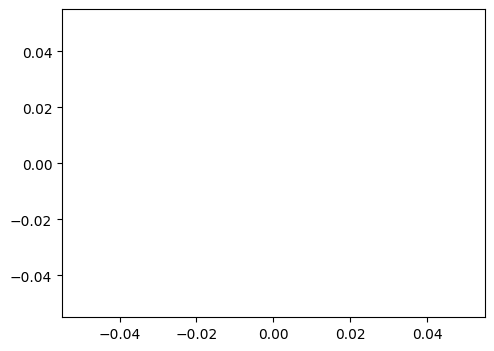

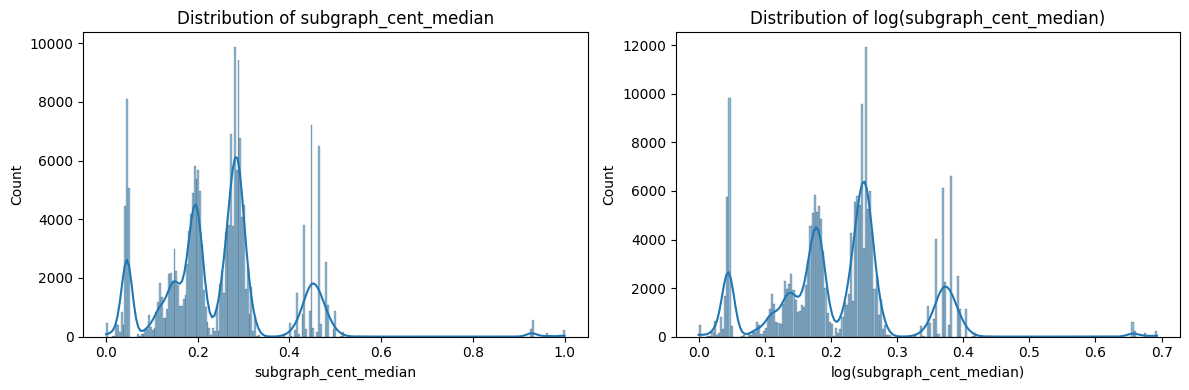


Feature: subgraph_cent_median
Original skewness: 1.09
Log-transformed skewness: 0.50
Recommendation: Consider log transformation
--------------------------------------------------


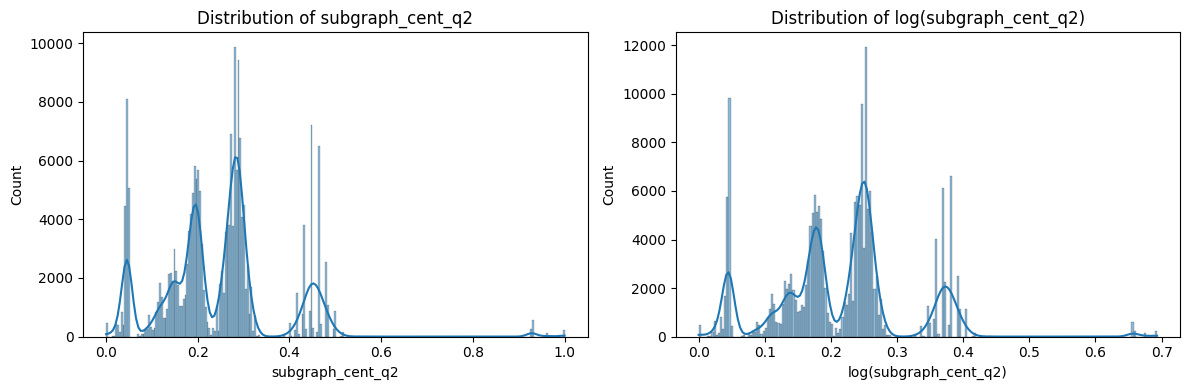


Feature: subgraph_cent_q2
Original skewness: 1.09
Log-transformed skewness: 0.50
Recommendation: Consider log transformation
--------------------------------------------------


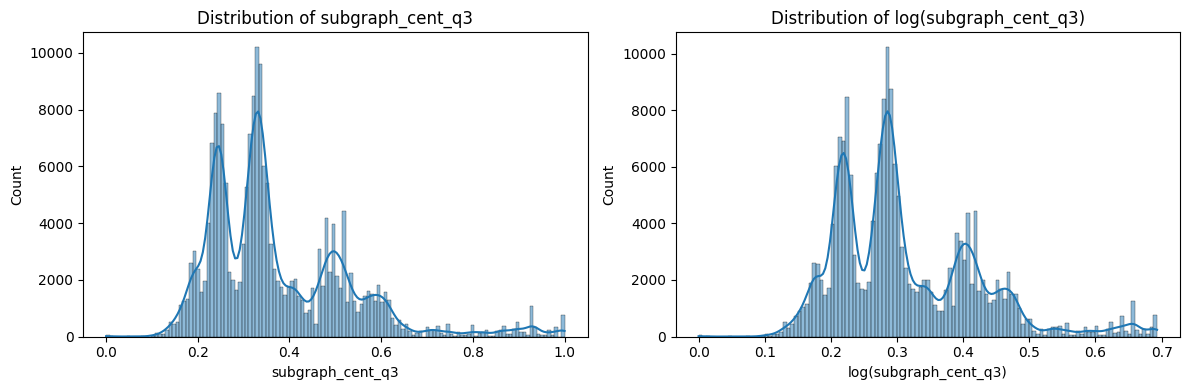


Feature: subgraph_cent_q3
Original skewness: 1.41
Log-transformed skewness: 1.05
Recommendation: Consider log transformation
--------------------------------------------------


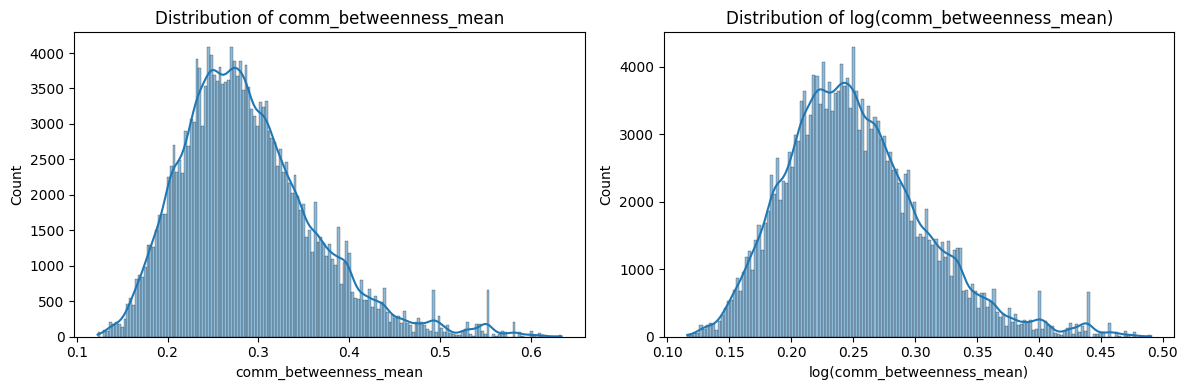


Feature: comm_betweenness_mean
Original skewness: 0.90
Log-transformed skewness: 0.70
Recommendation: Consider log transformation
--------------------------------------------------


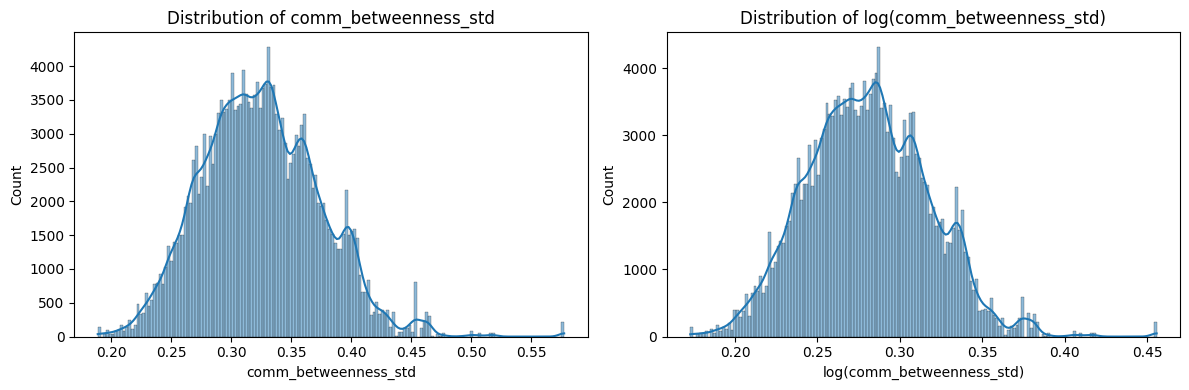


Feature: comm_betweenness_std
Original skewness: 0.39
Log-transformed skewness: 0.26
Recommendation: Consider log transformation
--------------------------------------------------


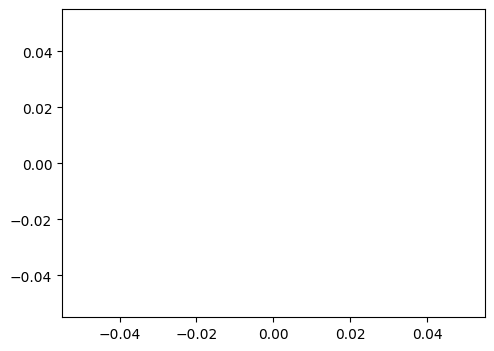

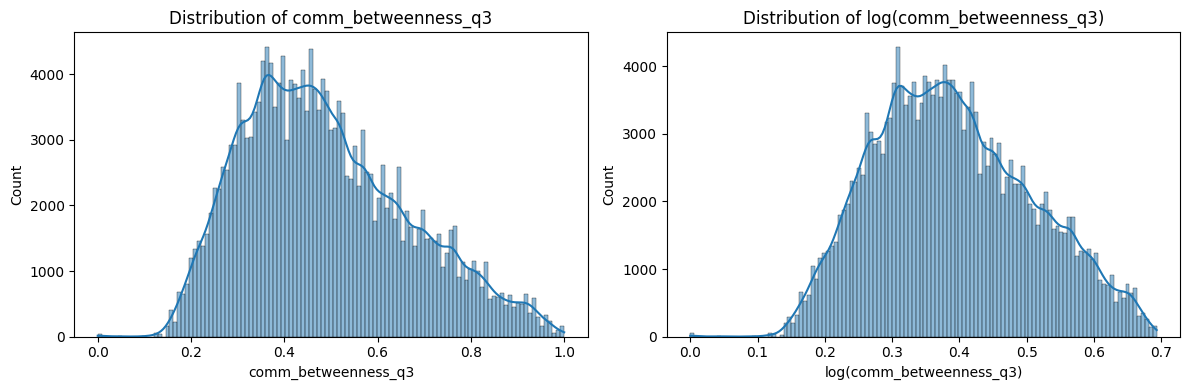


Feature: comm_betweenness_q3
Original skewness: 0.53
Log-transformed skewness: 0.28
Recommendation: Consider log transformation
--------------------------------------------------


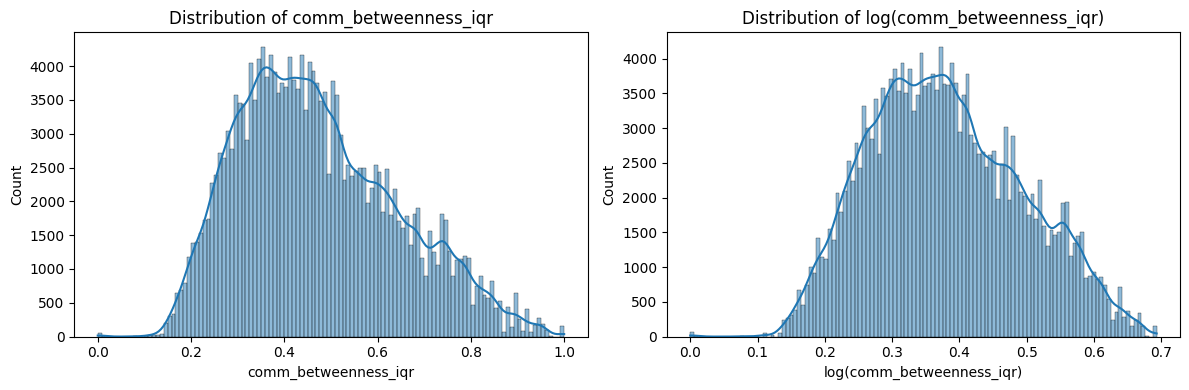


Feature: comm_betweenness_iqr
Original skewness: 0.51
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


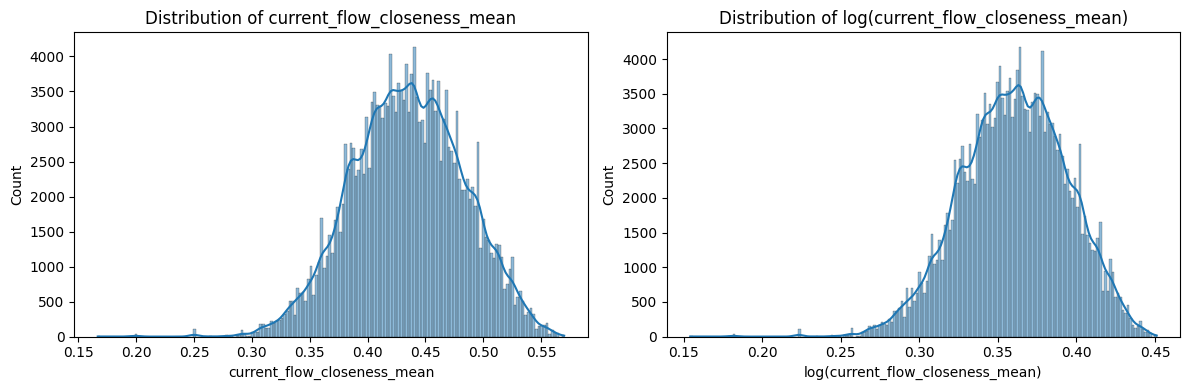


Feature: current_flow_closeness_mean
Original skewness: -0.11
Log-transformed skewness: -0.21
Recommendation: Keep original scale
--------------------------------------------------


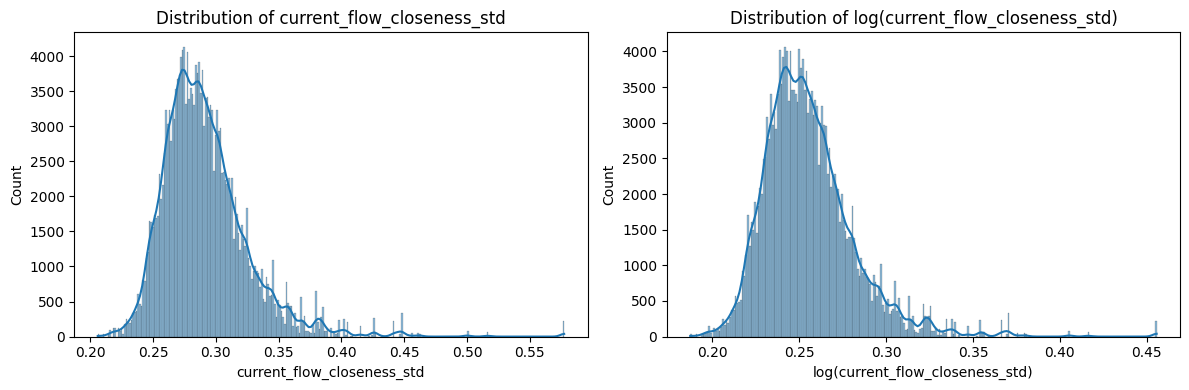


Feature: current_flow_closeness_std
Original skewness: 1.75
Log-transformed skewness: 1.52
Recommendation: Consider log transformation
--------------------------------------------------


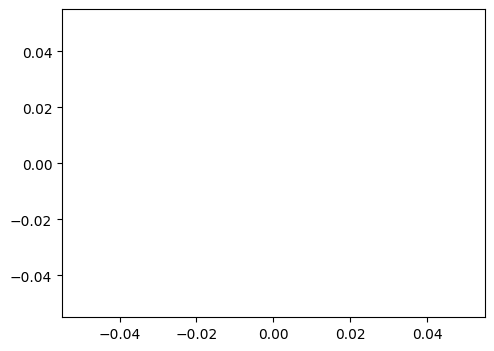

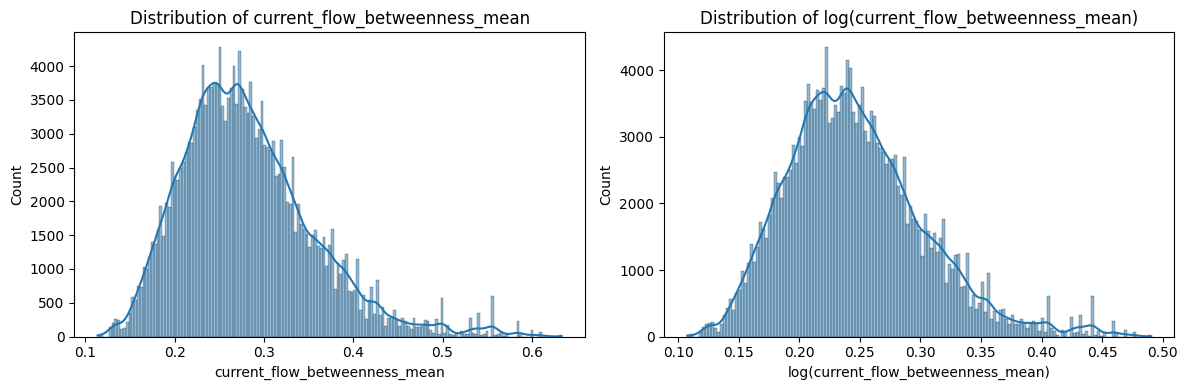


Feature: current_flow_betweenness_mean
Original skewness: 0.93
Log-transformed skewness: 0.72
Recommendation: Consider log transformation
--------------------------------------------------


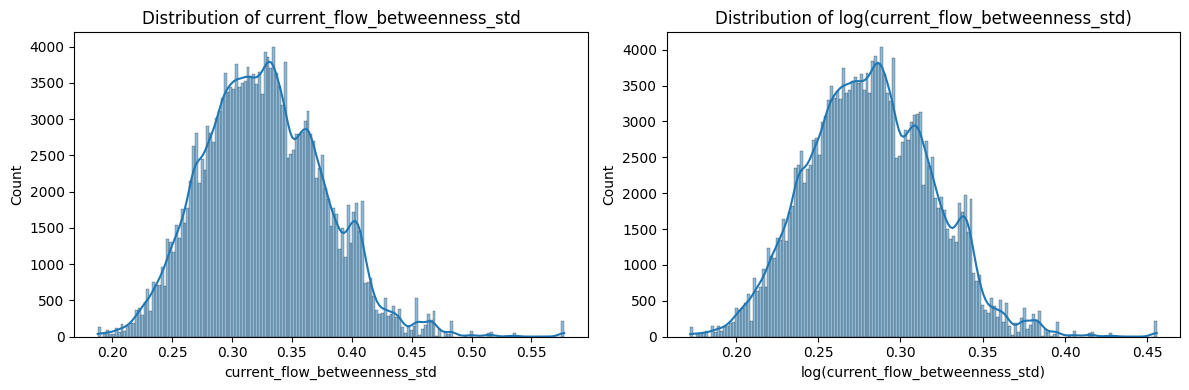


Feature: current_flow_betweenness_std
Original skewness: 0.38
Log-transformed skewness: 0.26
Recommendation: Consider log transformation
--------------------------------------------------


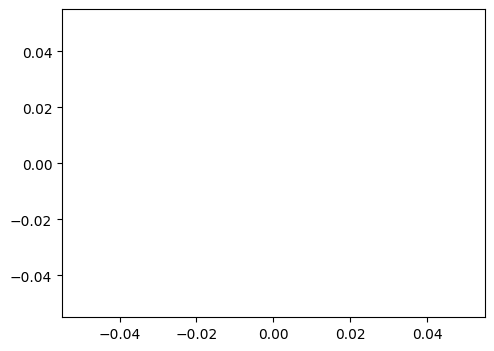

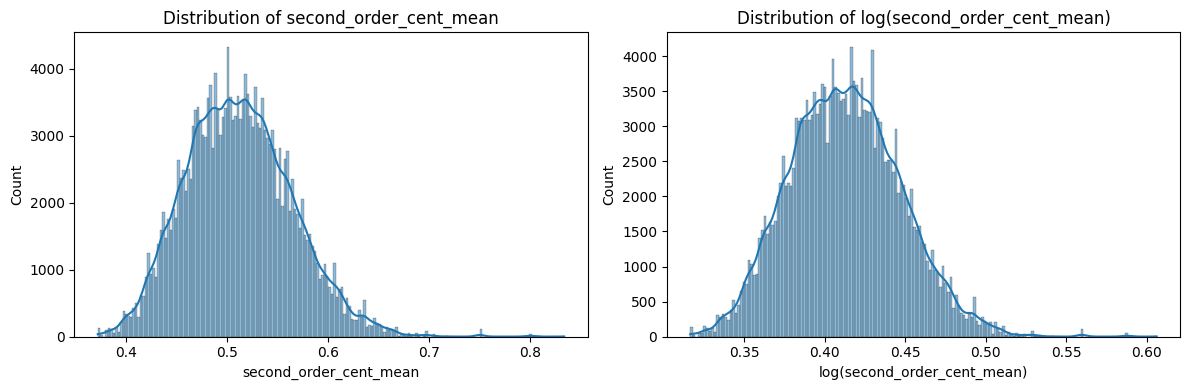


Feature: second_order_cent_mean
Original skewness: 0.35
Log-transformed skewness: 0.24
Recommendation: Consider log transformation
--------------------------------------------------


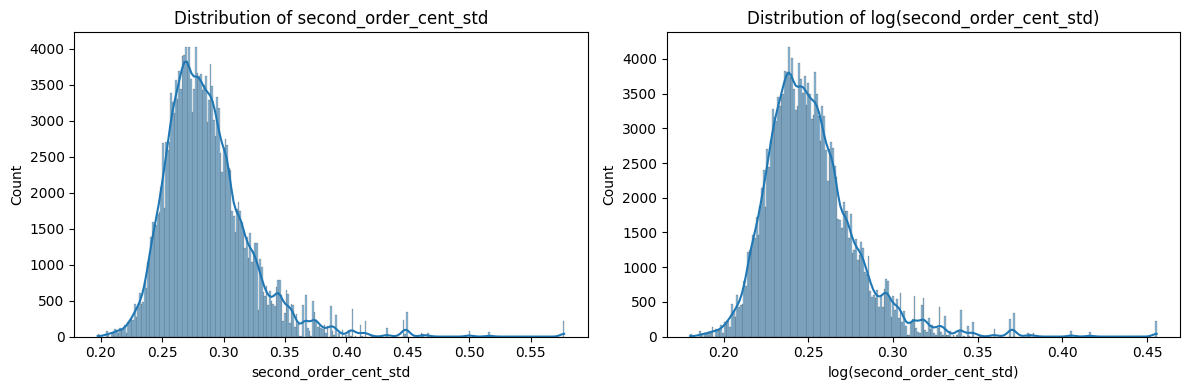


Feature: second_order_cent_std
Original skewness: 1.77
Log-transformed skewness: 1.52
Recommendation: Consider log transformation
--------------------------------------------------


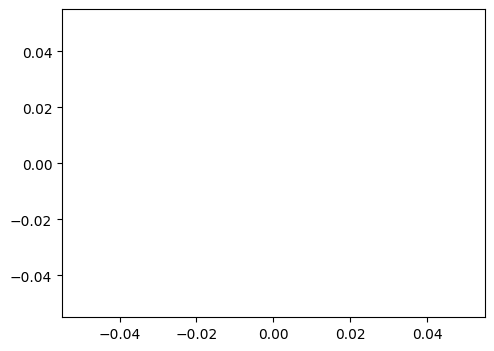

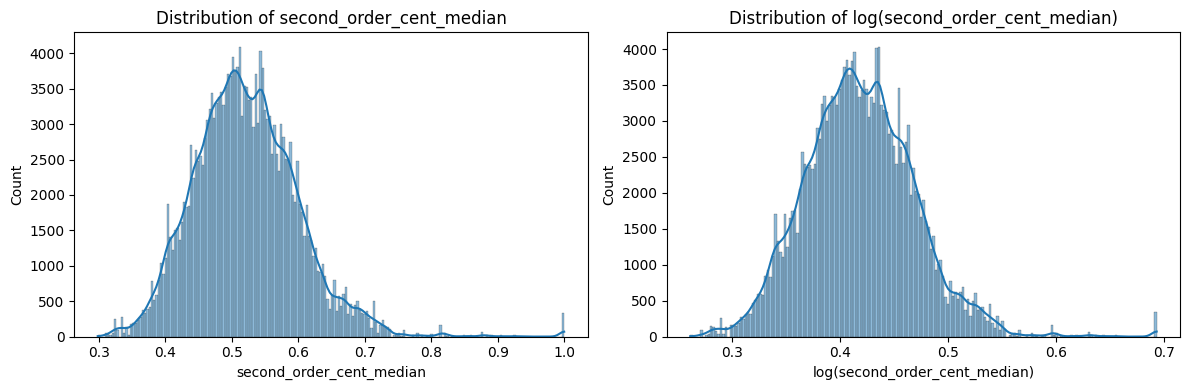


Feature: second_order_cent_median
Original skewness: 0.72
Log-transformed skewness: 0.45
Recommendation: Consider log transformation
--------------------------------------------------


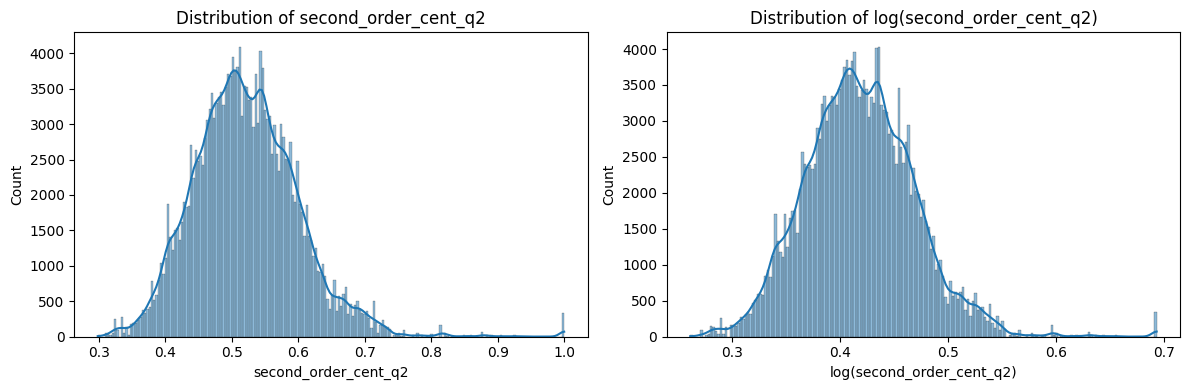


Feature: second_order_cent_q2
Original skewness: 0.72
Log-transformed skewness: 0.45
Recommendation: Consider log transformation
--------------------------------------------------


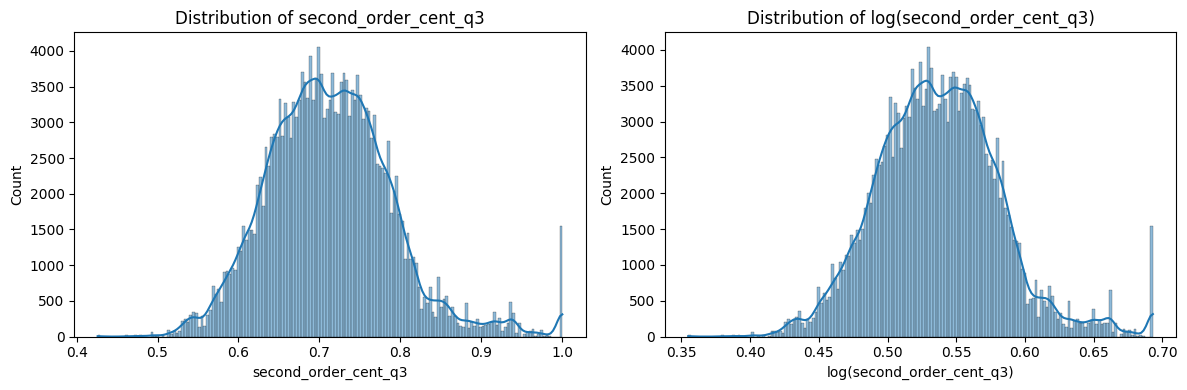


Feature: second_order_cent_q3
Original skewness: 0.58
Log-transformed skewness: 0.40
Recommendation: Consider log transformation
--------------------------------------------------


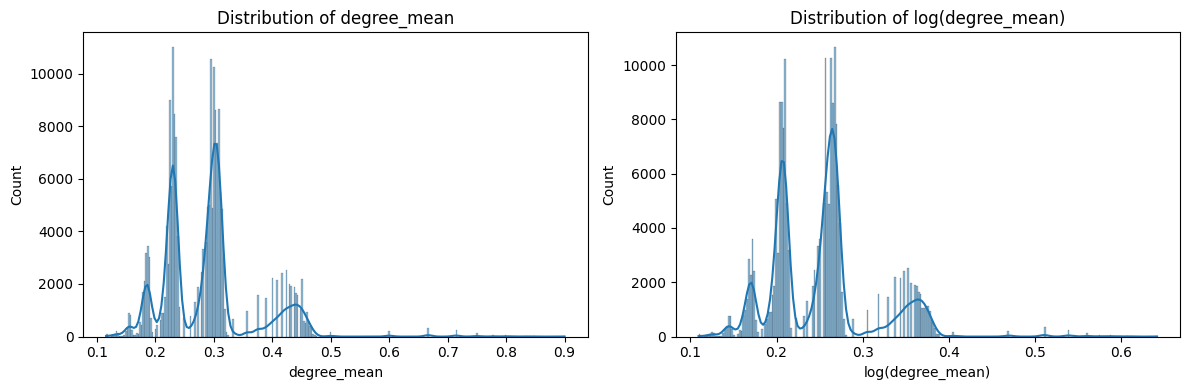


Feature: degree_mean
Original skewness: 1.37
Log-transformed skewness: 1.05
Recommendation: Consider log transformation
--------------------------------------------------


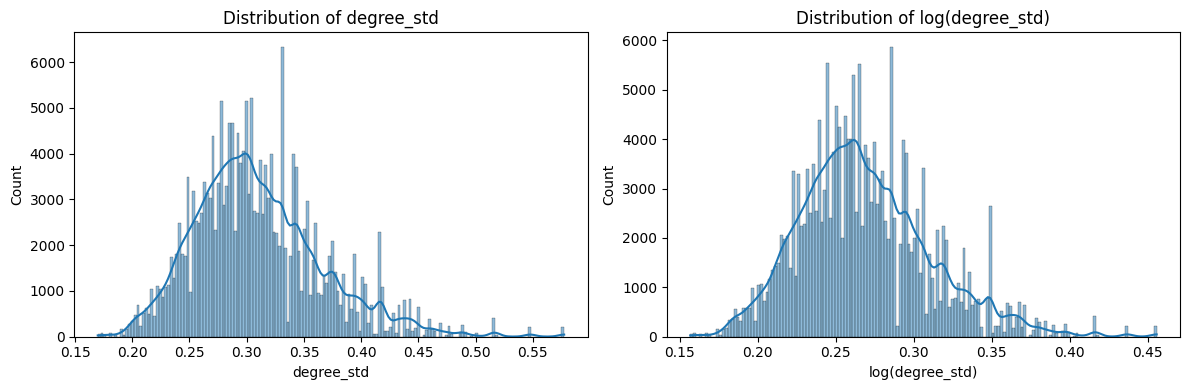


Feature: degree_std
Original skewness: 0.78
Log-transformed skewness: 0.63
Recommendation: Consider log transformation
--------------------------------------------------


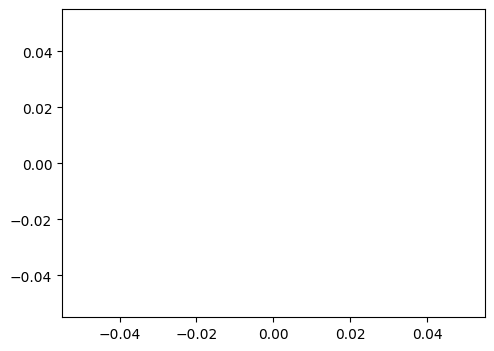

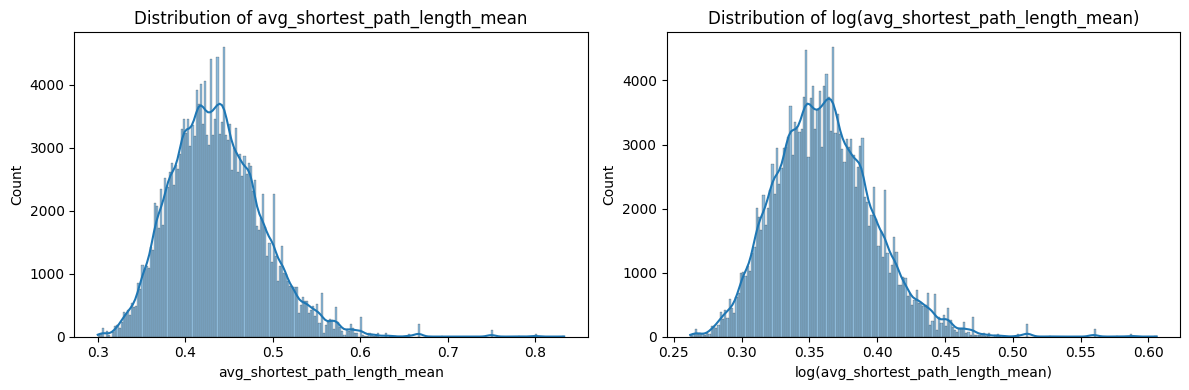


Feature: avg_shortest_path_length_mean
Original skewness: 0.69
Log-transformed skewness: 0.53
Recommendation: Consider log transformation
--------------------------------------------------


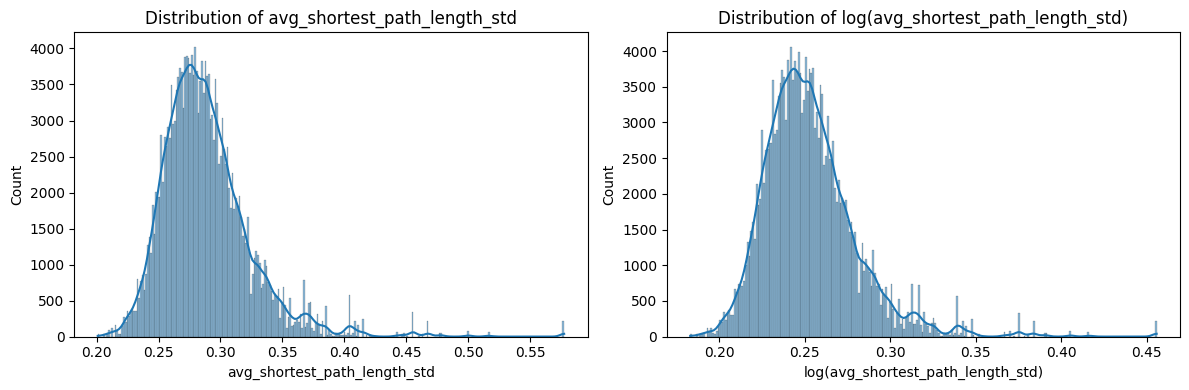


Feature: avg_shortest_path_length_std
Original skewness: 1.73
Log-transformed skewness: 1.49
Recommendation: Consider log transformation
--------------------------------------------------


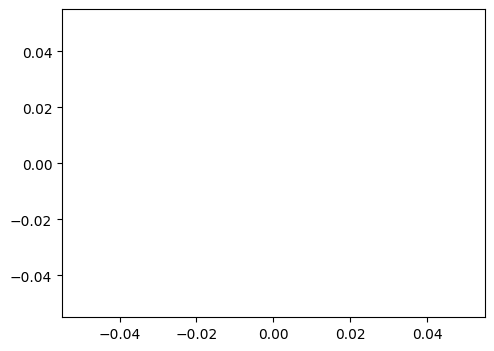

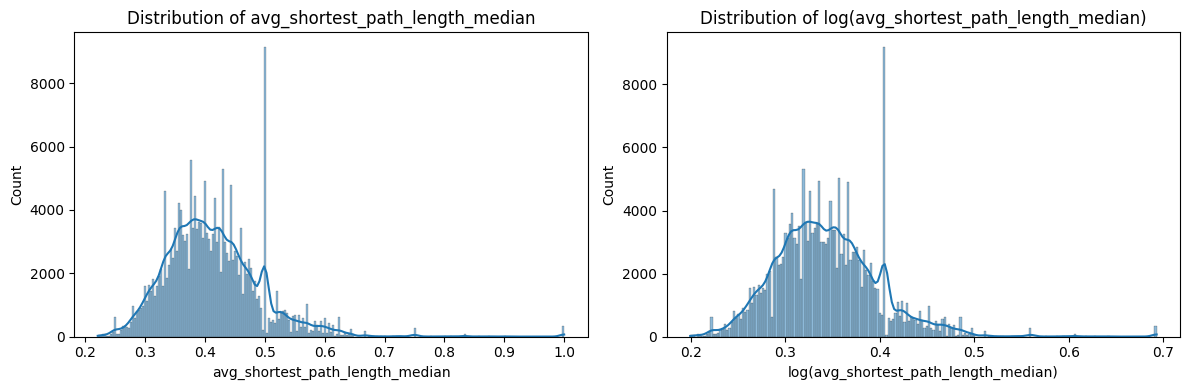


Feature: avg_shortest_path_length_median
Original skewness: 1.30
Log-transformed skewness: 0.89
Recommendation: Consider log transformation
--------------------------------------------------


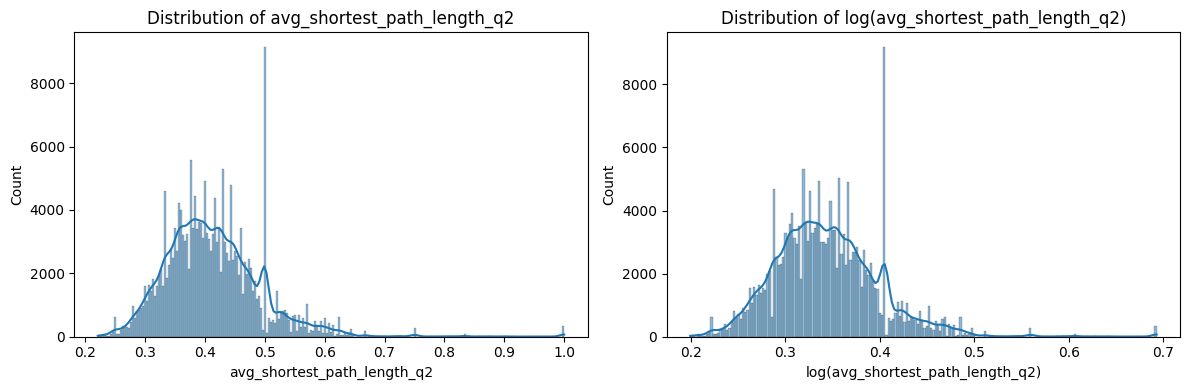


Feature: avg_shortest_path_length_q2
Original skewness: 1.30
Log-transformed skewness: 0.89
Recommendation: Consider log transformation
--------------------------------------------------


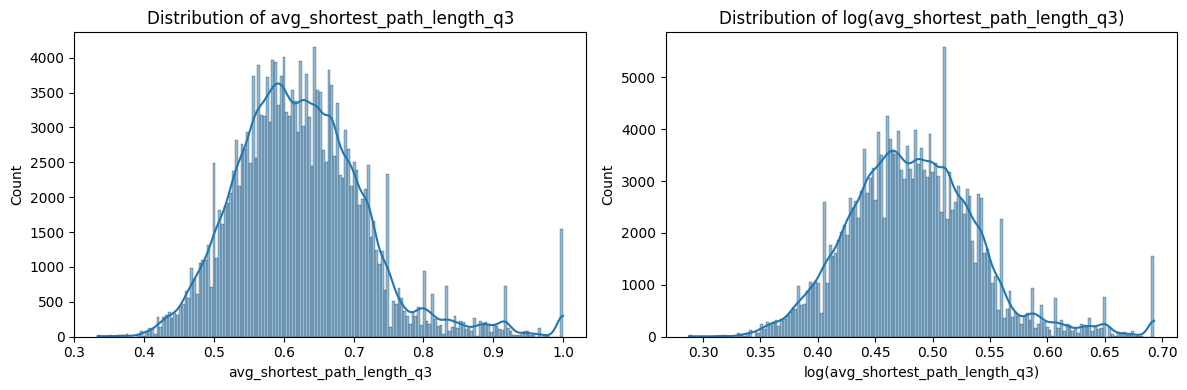


Feature: avg_shortest_path_length_q3
Original skewness: 0.84
Log-transformed skewness: 0.59
Recommendation: Consider log transformation
--------------------------------------------------


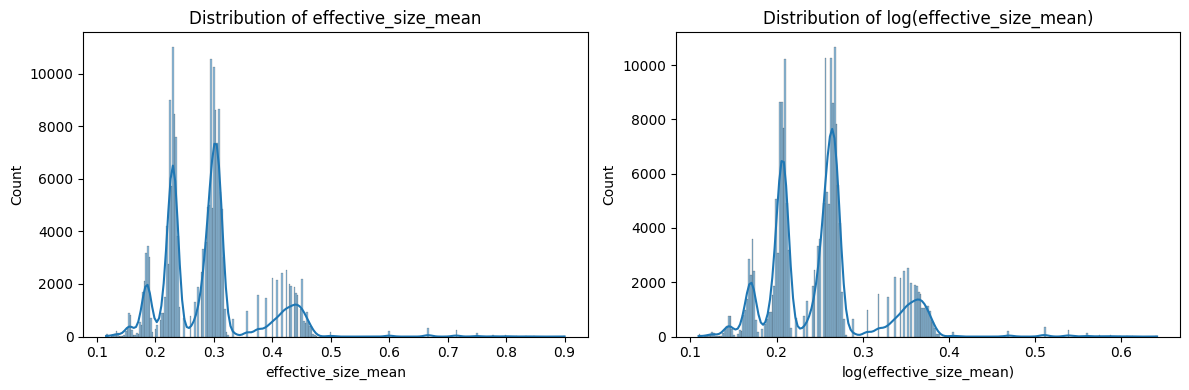


Feature: effective_size_mean
Original skewness: 1.37
Log-transformed skewness: 1.05
Recommendation: Consider log transformation
--------------------------------------------------


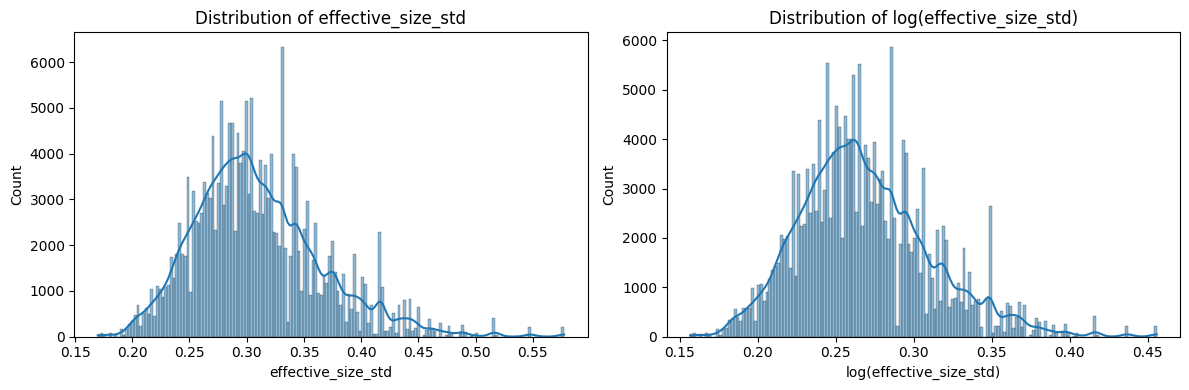


Feature: effective_size_std
Original skewness: 0.78
Log-transformed skewness: 0.63
Recommendation: Consider log transformation
--------------------------------------------------


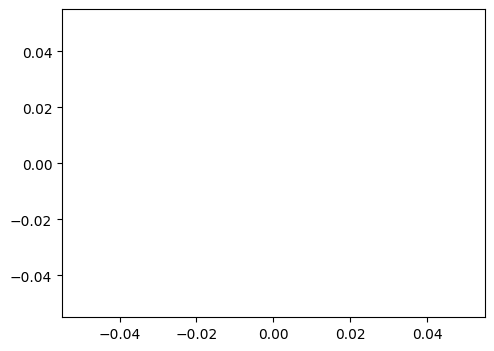

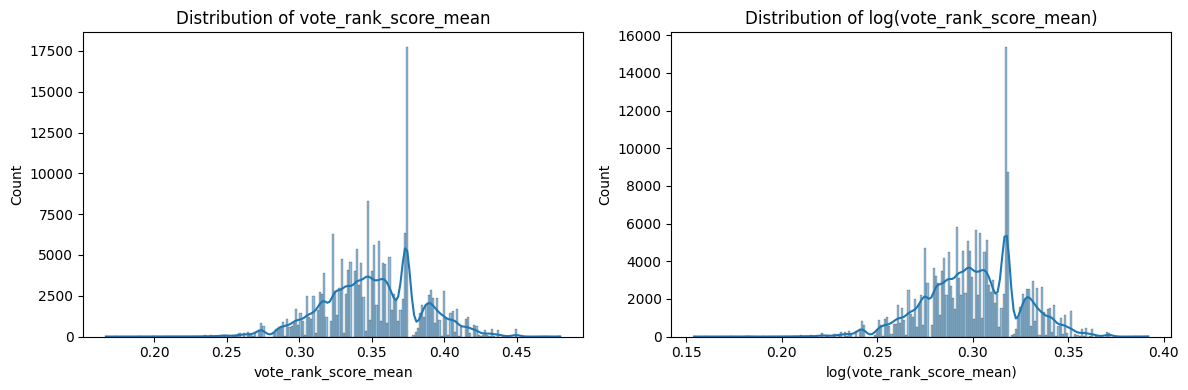


Feature: vote_rank_score_mean
Original skewness: -0.11
Log-transformed skewness: -0.19
Recommendation: Keep original scale
--------------------------------------------------


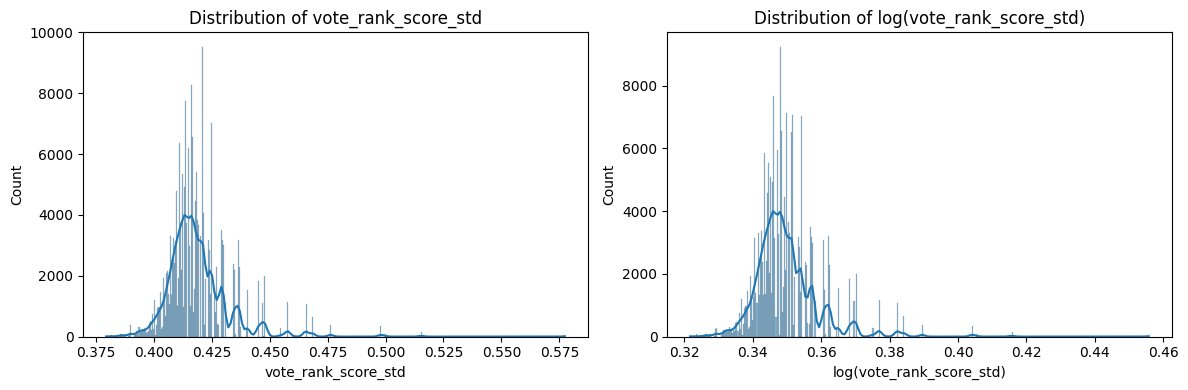


Feature: vote_rank_score_std
Original skewness: 2.25
Log-transformed skewness: 2.11
Recommendation: Consider log transformation
--------------------------------------------------


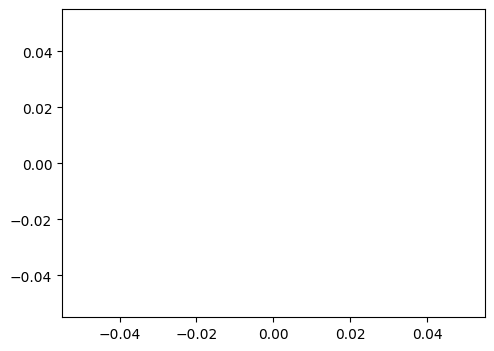

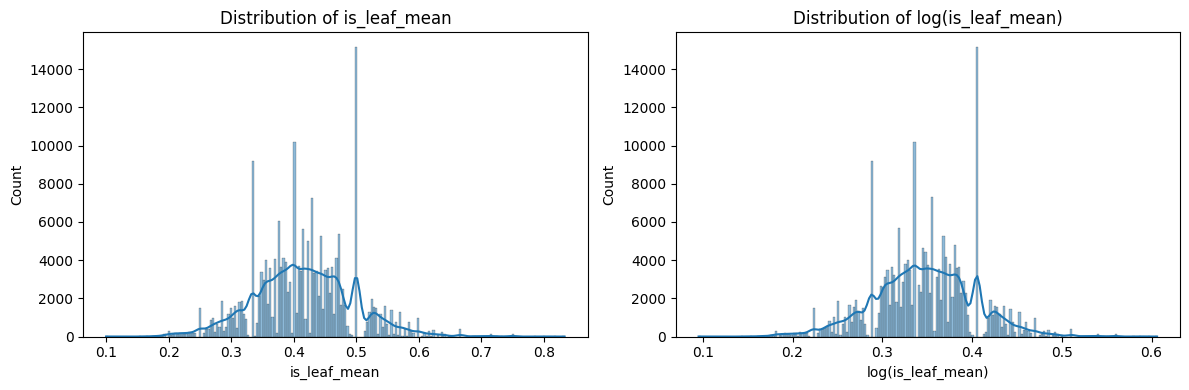


Feature: is_leaf_mean
Original skewness: 0.20
Log-transformed skewness: -0.01
Recommendation: Consider log transformation
--------------------------------------------------


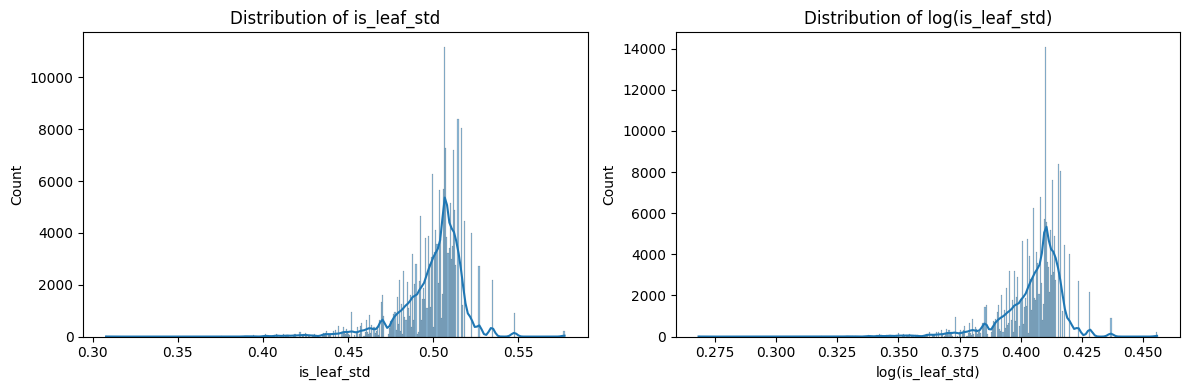


Feature: is_leaf_std
Original skewness: -1.59
Log-transformed skewness: -1.69
Recommendation: Keep original scale
--------------------------------------------------


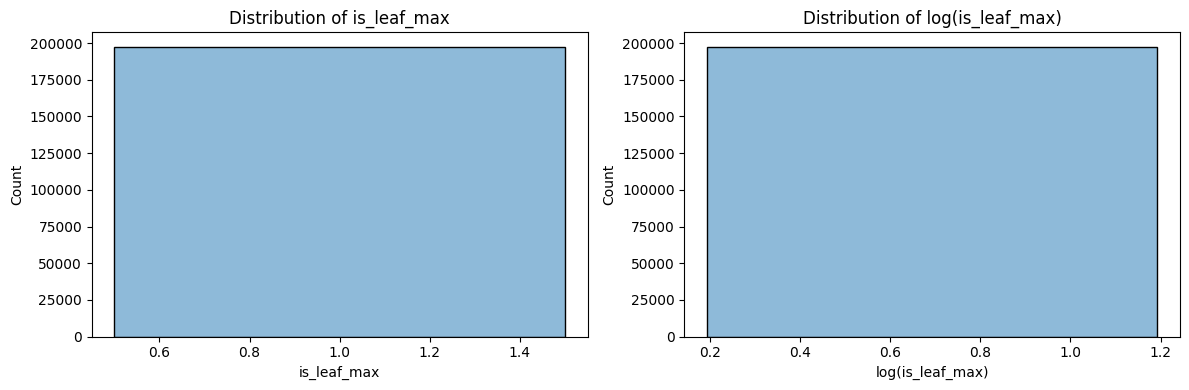


Feature: is_leaf_max
Original skewness: 0.00
Log-transformed skewness: 0.00
Recommendation: Keep original scale
--------------------------------------------------


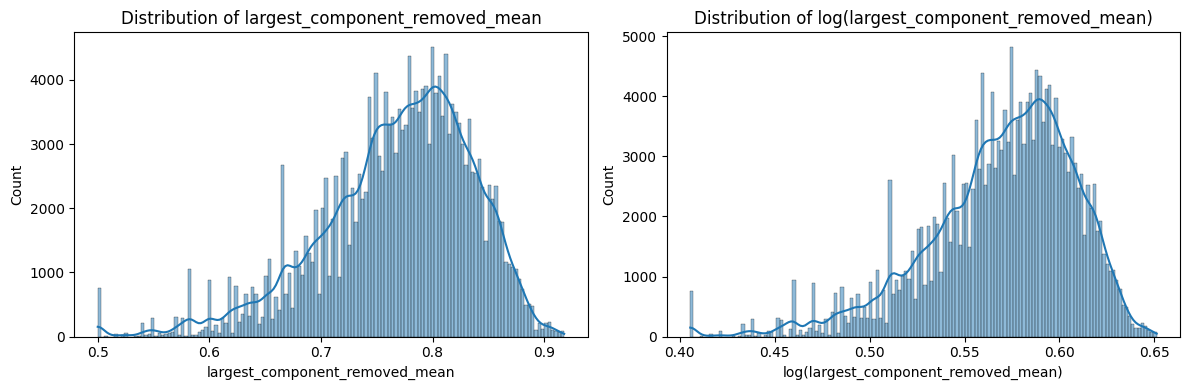


Feature: largest_component_removed_mean
Original skewness: -0.81
Log-transformed skewness: -0.95
Recommendation: Keep original scale
--------------------------------------------------


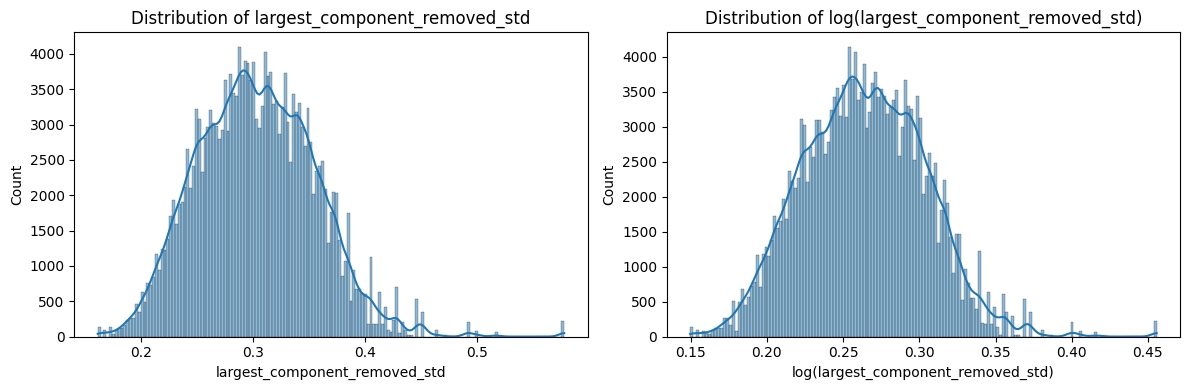


Feature: largest_component_removed_std
Original skewness: 0.34
Log-transformed skewness: 0.20
Recommendation: Consider log transformation
--------------------------------------------------


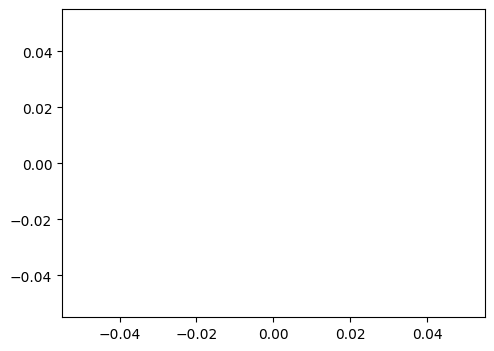

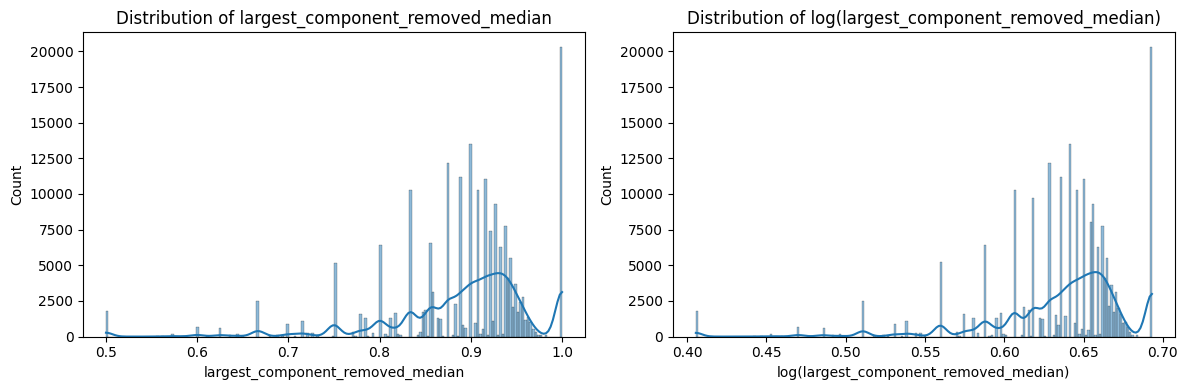


Feature: largest_component_removed_median
Original skewness: -1.75
Log-transformed skewness: -2.03
Recommendation: Keep original scale
--------------------------------------------------


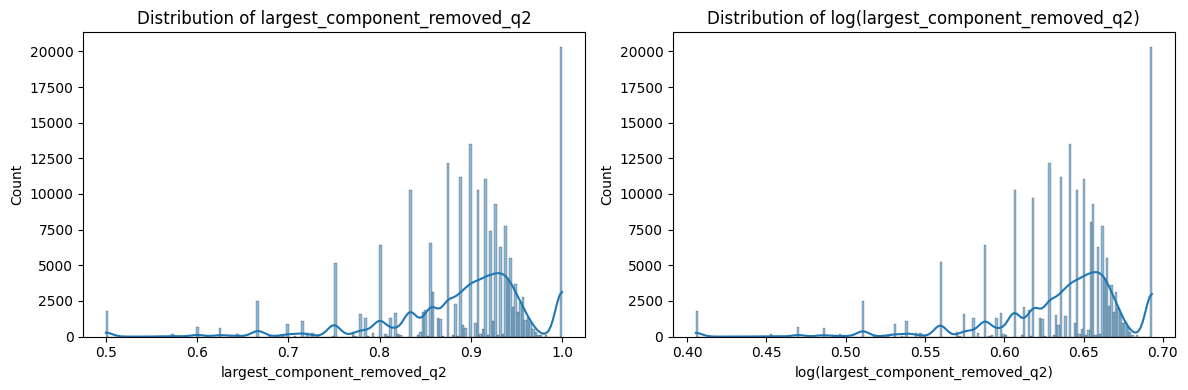


Feature: largest_component_removed_q2
Original skewness: -1.75
Log-transformed skewness: -2.03
Recommendation: Keep original scale
--------------------------------------------------


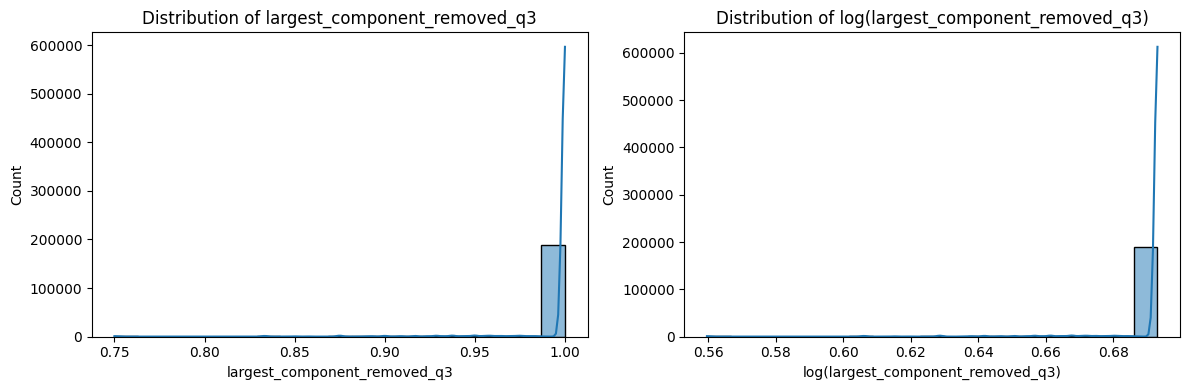


Feature: largest_component_removed_q3
Original skewness: -7.50
Log-transformed skewness: -7.72
Recommendation: Keep original scale
--------------------------------------------------


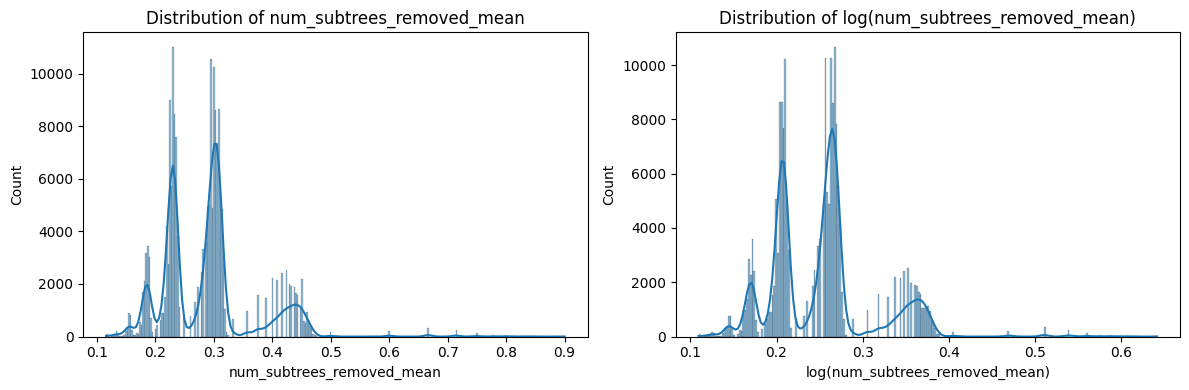


Feature: num_subtrees_removed_mean
Original skewness: 1.37
Log-transformed skewness: 1.05
Recommendation: Consider log transformation
--------------------------------------------------


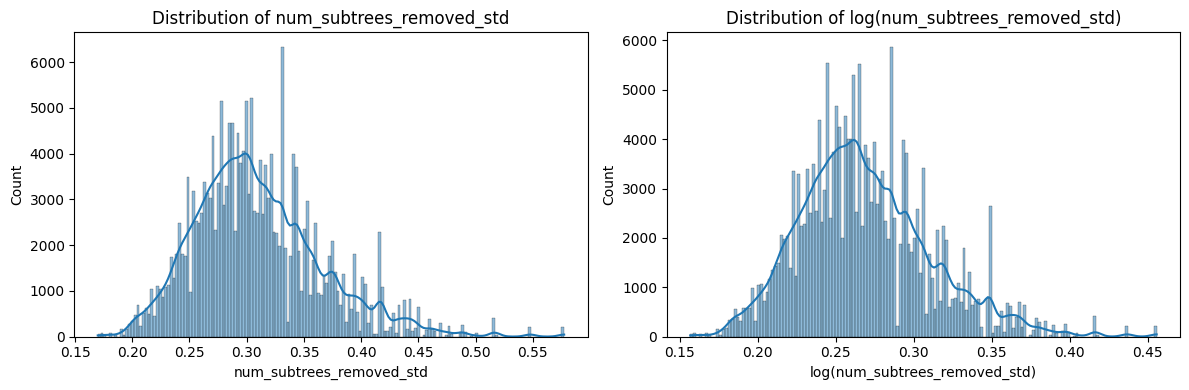


Feature: num_subtrees_removed_std
Original skewness: 0.78
Log-transformed skewness: 0.63
Recommendation: Consider log transformation
--------------------------------------------------


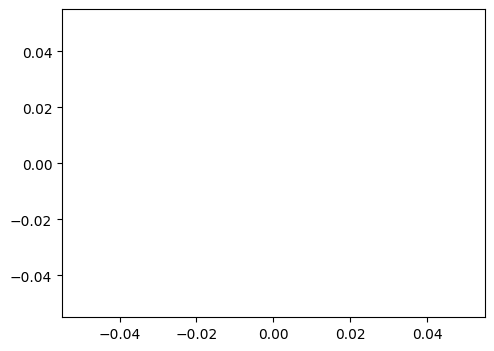

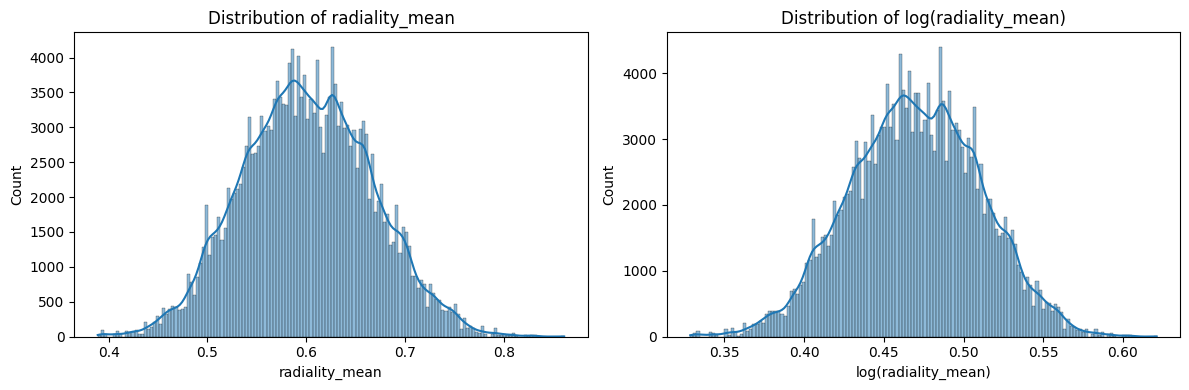


Feature: radiality_mean
Original skewness: 0.06
Log-transformed skewness: -0.05
Recommendation: Consider log transformation
--------------------------------------------------


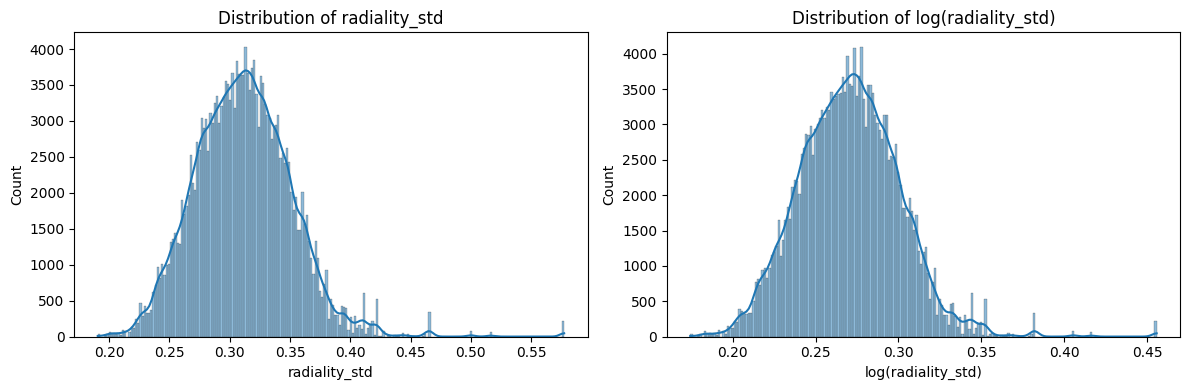


Feature: radiality_std
Original skewness: 0.61
Log-transformed skewness: 0.44
Recommendation: Consider log transformation
--------------------------------------------------


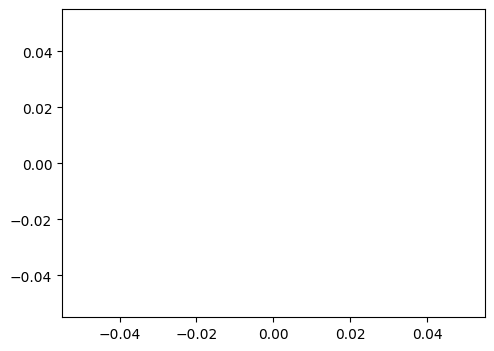

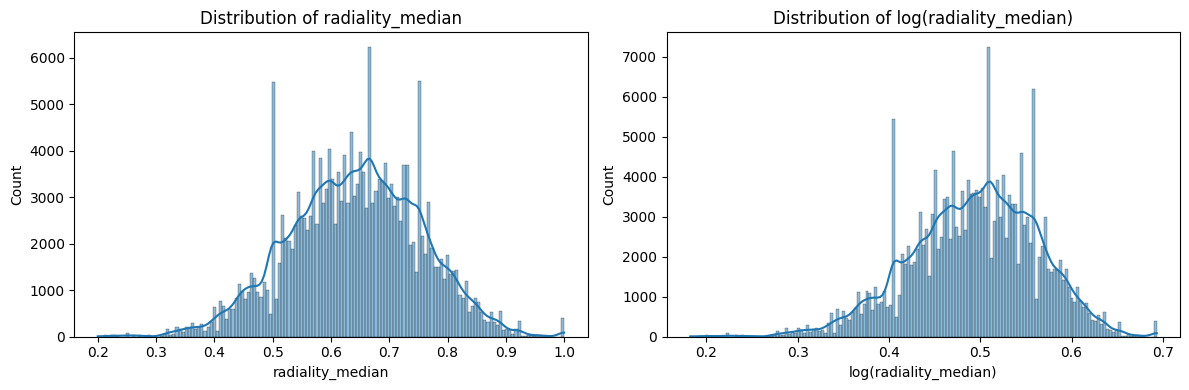


Feature: radiality_median
Original skewness: -0.10
Log-transformed skewness: -0.31
Recommendation: Keep original scale
--------------------------------------------------


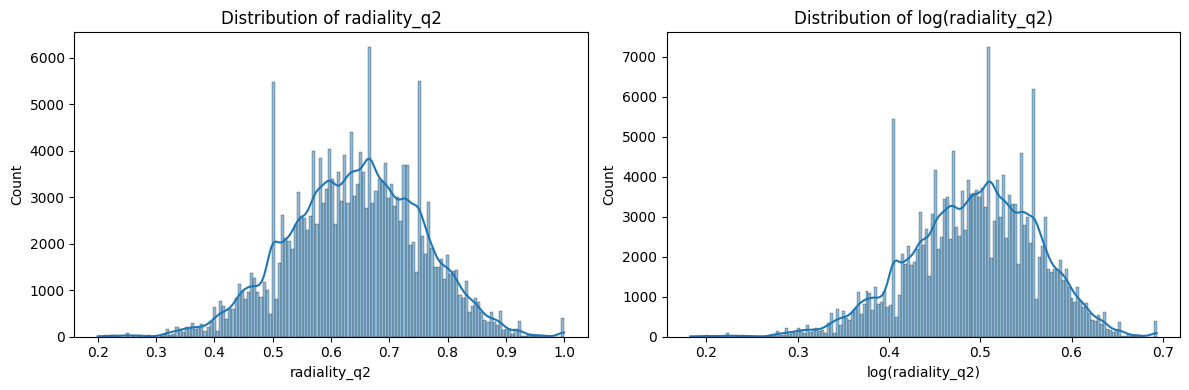


Feature: radiality_q2
Original skewness: -0.10
Log-transformed skewness: -0.31
Recommendation: Keep original scale
--------------------------------------------------


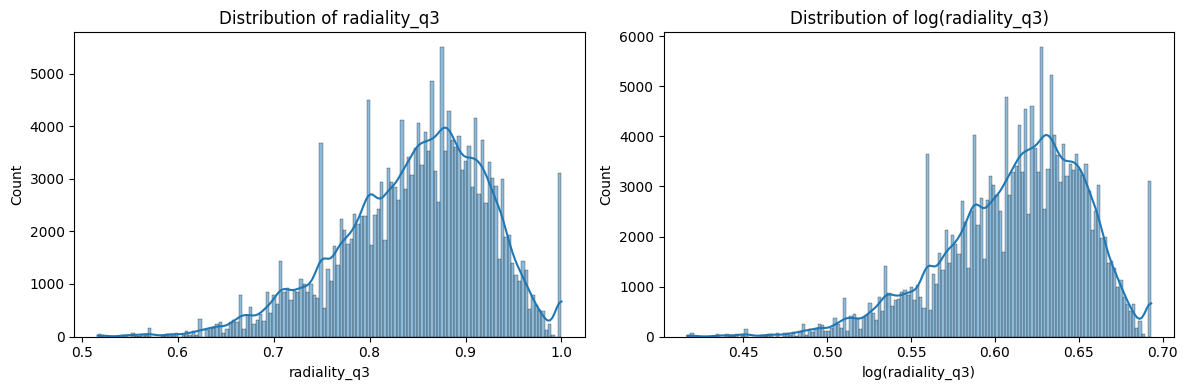


Feature: radiality_q3
Original skewness: -0.59
Log-transformed skewness: -0.72
Recommendation: Keep original scale
--------------------------------------------------


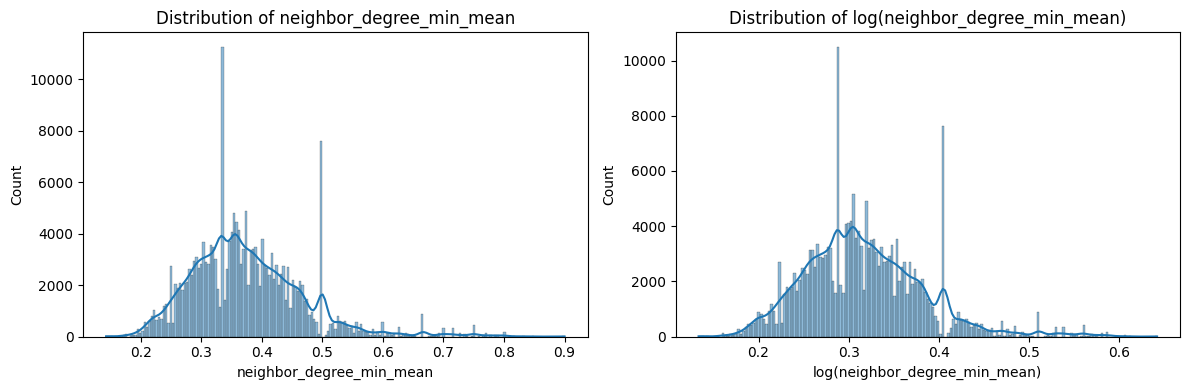


Feature: neighbor_degree_min_mean
Original skewness: 1.02
Log-transformed skewness: 0.74
Recommendation: Consider log transformation
--------------------------------------------------


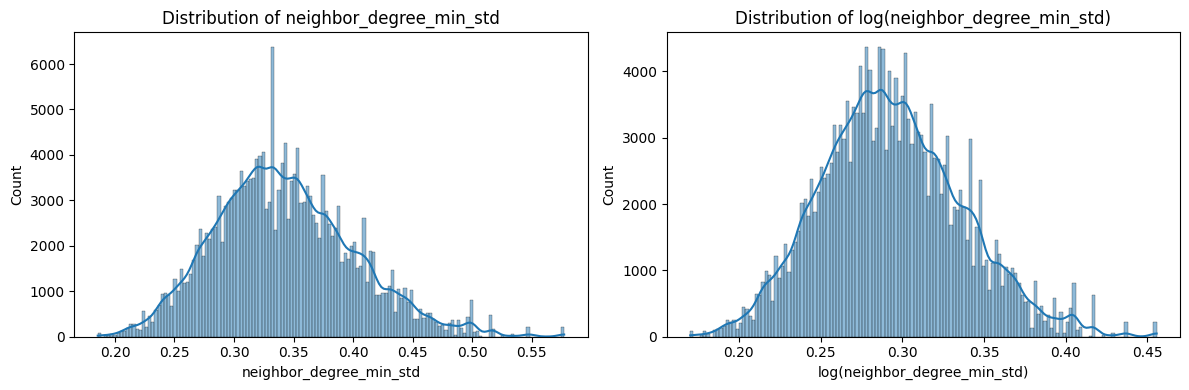


Feature: neighbor_degree_min_std
Original skewness: 0.43
Log-transformed skewness: 0.30
Recommendation: Consider log transformation
--------------------------------------------------


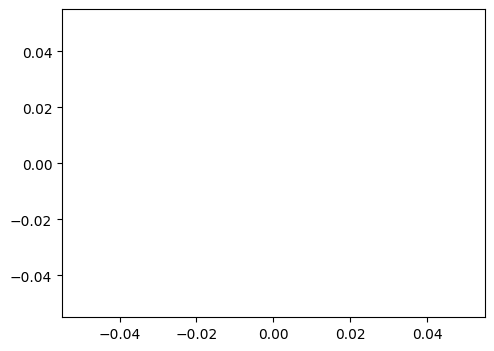

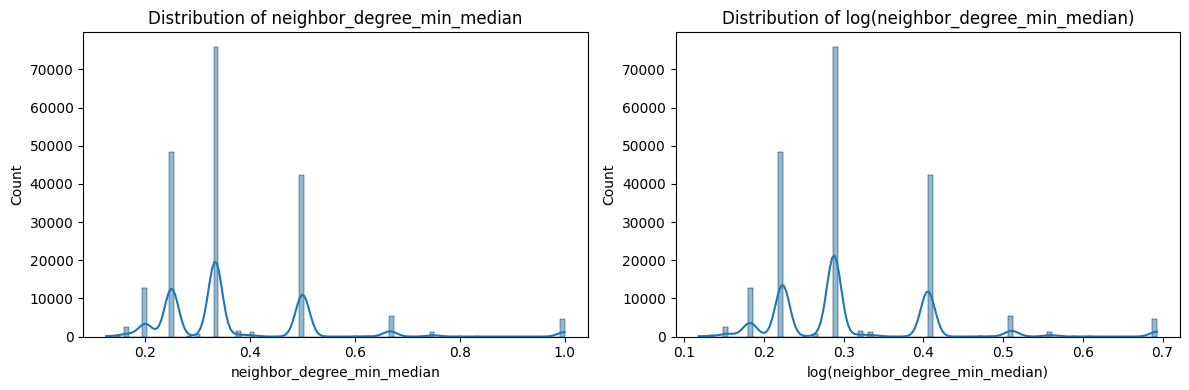


Feature: neighbor_degree_min_median
Original skewness: 1.95
Log-transformed skewness: 1.48
Recommendation: Consider log transformation
--------------------------------------------------


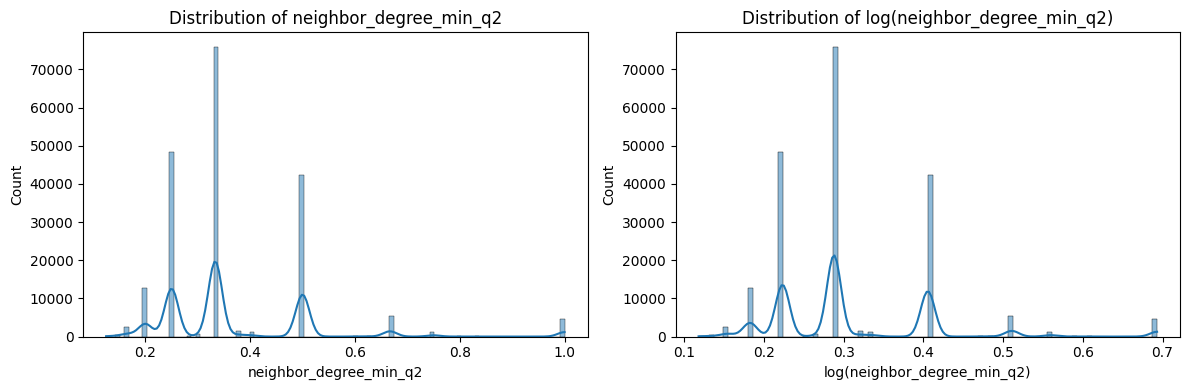


Feature: neighbor_degree_min_q2
Original skewness: 1.95
Log-transformed skewness: 1.48
Recommendation: Consider log transformation
--------------------------------------------------


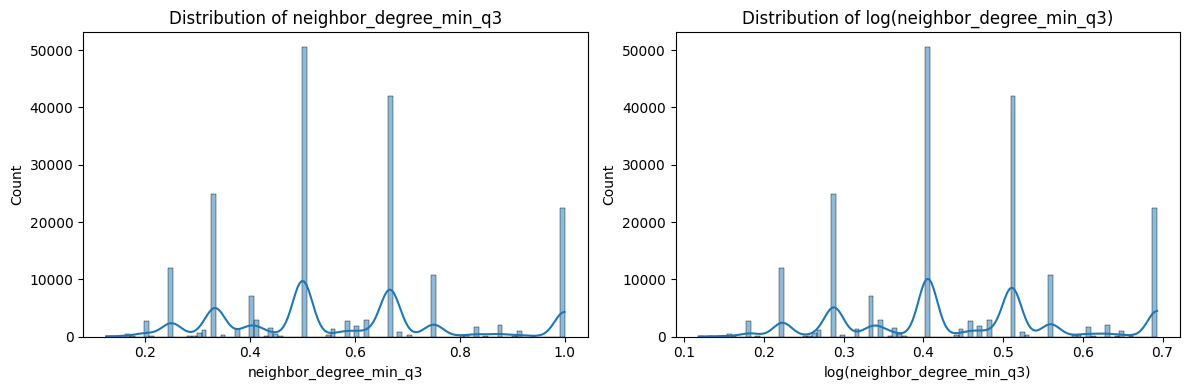


Feature: neighbor_degree_min_q3
Original skewness: 0.48
Log-transformed skewness: 0.21
Recommendation: Consider log transformation
--------------------------------------------------


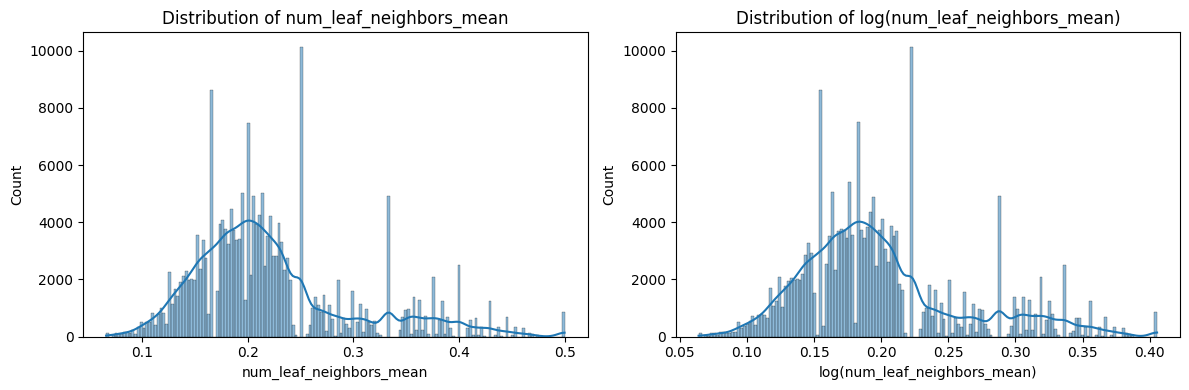


Feature: num_leaf_neighbors_mean
Original skewness: 1.13
Log-transformed skewness: 0.97
Recommendation: Consider log transformation
--------------------------------------------------


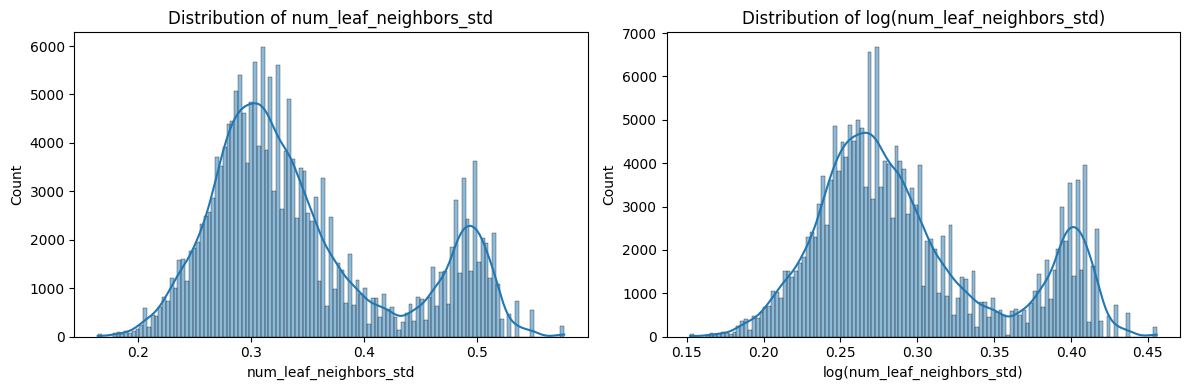


Feature: num_leaf_neighbors_std
Original skewness: 0.77
Log-transformed skewness: 0.68
Recommendation: Consider log transformation
--------------------------------------------------


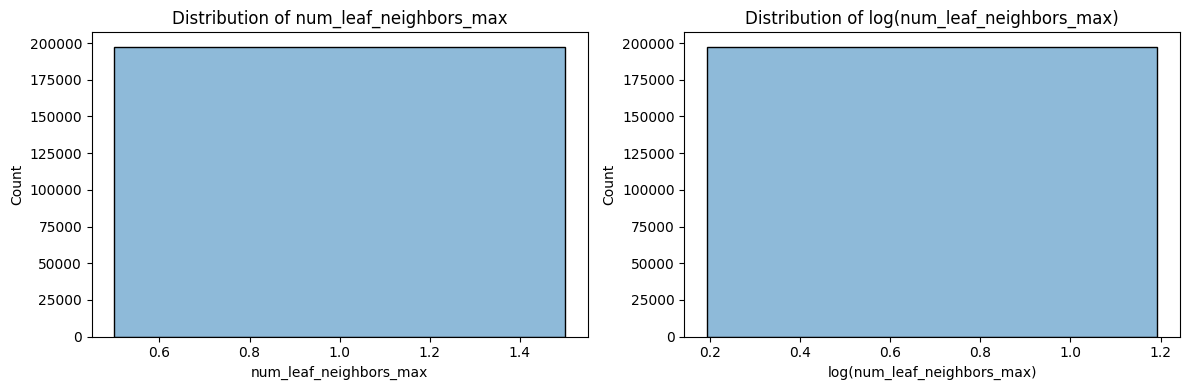


Feature: num_leaf_neighbors_max
Original skewness: 0.00
Log-transformed skewness: 0.00
Recommendation: Keep original scale
--------------------------------------------------


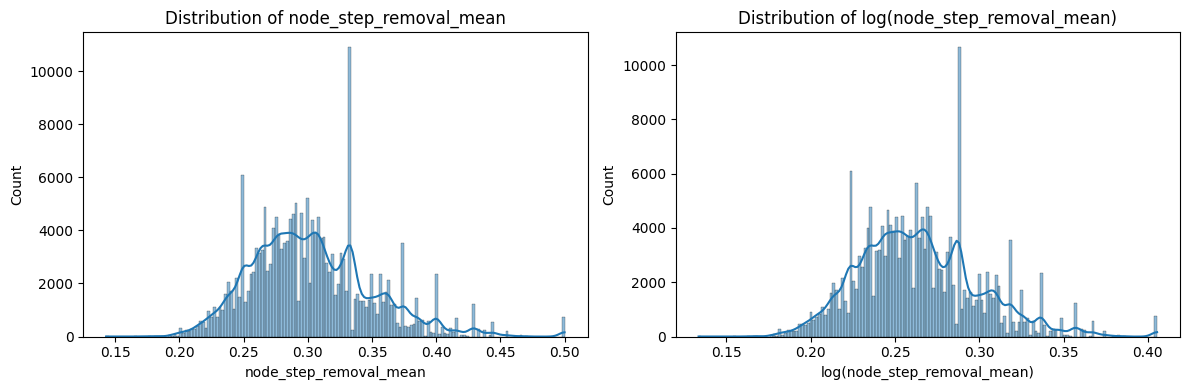


Feature: node_step_removal_mean
Original skewness: 0.69
Log-transformed skewness: 0.57
Recommendation: Consider log transformation
--------------------------------------------------


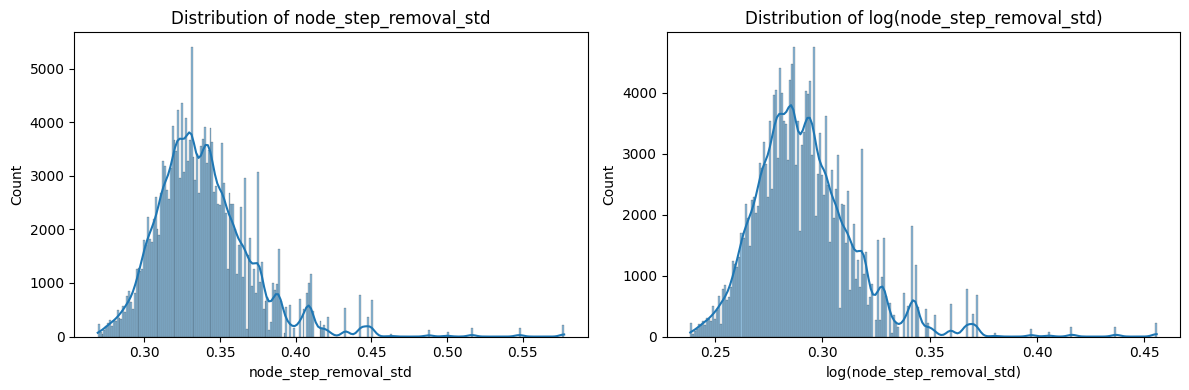


Feature: node_step_removal_std
Original skewness: 1.49
Log-transformed skewness: 1.30
Recommendation: Consider log transformation
--------------------------------------------------


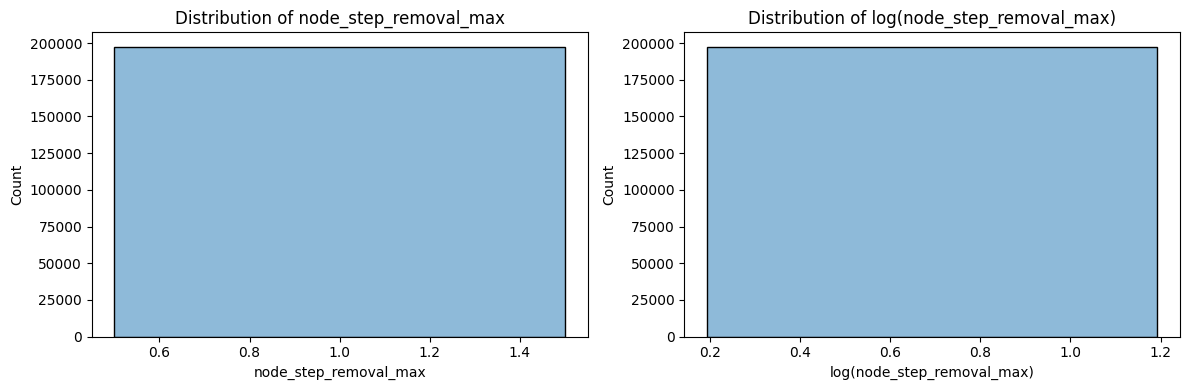


Feature: node_step_removal_max
Original skewness: 0.00
Log-transformed skewness: 0.00
Recommendation: Keep original scale
--------------------------------------------------


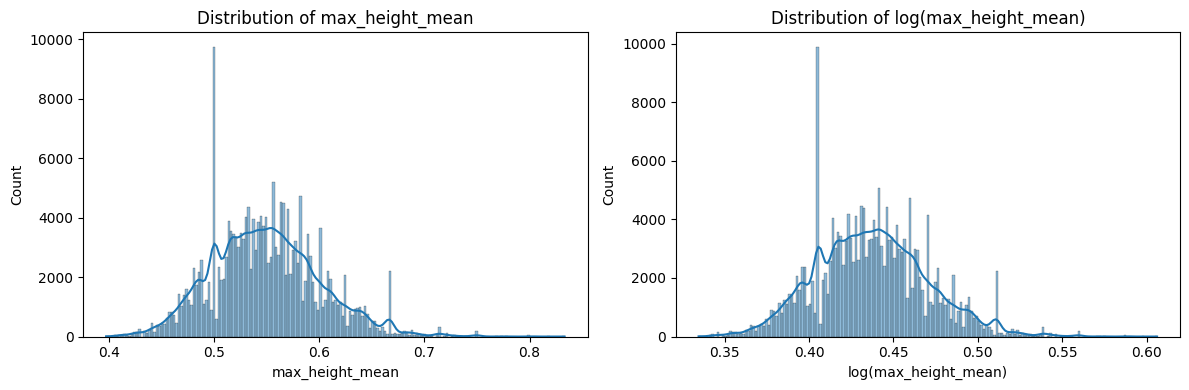


Feature: max_height_mean
Original skewness: 0.40
Log-transformed skewness: 0.29
Recommendation: Consider log transformation
--------------------------------------------------


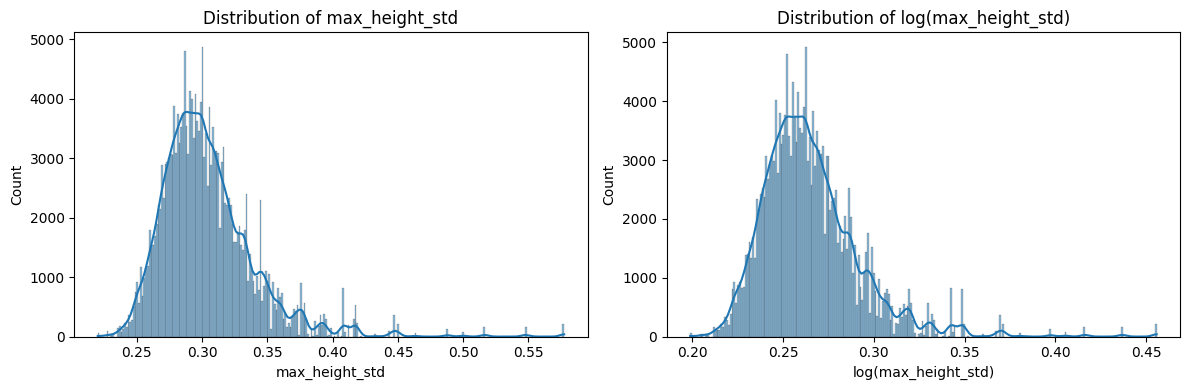


Feature: max_height_std
Original skewness: 1.82
Log-transformed skewness: 1.58
Recommendation: Consider log transformation
--------------------------------------------------


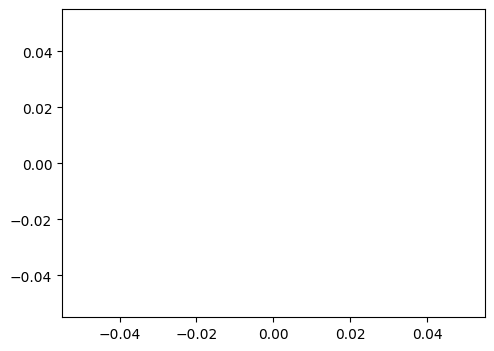

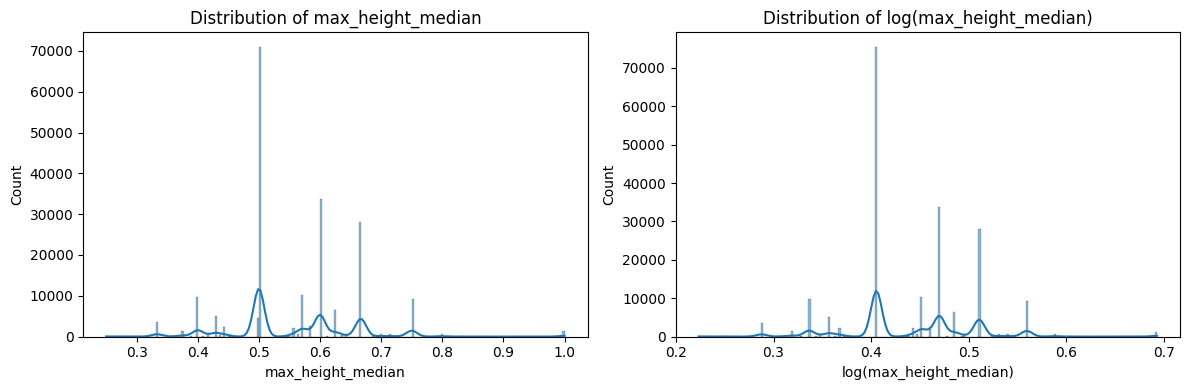


Feature: max_height_median
Original skewness: 0.55
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


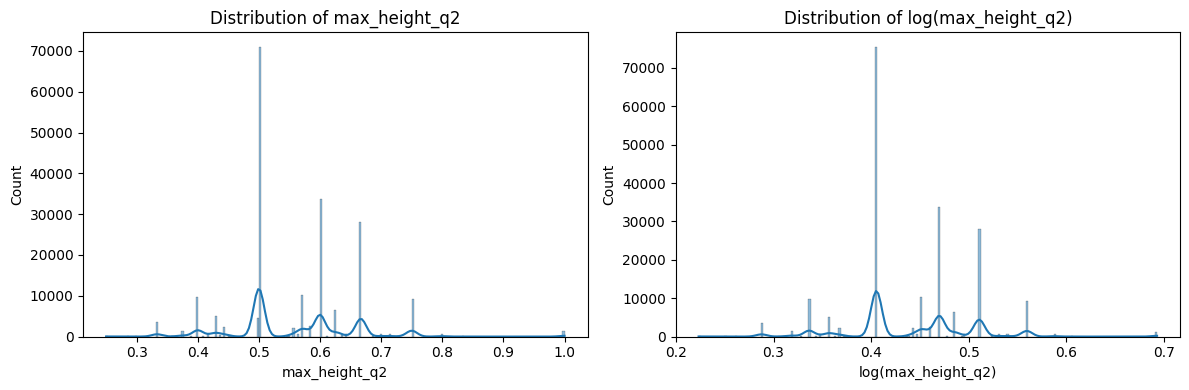


Feature: max_height_q2
Original skewness: 0.55
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


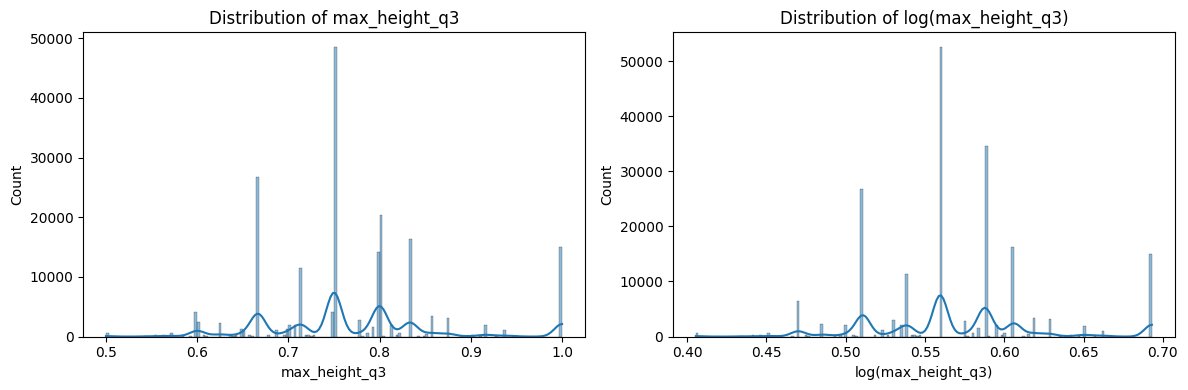


Feature: max_height_q3
Original skewness: 0.65
Log-transformed skewness: 0.46
Recommendation: Consider log transformation
--------------------------------------------------


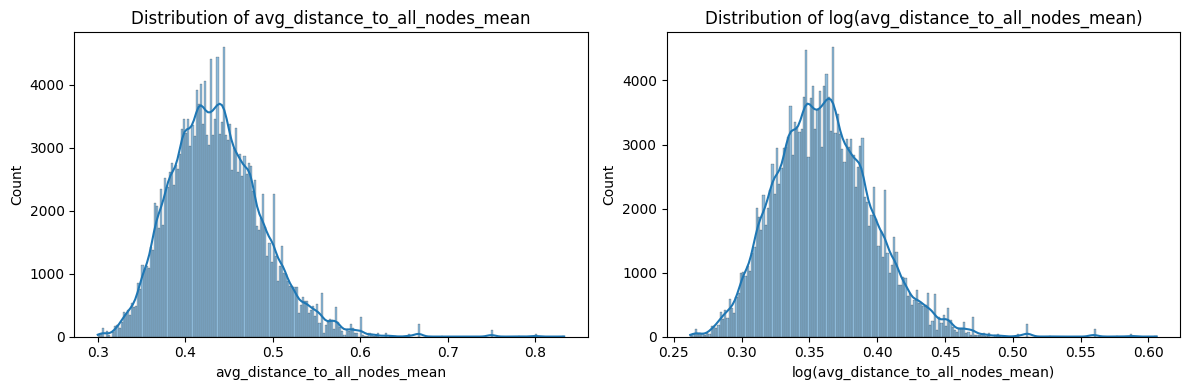


Feature: avg_distance_to_all_nodes_mean
Original skewness: 0.69
Log-transformed skewness: 0.53
Recommendation: Consider log transformation
--------------------------------------------------


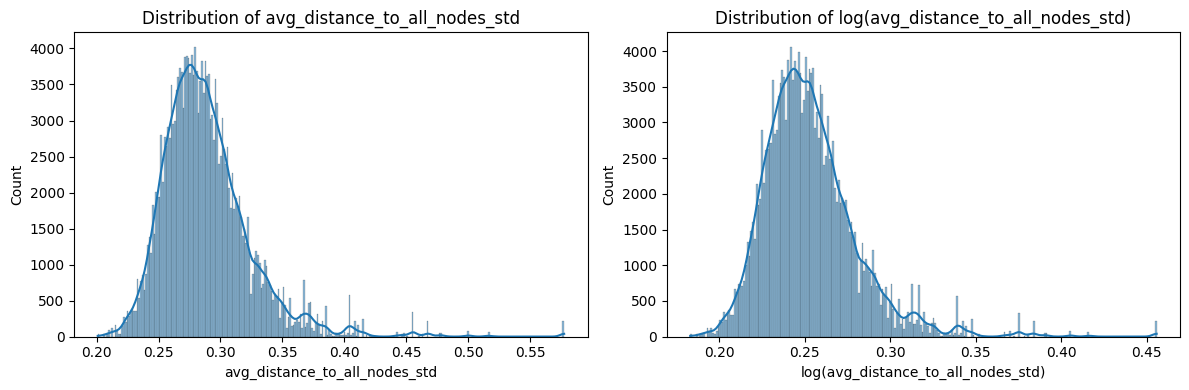


Feature: avg_distance_to_all_nodes_std
Original skewness: 1.73
Log-transformed skewness: 1.49
Recommendation: Consider log transformation
--------------------------------------------------


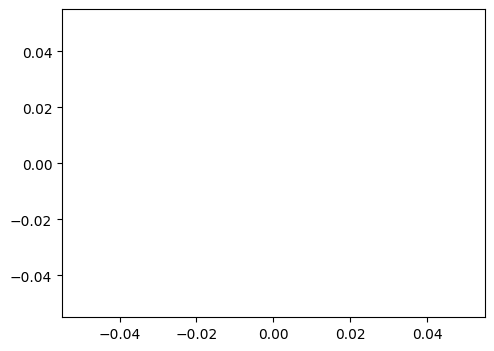

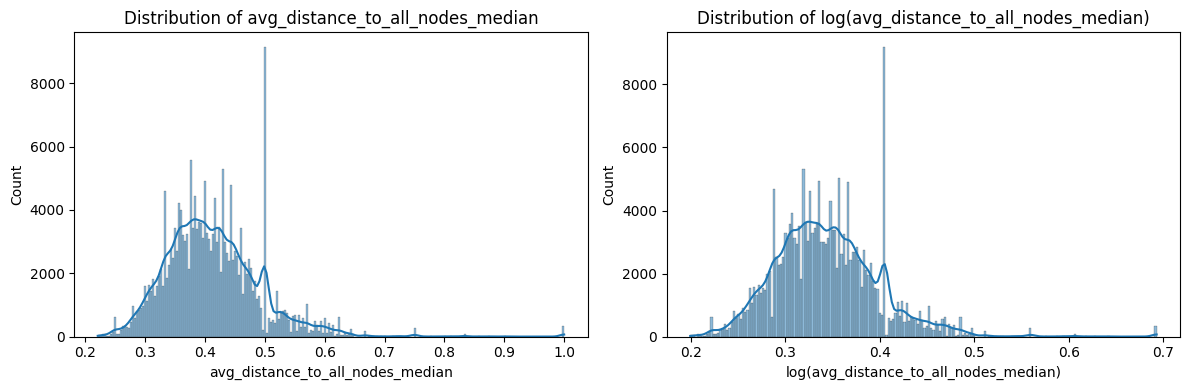


Feature: avg_distance_to_all_nodes_median
Original skewness: 1.30
Log-transformed skewness: 0.89
Recommendation: Consider log transformation
--------------------------------------------------


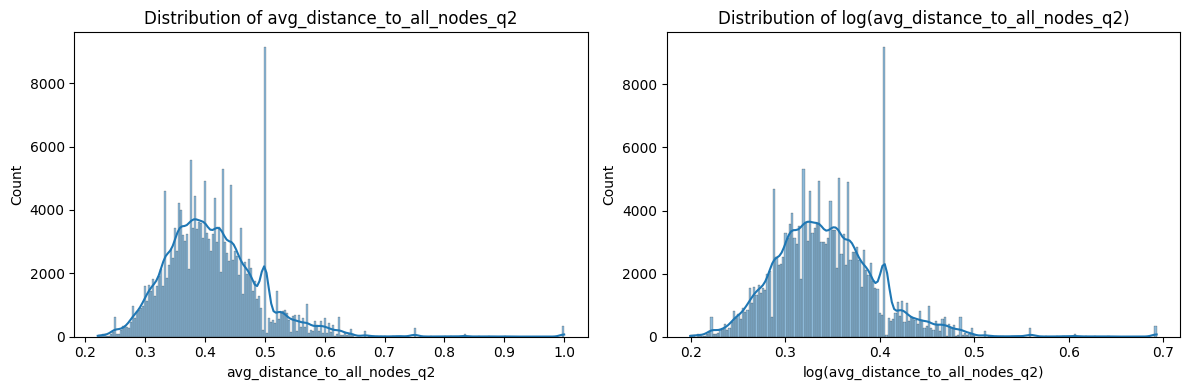


Feature: avg_distance_to_all_nodes_q2
Original skewness: 1.30
Log-transformed skewness: 0.89
Recommendation: Consider log transformation
--------------------------------------------------


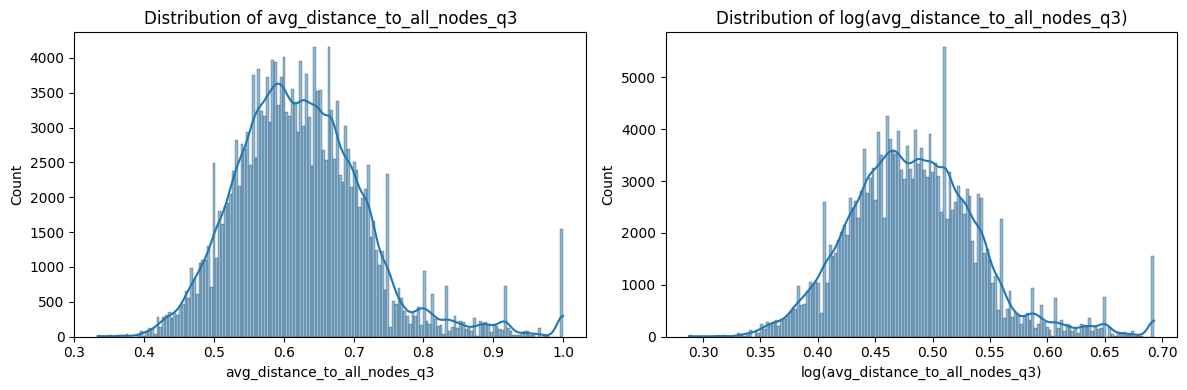


Feature: avg_distance_to_all_nodes_q3
Original skewness: 0.84
Log-transformed skewness: 0.59
Recommendation: Consider log transformation
--------------------------------------------------


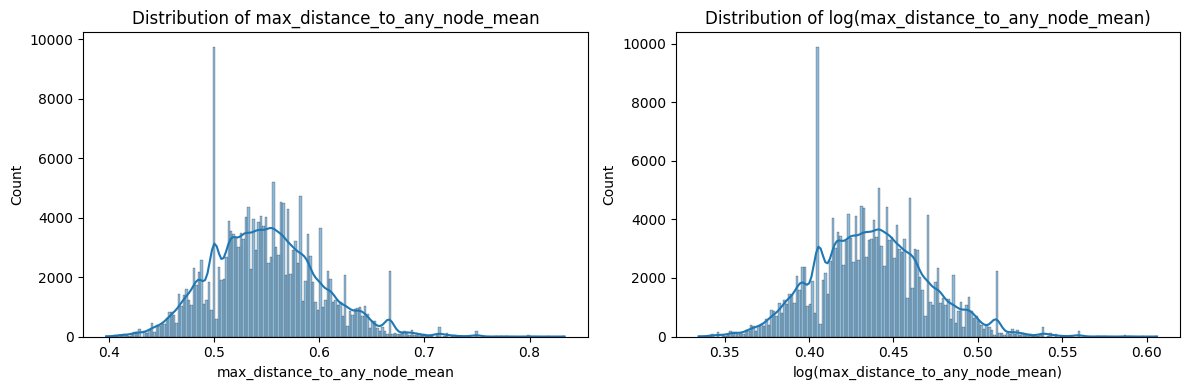


Feature: max_distance_to_any_node_mean
Original skewness: 0.40
Log-transformed skewness: 0.29
Recommendation: Consider log transformation
--------------------------------------------------


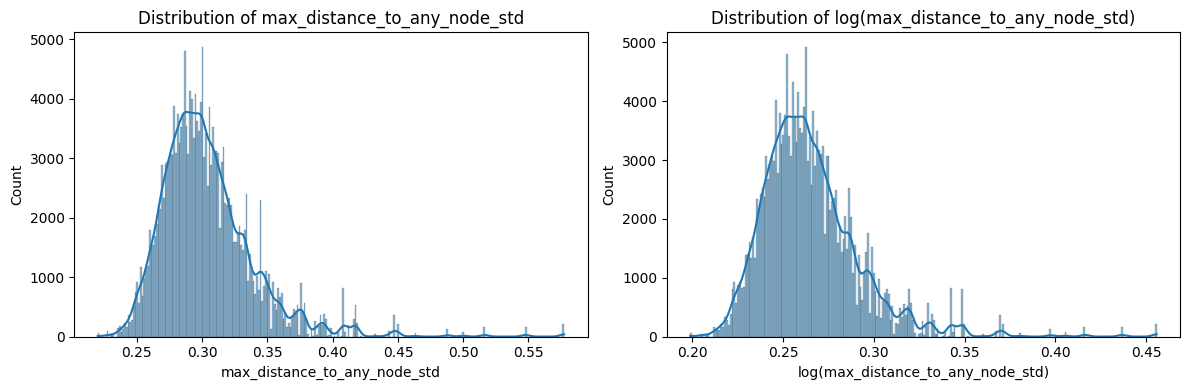


Feature: max_distance_to_any_node_std
Original skewness: 1.82
Log-transformed skewness: 1.58
Recommendation: Consider log transformation
--------------------------------------------------


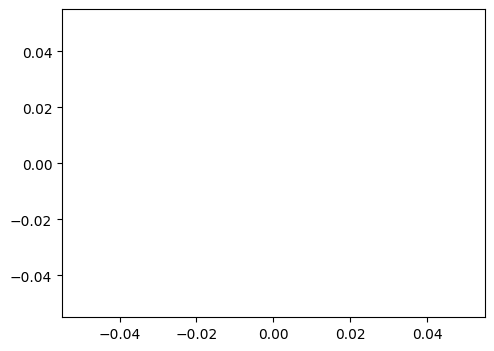

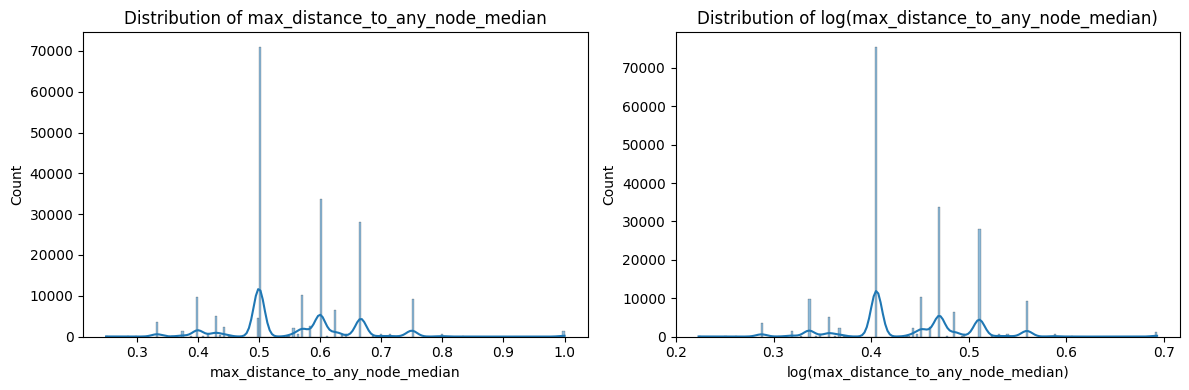


Feature: max_distance_to_any_node_median
Original skewness: 0.55
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


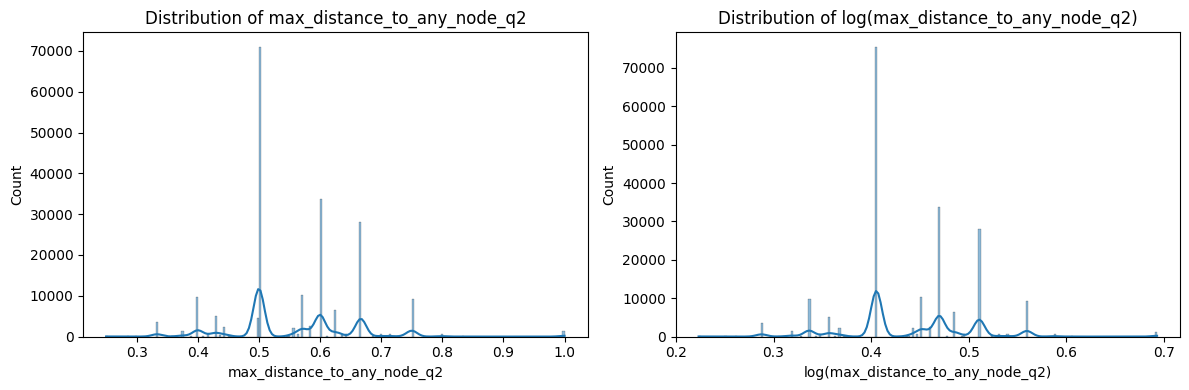


Feature: max_distance_to_any_node_q2
Original skewness: 0.55
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


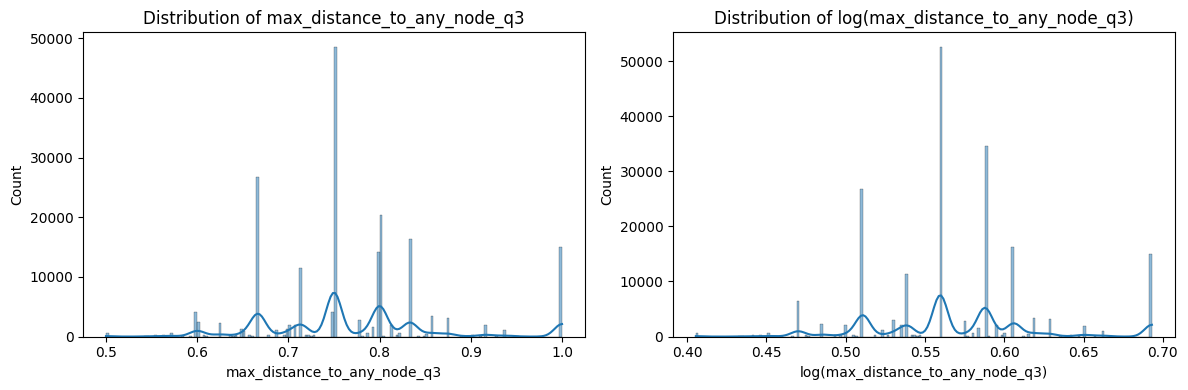


Feature: max_distance_to_any_node_q3
Original skewness: 0.65
Log-transformed skewness: 0.46
Recommendation: Consider log transformation
--------------------------------------------------


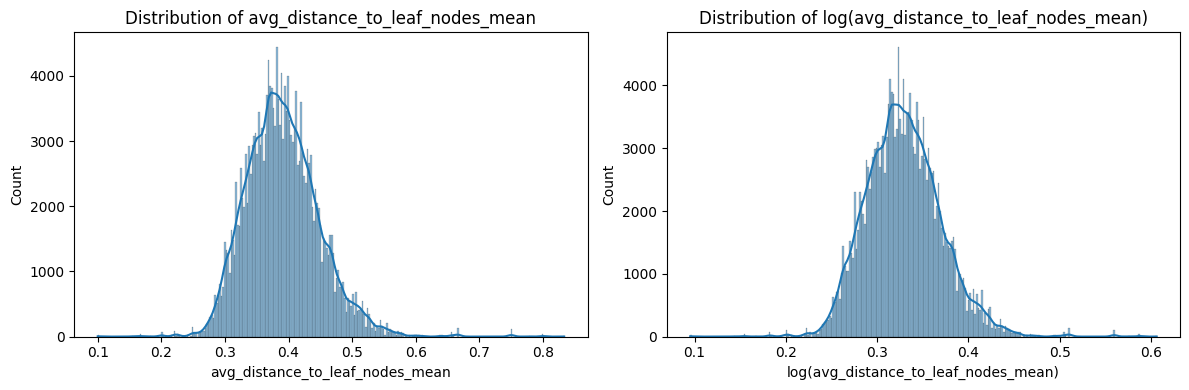


Feature: avg_distance_to_leaf_nodes_mean
Original skewness: 0.64
Log-transformed skewness: 0.43
Recommendation: Consider log transformation
--------------------------------------------------


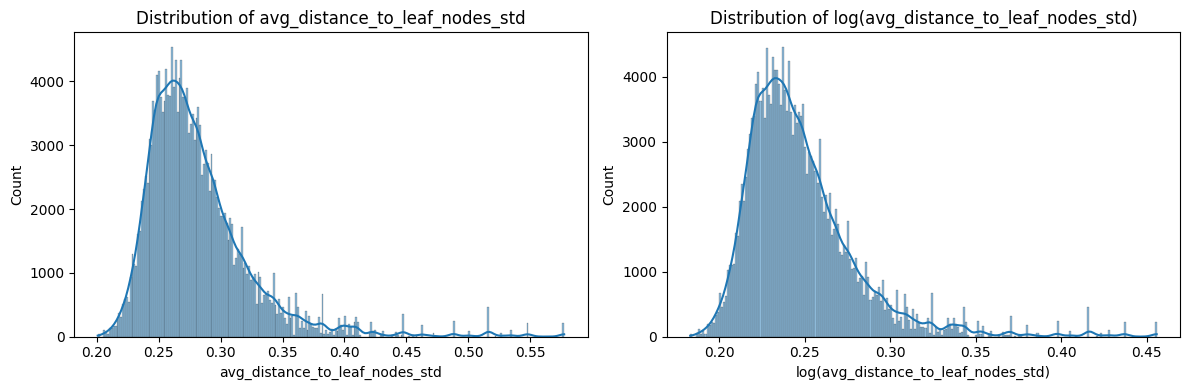


Feature: avg_distance_to_leaf_nodes_std
Original skewness: 2.18
Log-transformed skewness: 1.93
Recommendation: Consider log transformation
--------------------------------------------------


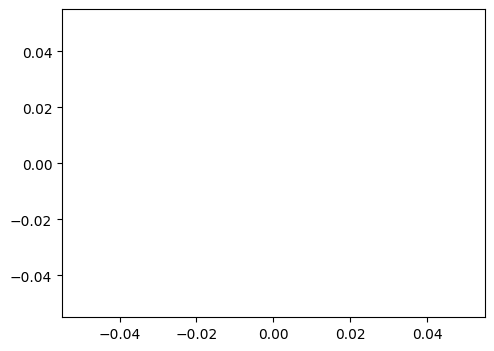

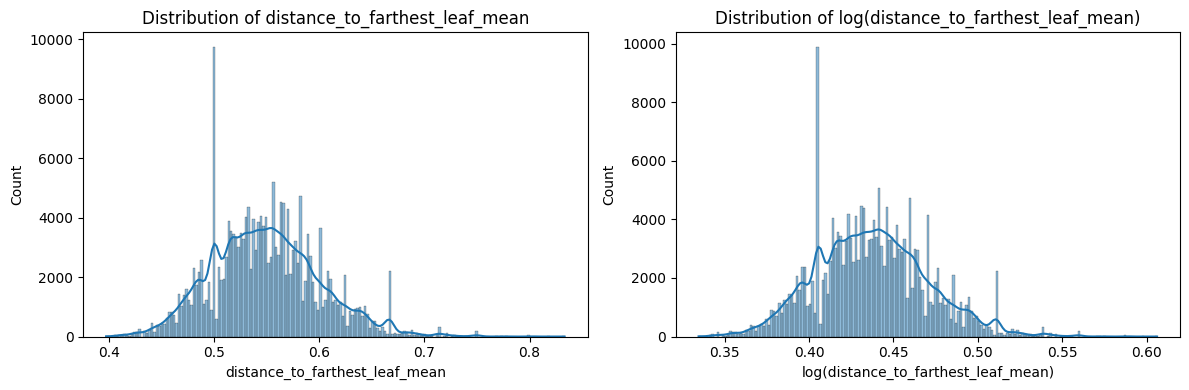


Feature: distance_to_farthest_leaf_mean
Original skewness: 0.40
Log-transformed skewness: 0.29
Recommendation: Consider log transformation
--------------------------------------------------


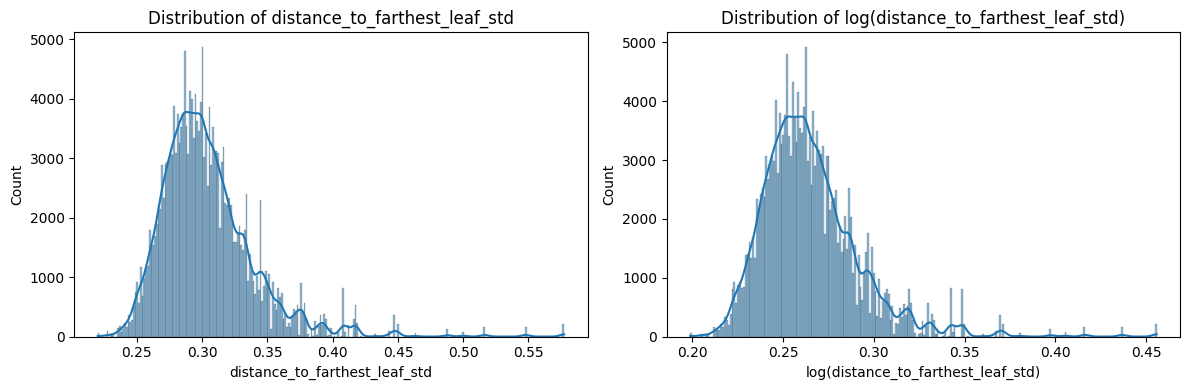


Feature: distance_to_farthest_leaf_std
Original skewness: 1.82
Log-transformed skewness: 1.58
Recommendation: Consider log transformation
--------------------------------------------------


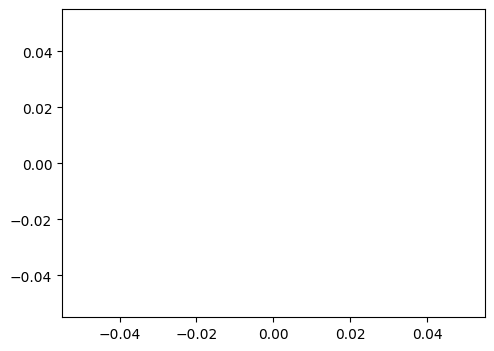

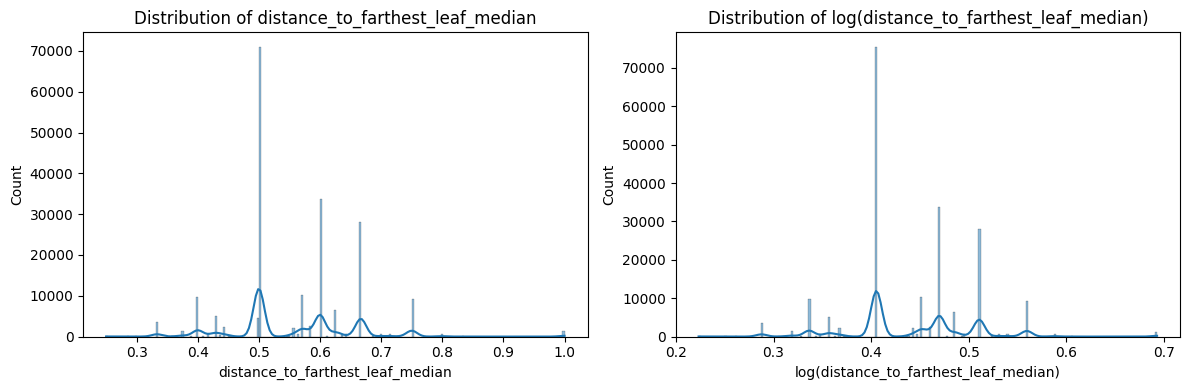


Feature: distance_to_farthest_leaf_median
Original skewness: 0.55
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


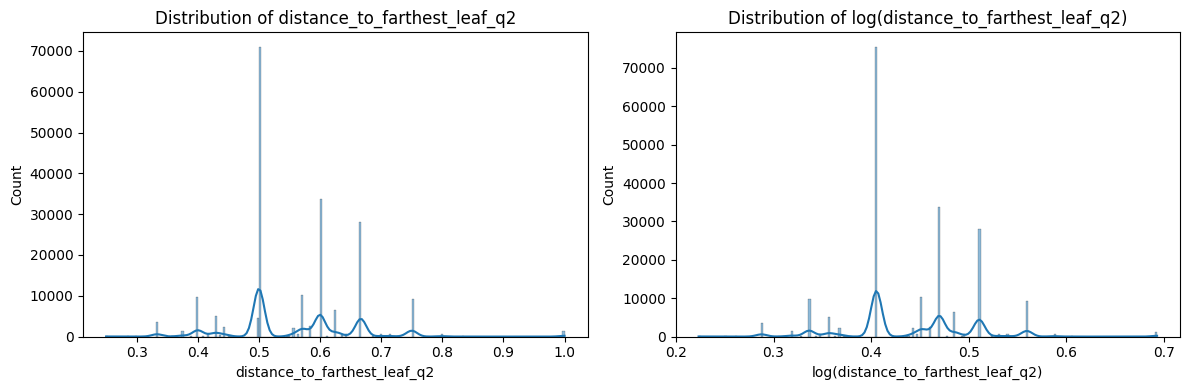


Feature: distance_to_farthest_leaf_q2
Original skewness: 0.55
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


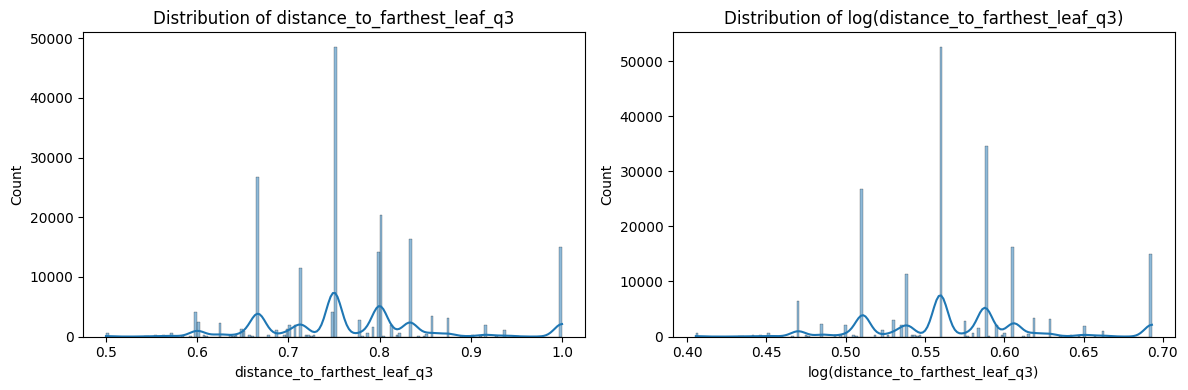


Feature: distance_to_farthest_leaf_q3
Original skewness: 0.65
Log-transformed skewness: 0.46
Recommendation: Consider log transformation
--------------------------------------------------


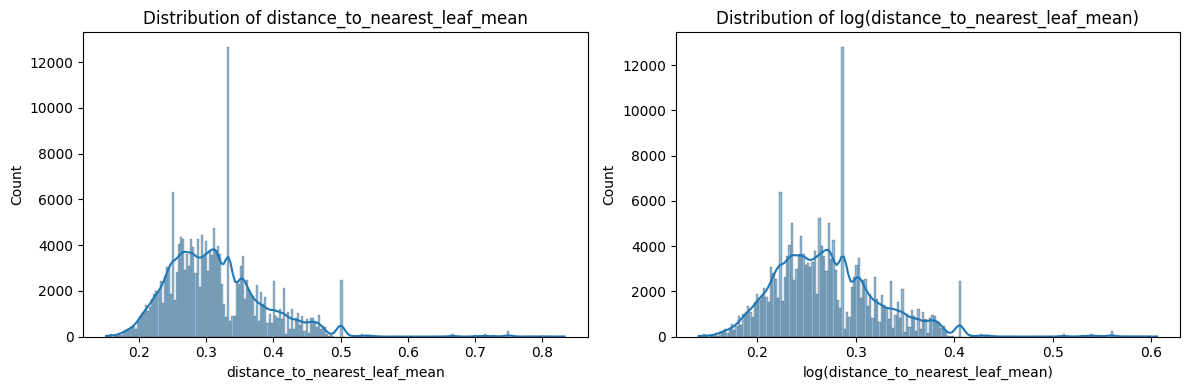


Feature: distance_to_nearest_leaf_mean
Original skewness: 1.20
Log-transformed skewness: 0.90
Recommendation: Consider log transformation
--------------------------------------------------


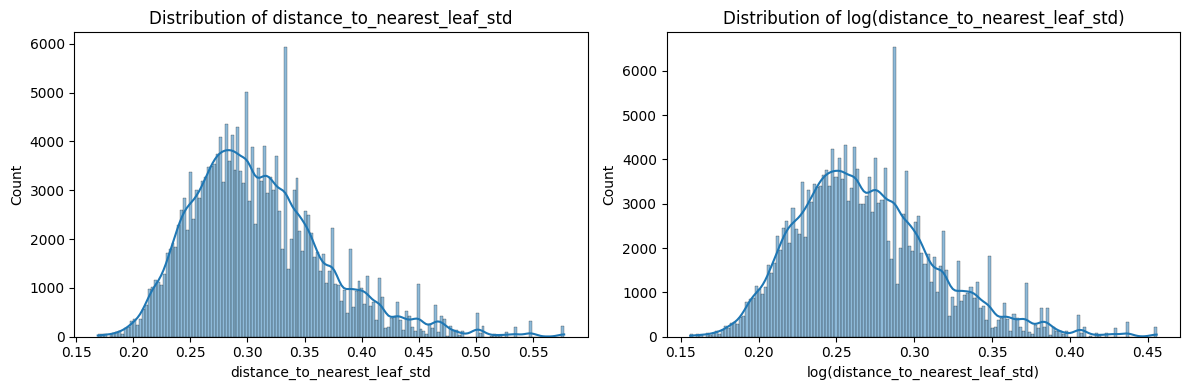


Feature: distance_to_nearest_leaf_std
Original skewness: 0.85
Log-transformed skewness: 0.69
Recommendation: Consider log transformation
--------------------------------------------------


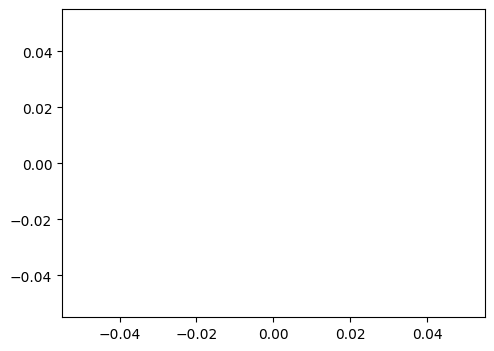

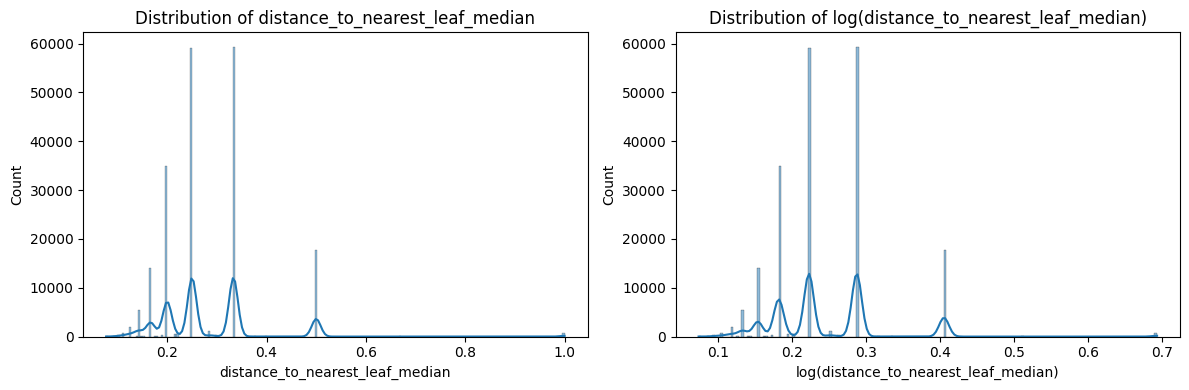


Feature: distance_to_nearest_leaf_median
Original skewness: 1.92
Log-transformed skewness: 1.33
Recommendation: Consider log transformation
--------------------------------------------------


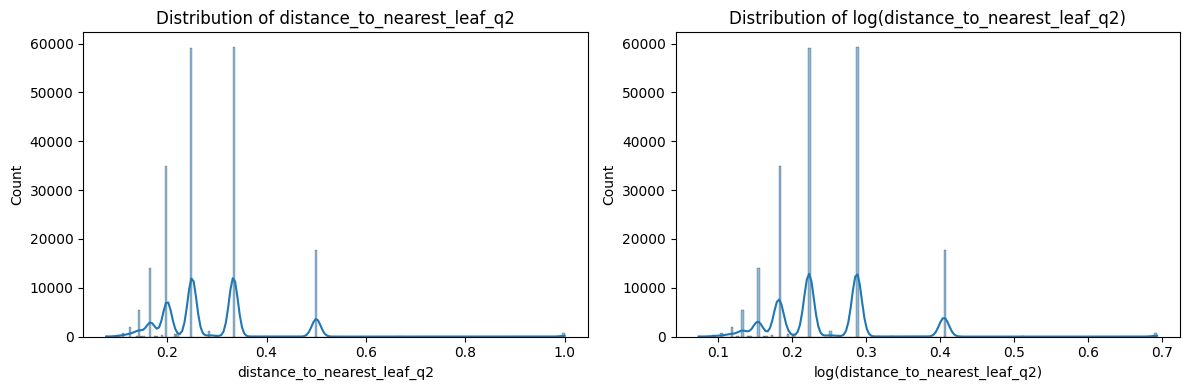


Feature: distance_to_nearest_leaf_q2
Original skewness: 1.92
Log-transformed skewness: 1.33
Recommendation: Consider log transformation
--------------------------------------------------


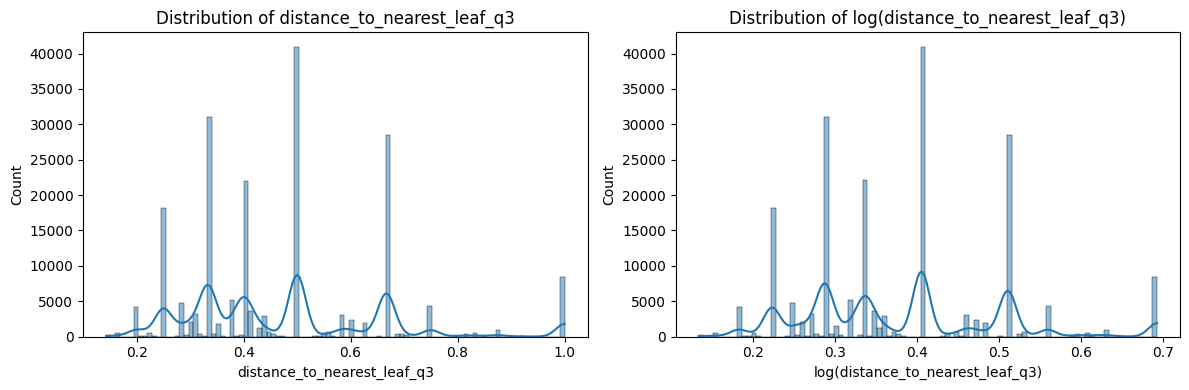


Feature: distance_to_nearest_leaf_q3
Original skewness: 0.99
Log-transformed skewness: 0.68
Recommendation: Consider log transformation
--------------------------------------------------


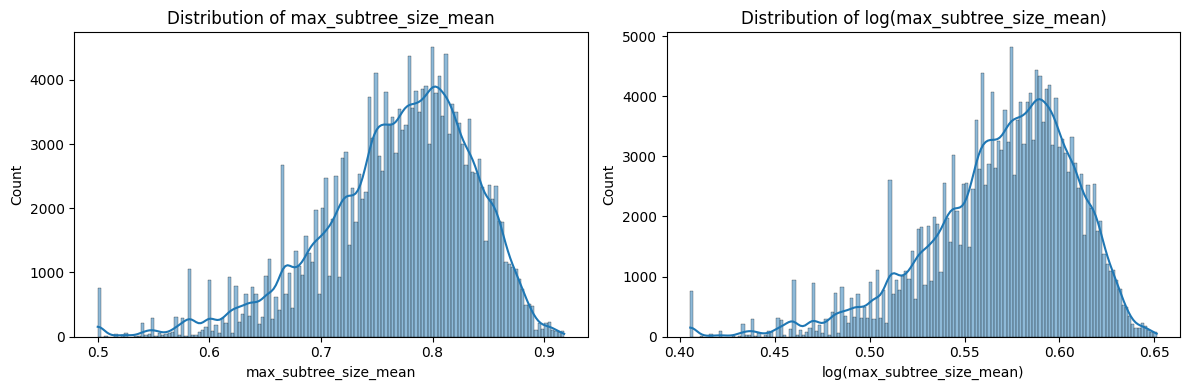


Feature: max_subtree_size_mean
Original skewness: -0.81
Log-transformed skewness: -0.95
Recommendation: Keep original scale
--------------------------------------------------


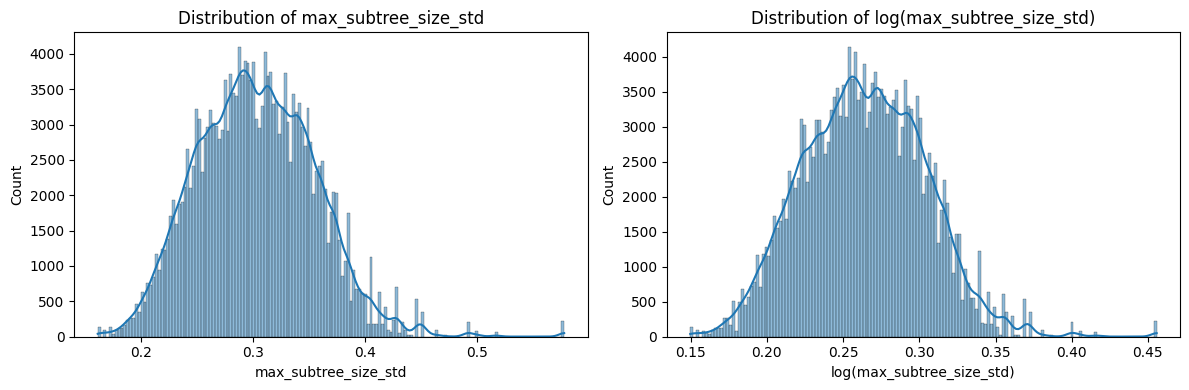


Feature: max_subtree_size_std
Original skewness: 0.34
Log-transformed skewness: 0.20
Recommendation: Consider log transformation
--------------------------------------------------


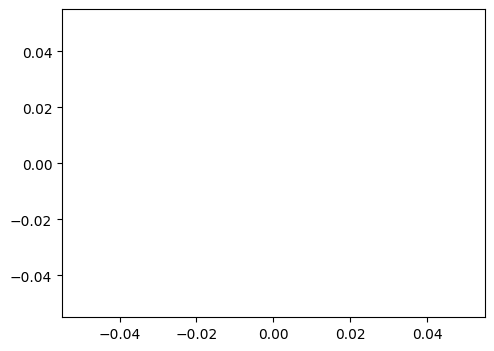

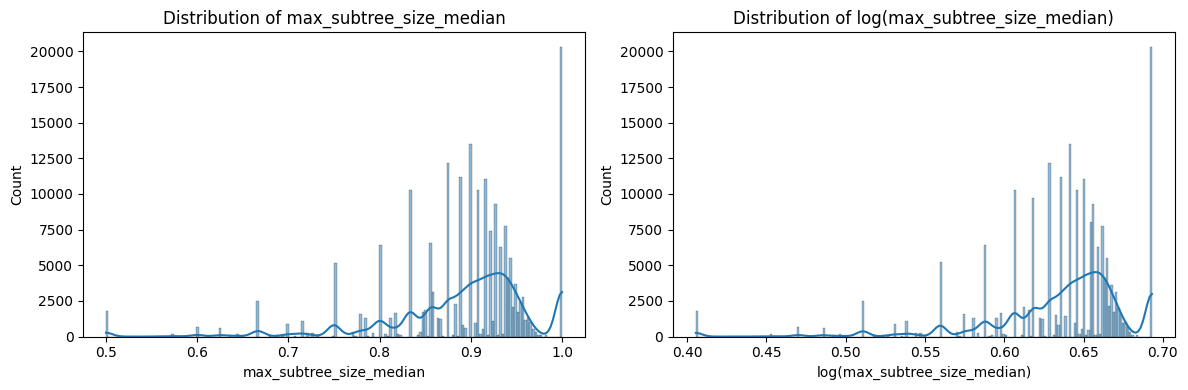


Feature: max_subtree_size_median
Original skewness: -1.75
Log-transformed skewness: -2.03
Recommendation: Keep original scale
--------------------------------------------------


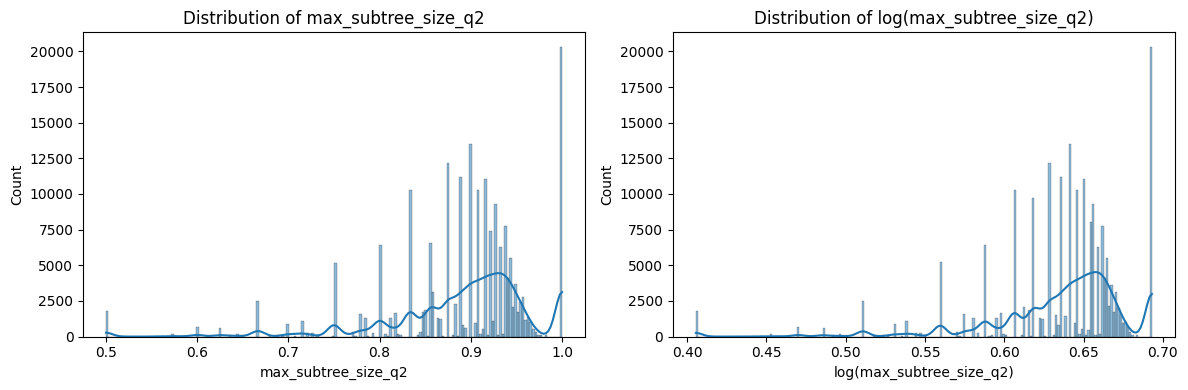


Feature: max_subtree_size_q2
Original skewness: -1.75
Log-transformed skewness: -2.03
Recommendation: Keep original scale
--------------------------------------------------


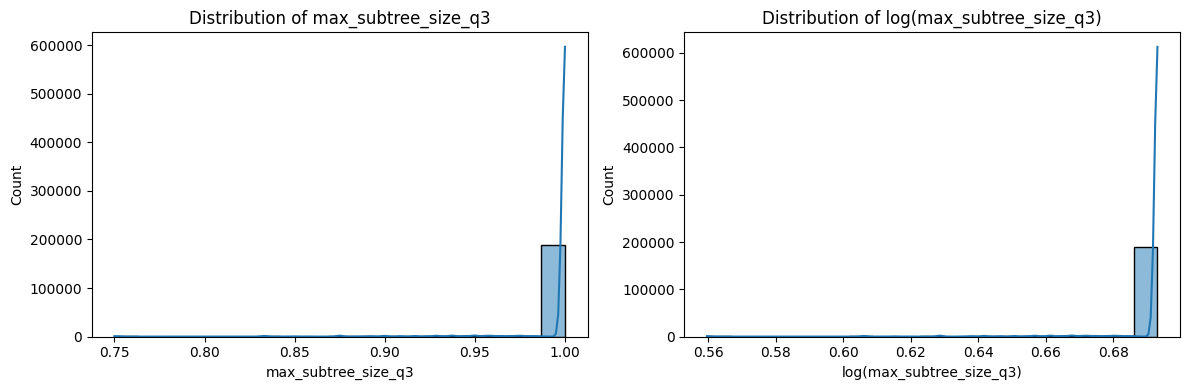


Feature: max_subtree_size_q3
Original skewness: -7.50
Log-transformed skewness: -7.72
Recommendation: Keep original scale
--------------------------------------------------


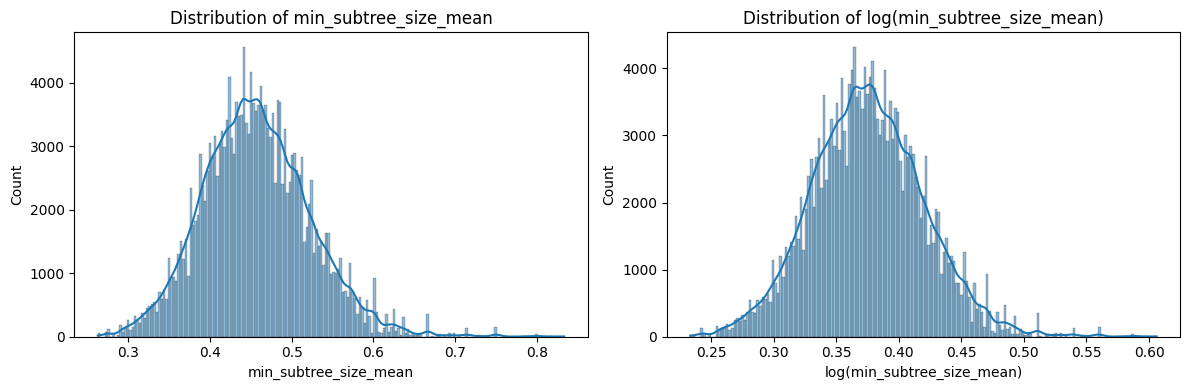


Feature: min_subtree_size_mean
Original skewness: 0.38
Log-transformed skewness: 0.22
Recommendation: Consider log transformation
--------------------------------------------------


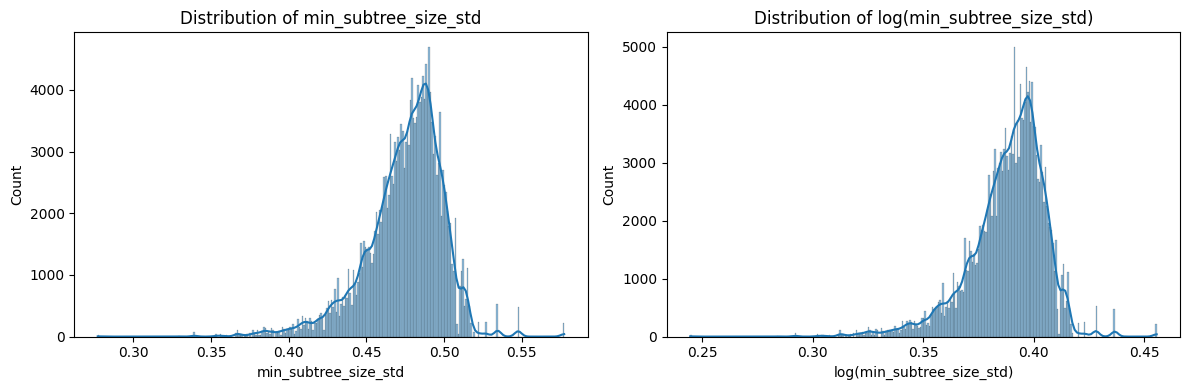


Feature: min_subtree_size_std
Original skewness: -0.97
Log-transformed skewness: -1.06
Recommendation: Keep original scale
--------------------------------------------------


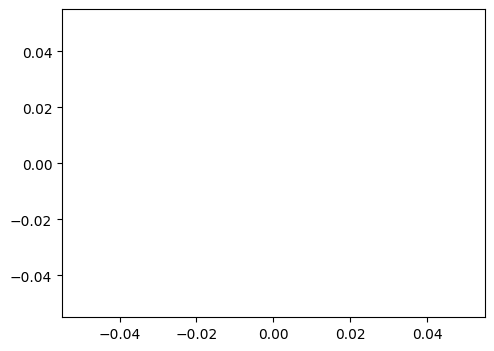

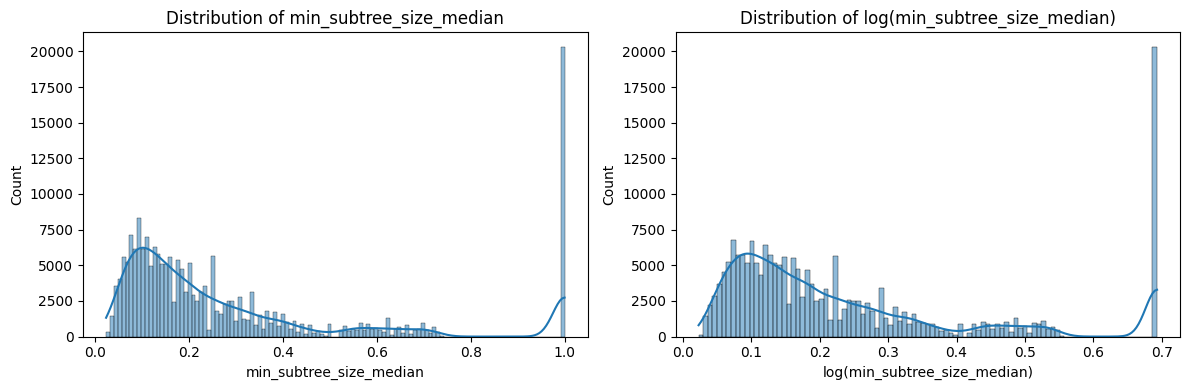


Feature: min_subtree_size_median
Original skewness: 1.57
Log-transformed skewness: 1.31
Recommendation: Consider log transformation
--------------------------------------------------


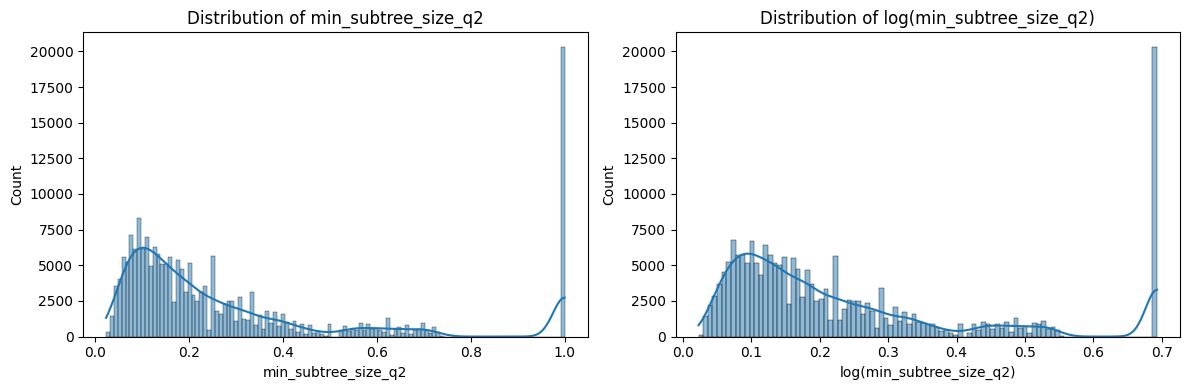


Feature: min_subtree_size_q2
Original skewness: 1.57
Log-transformed skewness: 1.31
Recommendation: Consider log transformation
--------------------------------------------------


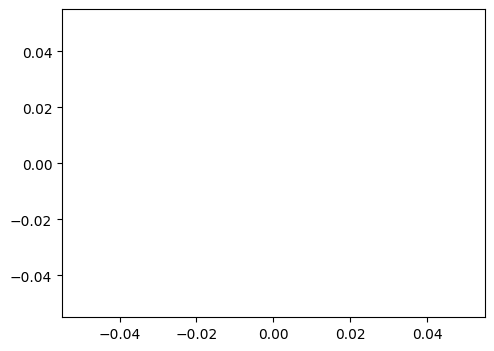

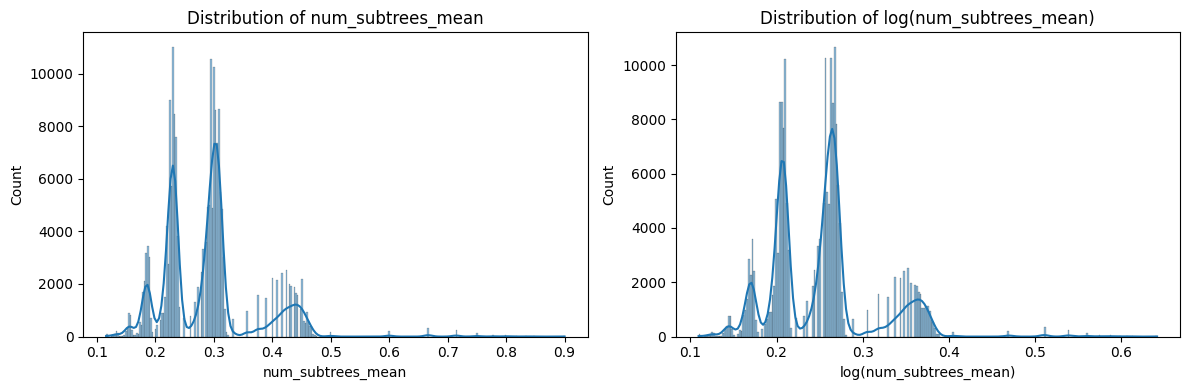


Feature: num_subtrees_mean
Original skewness: 1.37
Log-transformed skewness: 1.05
Recommendation: Consider log transformation
--------------------------------------------------


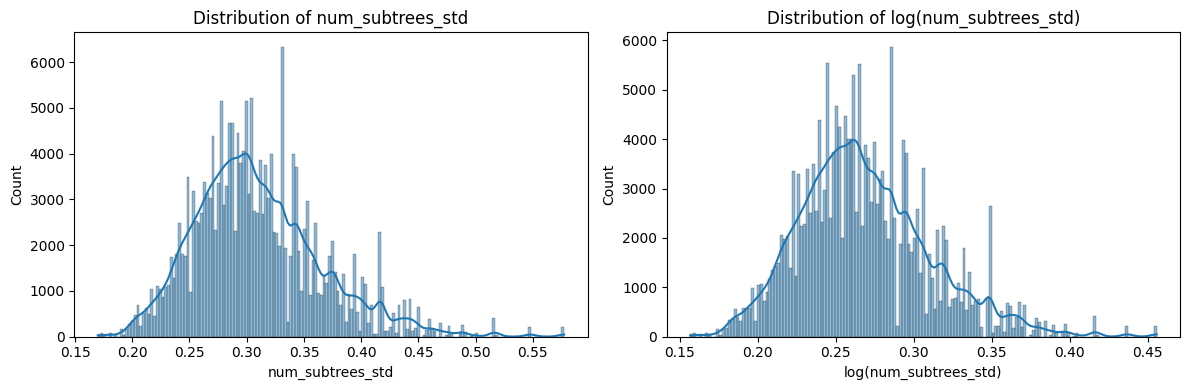


Feature: num_subtrees_std
Original skewness: 0.78
Log-transformed skewness: 0.63
Recommendation: Consider log transformation
--------------------------------------------------


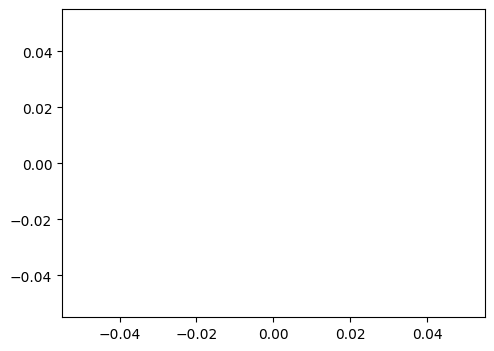

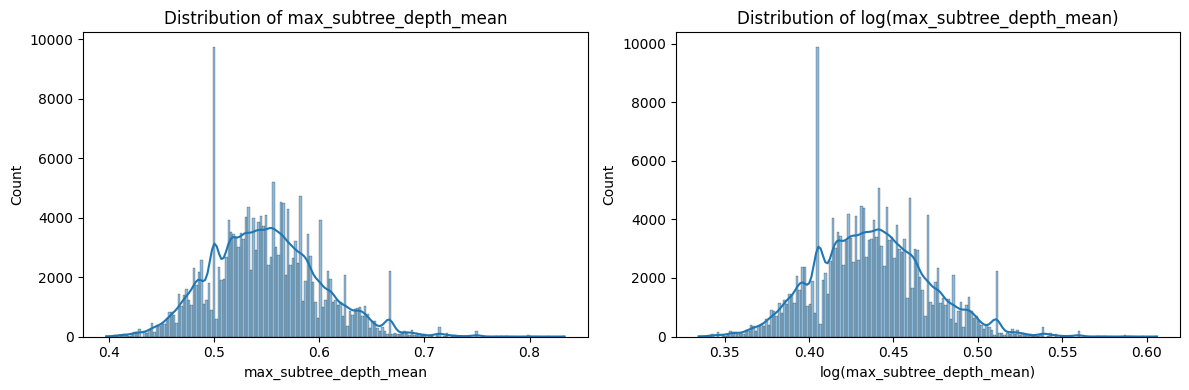


Feature: max_subtree_depth_mean
Original skewness: 0.40
Log-transformed skewness: 0.29
Recommendation: Consider log transformation
--------------------------------------------------


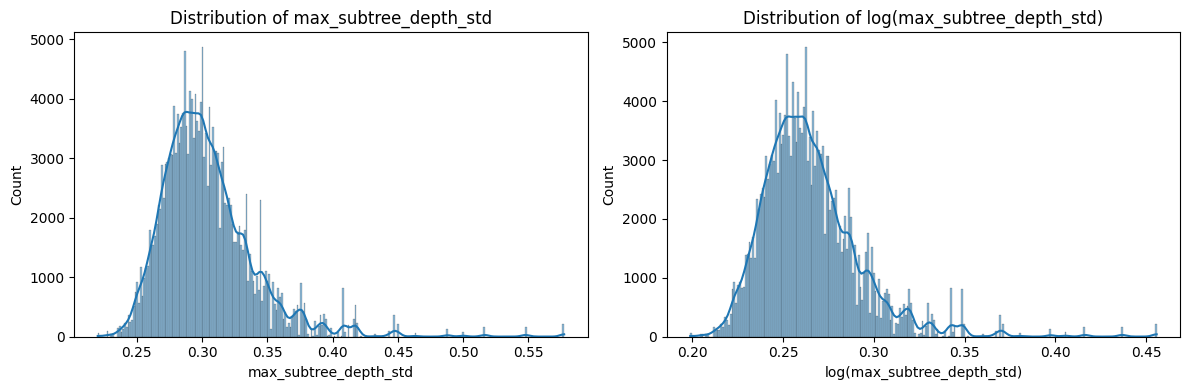


Feature: max_subtree_depth_std
Original skewness: 1.82
Log-transformed skewness: 1.58
Recommendation: Consider log transformation
--------------------------------------------------


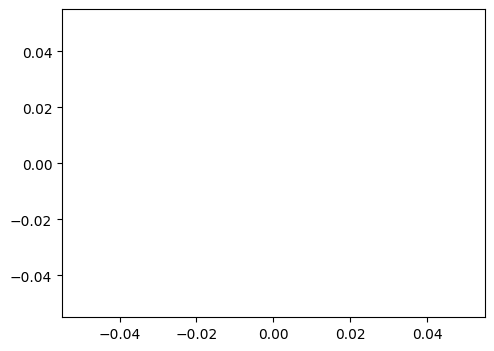

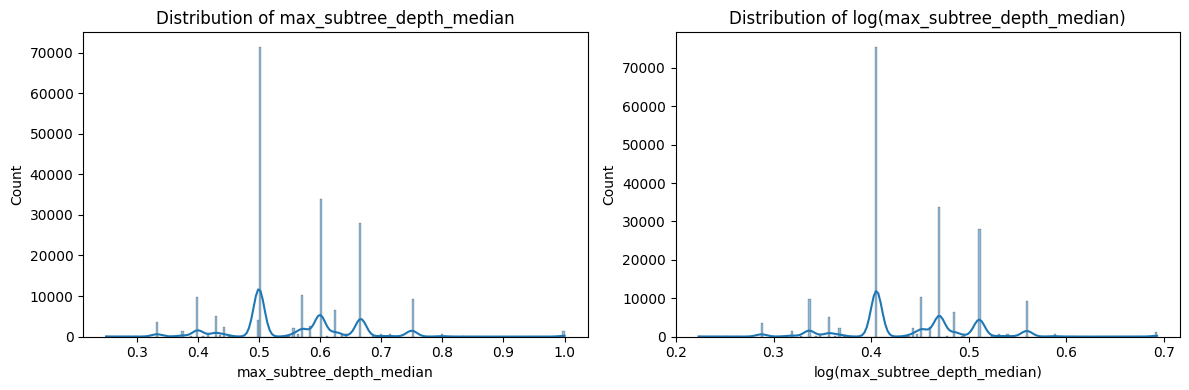


Feature: max_subtree_depth_median
Original skewness: 0.55
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


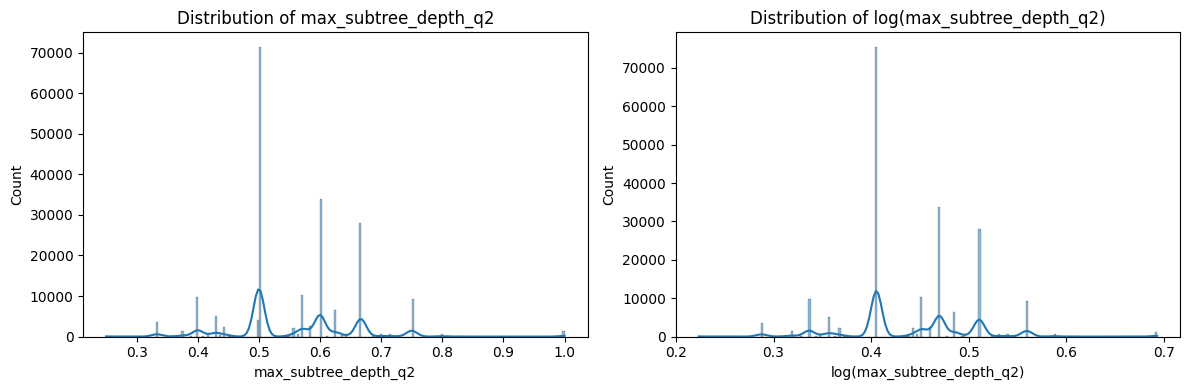


Feature: max_subtree_depth_q2
Original skewness: 0.55
Log-transformed skewness: 0.27
Recommendation: Consider log transformation
--------------------------------------------------


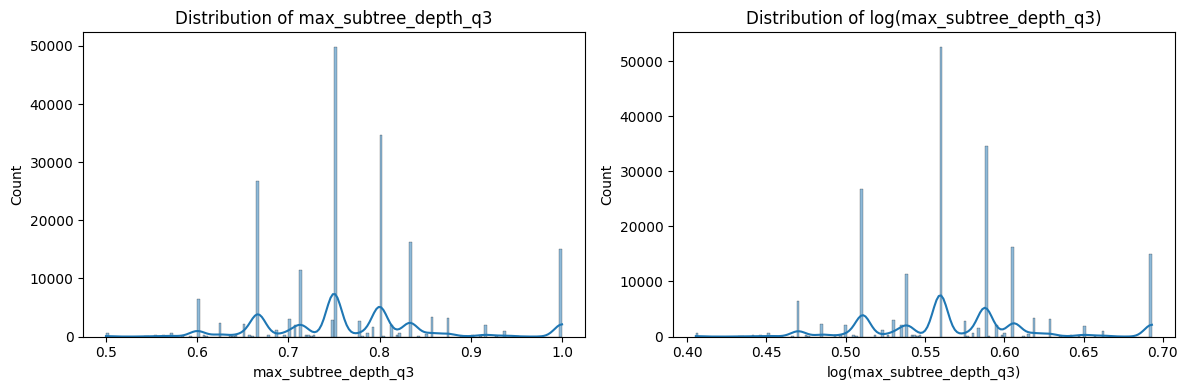


Feature: max_subtree_depth_q3
Original skewness: 0.65
Log-transformed skewness: 0.46
Recommendation: Consider log transformation
--------------------------------------------------


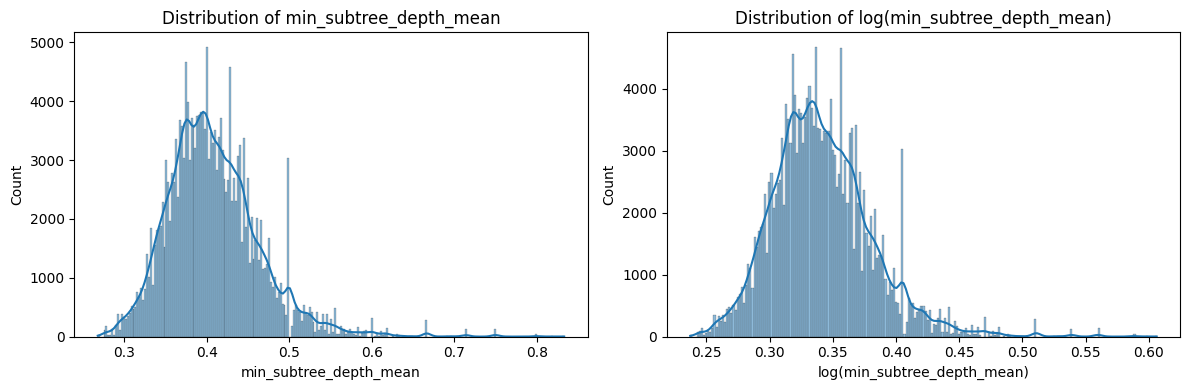


Feature: min_subtree_depth_mean
Original skewness: 1.04
Log-transformed skewness: 0.83
Recommendation: Consider log transformation
--------------------------------------------------


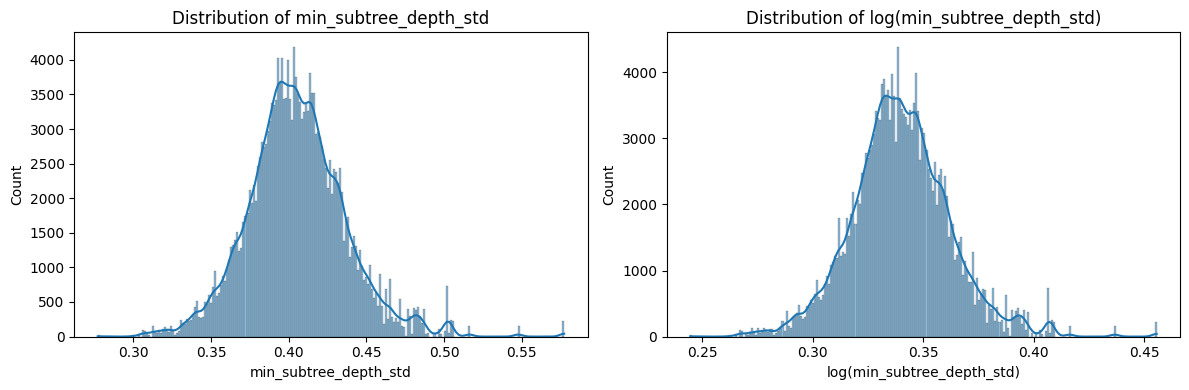


Feature: min_subtree_depth_std
Original skewness: 0.44
Log-transformed skewness: 0.32
Recommendation: Consider log transformation
--------------------------------------------------


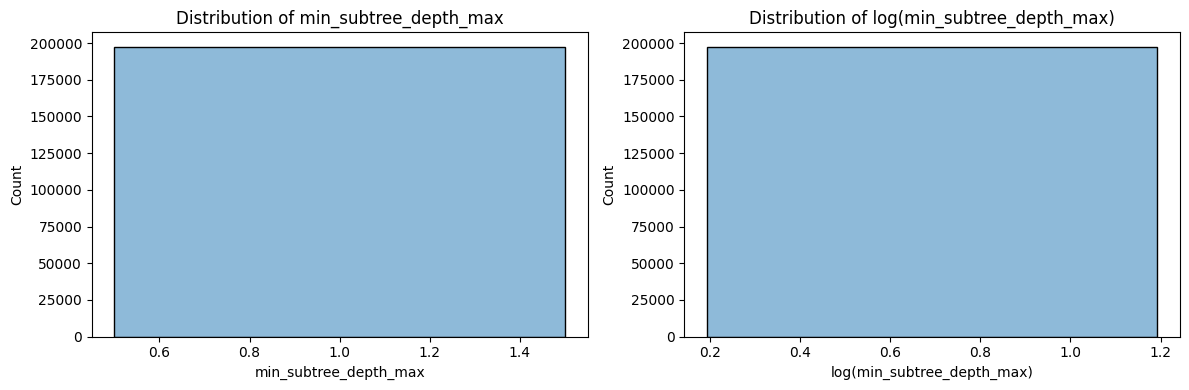


Feature: min_subtree_depth_max
Original skewness: 0.00
Log-transformed skewness: 0.00
Recommendation: Keep original scale
--------------------------------------------------


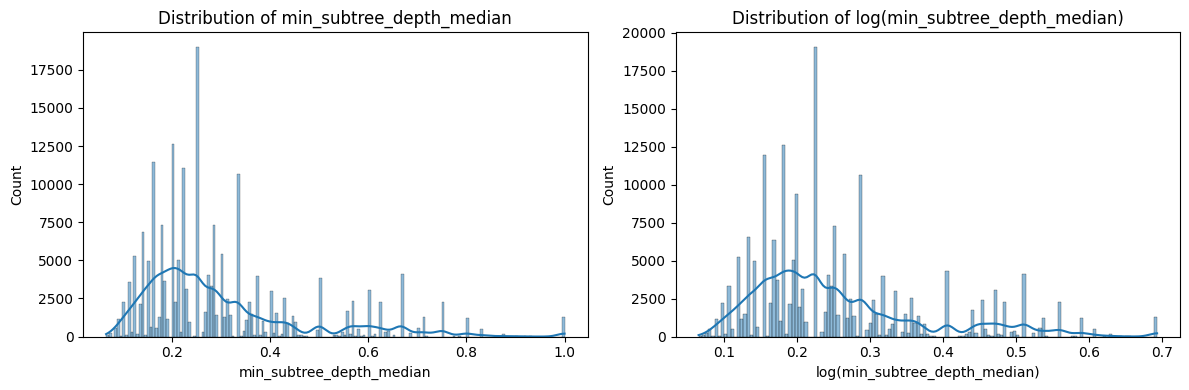


Feature: min_subtree_depth_median
Original skewness: 1.55
Log-transformed skewness: 1.23
Recommendation: Consider log transformation
--------------------------------------------------


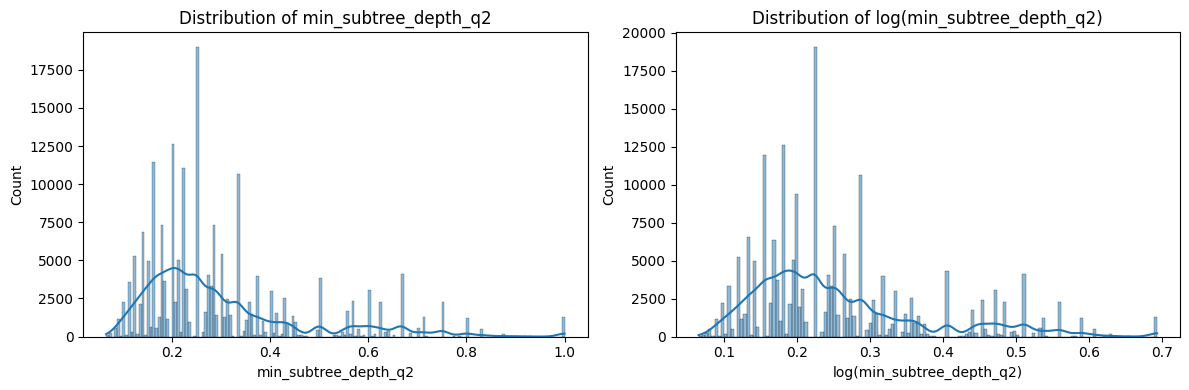


Feature: min_subtree_depth_q2
Original skewness: 1.55
Log-transformed skewness: 1.23
Recommendation: Consider log transformation
--------------------------------------------------


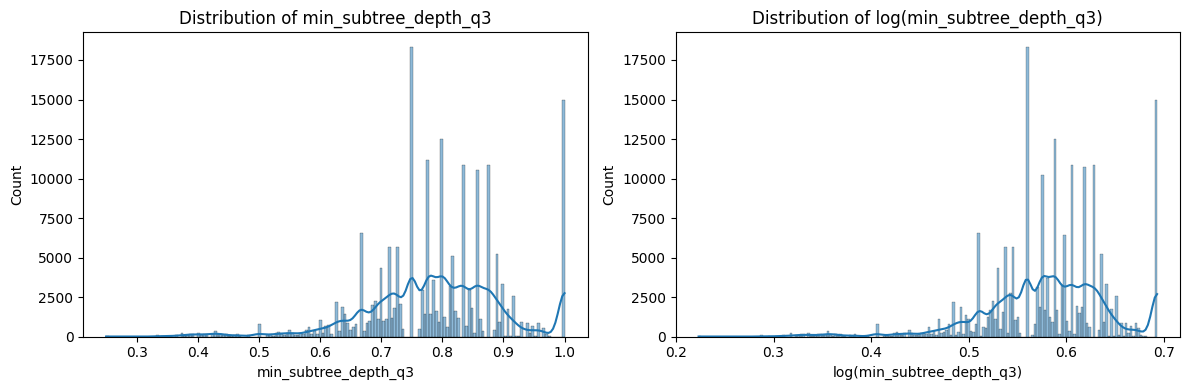


Feature: min_subtree_depth_q3
Original skewness: -0.48
Log-transformed skewness: -0.79
Recommendation: Keep original scale
--------------------------------------------------


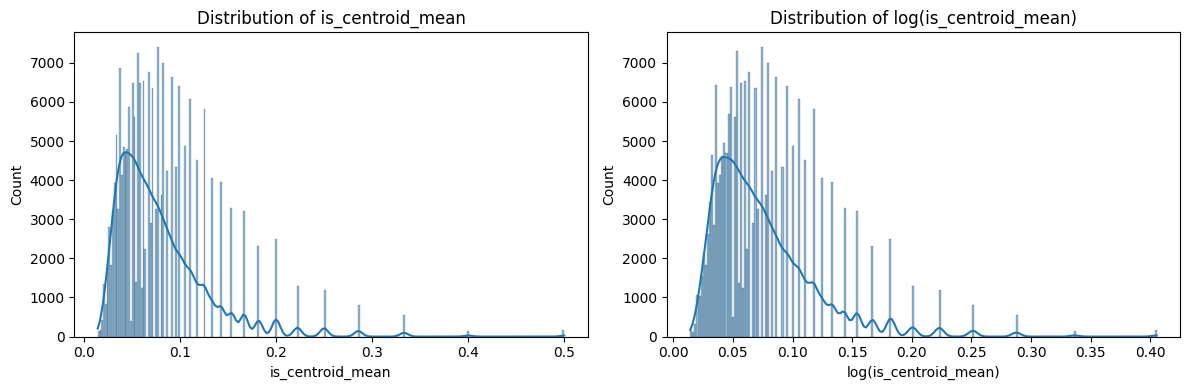


Feature: is_centroid_mean
Original skewness: 2.24
Log-transformed skewness: 1.90
Recommendation: Consider log transformation
--------------------------------------------------


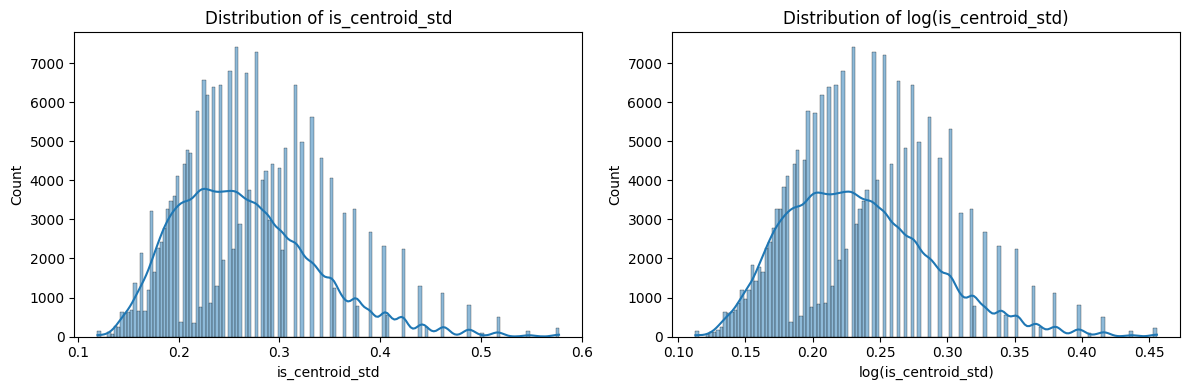


Feature: is_centroid_std
Original skewness: 0.80
Log-transformed skewness: 0.63
Recommendation: Consider log transformation
--------------------------------------------------


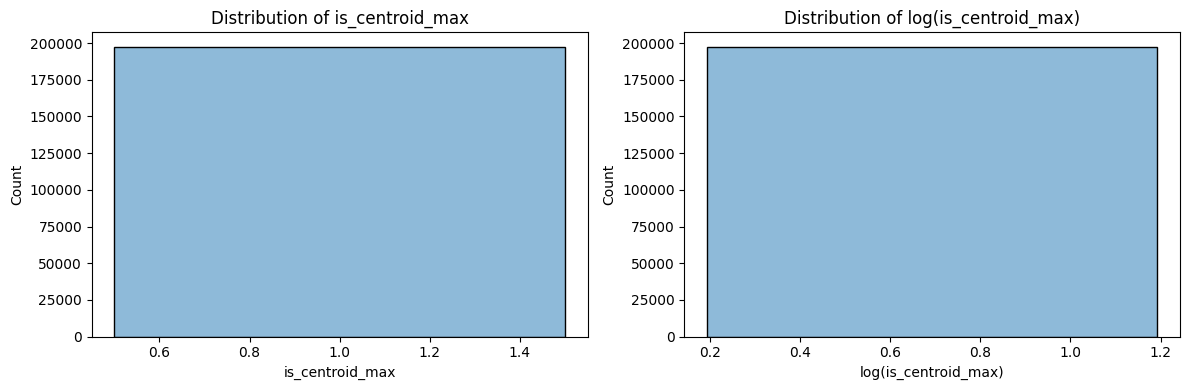


Feature: is_centroid_max
Original skewness: 0.00
Log-transformed skewness: 0.00
Recommendation: Keep original scale
--------------------------------------------------


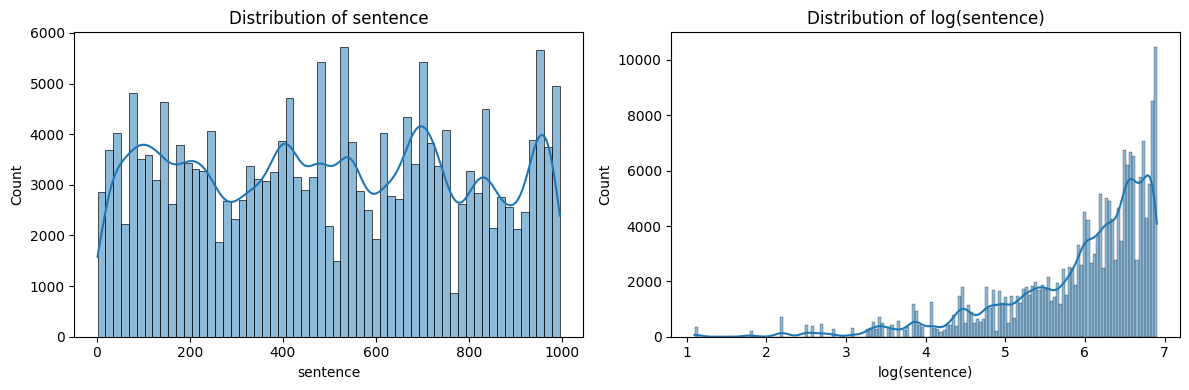


Feature: sentence
Original skewness: 0.02
Log-transformed skewness: -1.57
Recommendation: Keep original scale
--------------------------------------------------


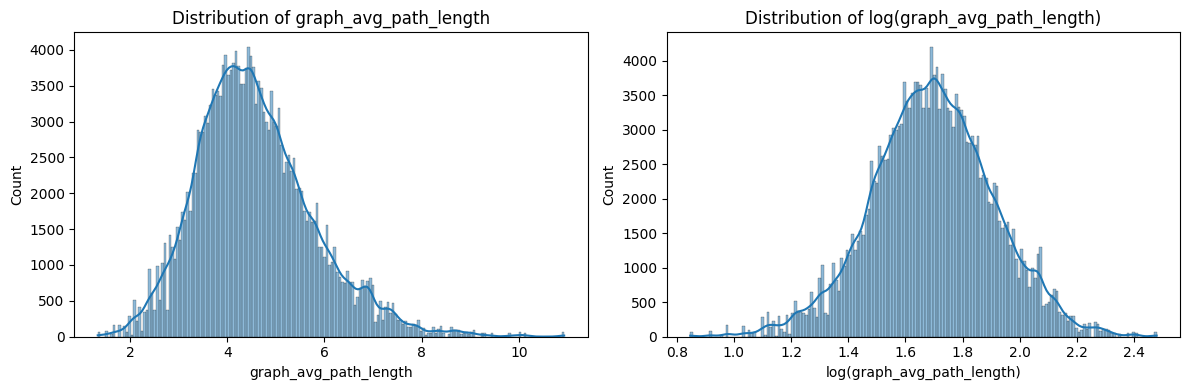


Feature: graph_avg_path_length
Original skewness: 0.69
Log-transformed skewness: -0.04
Recommendation: Consider log transformation
--------------------------------------------------


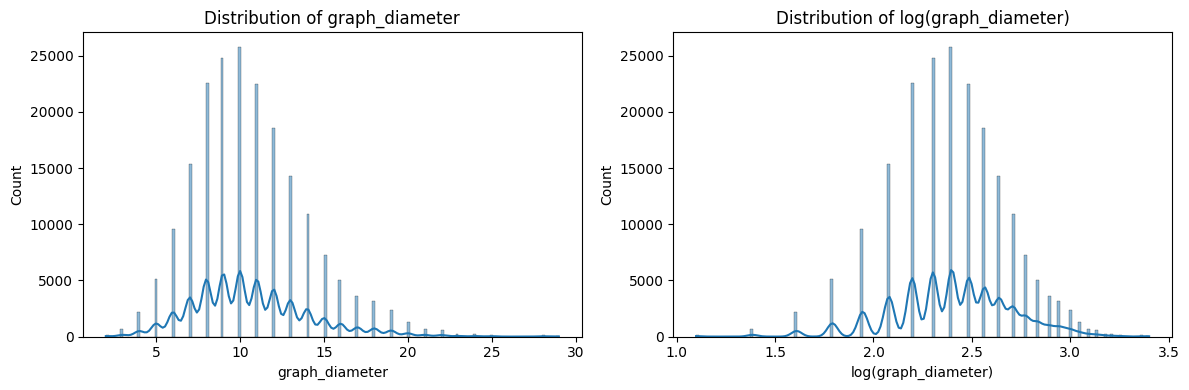


Feature: graph_diameter
Original skewness: 0.79
Log-transformed skewness: -0.25
Recommendation: Consider log transformation
--------------------------------------------------


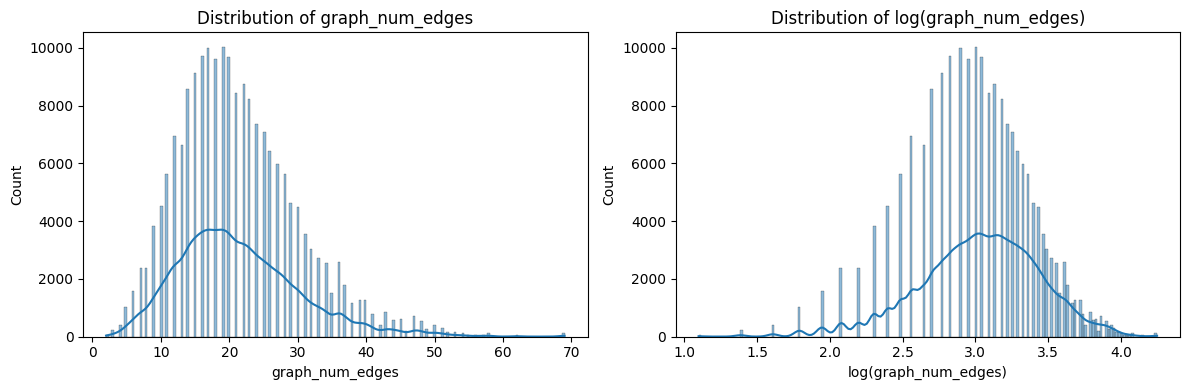


Feature: graph_num_edges
Original skewness: 0.88
Log-transformed skewness: -0.43
Recommendation: Consider log transformation
--------------------------------------------------


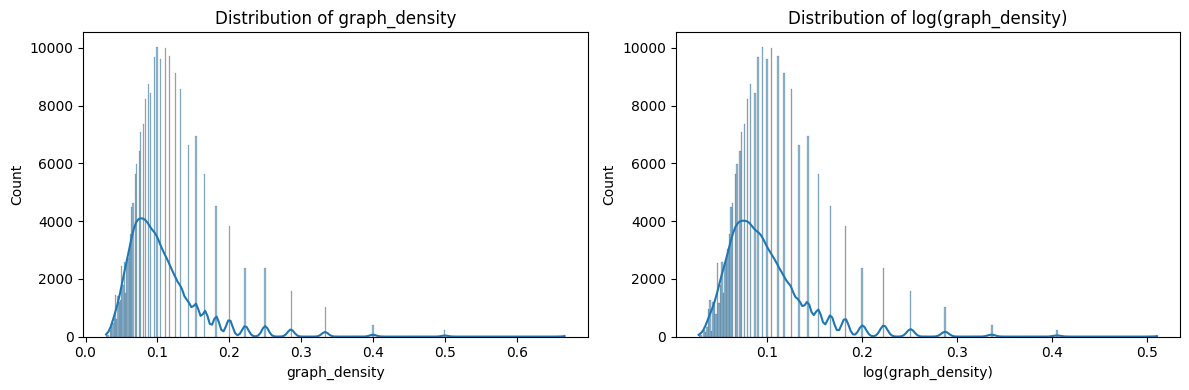


Feature: graph_density
Original skewness: 2.50
Log-transformed skewness: 2.07
Recommendation: Consider log transformation
--------------------------------------------------


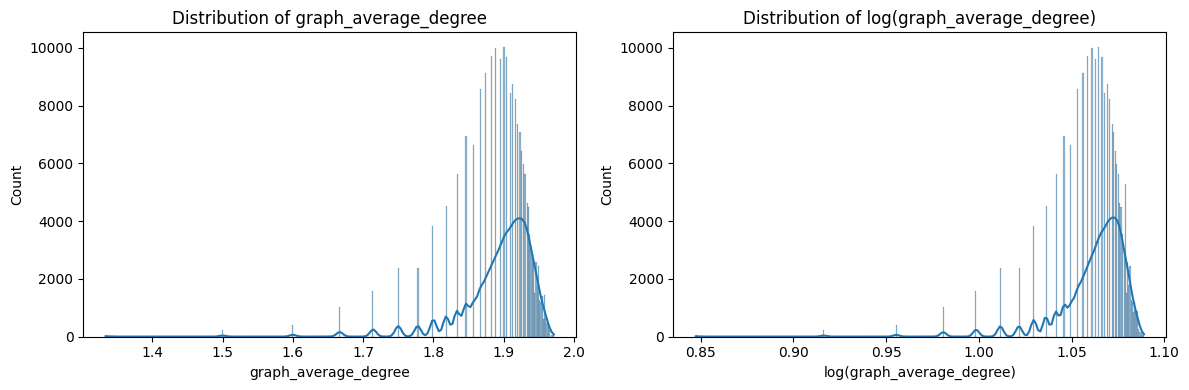


Feature: graph_average_degree
Original skewness: -2.50
Log-transformed skewness: -2.74
Recommendation: Keep original scale
--------------------------------------------------

Features that should be log transformed:
- eccentricity_mean
- eccentricity_std
- eccentricity_median
- eccentricity_q2
- eccentricity_q3
- degree_cent_mean
- degree_cent_std
- harmoni_cent_mean
- harmoni_cent_std
- betweeness_cent_mean
- betweeness_cent_std
- page_cent_mean
- page_cent_std
- eigen_cent_mean
- eigen_cent_std
- closeness_cent_std
- katz_cent_mean
- katz_cent_std
- information_cent_std
- load_centrality_mean
- load_centrality_std
- subgraph_cent_mean
- subgraph_cent_std
- subgraph_cent_median
- subgraph_cent_q2
- subgraph_cent_q3
- comm_betweenness_mean
- comm_betweenness_std
- comm_betweenness_q3
- comm_betweenness_iqr
- current_flow_closeness_std
- current_flow_betweenness_mean
- current_flow_betweenness_std
- second_order_cent_mean
- second_order_cent_std
- second_order_cent_median
- second_orde

In [10]:
# Initialize list to store features that should be log transformed
features_to_log_transform = []

# Plot distributions and identify features that benefit from log transformation
for col in numeric_cols:
    if col not in ['is_root', 'node_number', 'number_of_nodes', 'id']:  # Skip categorical/ID columns
        
        # Check if column has all positive values
        try:
            if (train_data[col] > 0).all():
                plot_distribution(train_data, col)
                
                # Calculate skewness before and after log transform
                original_skew = train_data[col].skew()
                log_skew = np.log1p(train_data[col]).skew()
                
                print(f"\nFeature: {col}")
                print(f"Original skewness: {original_skew:.2f}")
                print(f"Log-transformed skewness: {log_skew:.2f}")
                
                # If log transform reduces absolute skewness, add to list
                if abs(log_skew) < abs(original_skew):
                    features_to_log_transform.append(col)
                    print("Recommendation: Consider log transformation")
                else:
                    print("Recommendation: Keep original scale")
                print("-"*50)
        except:
            continue

print("\nFeatures that should be log transformed:")
for feature in features_to_log_transform:
    print(f"- {feature}")


111

In [17]:
a = set(['sentence','is_root','node_number','language','language_group',
'avg_distance_to_all_nodes',
 'avg_distance_to_all_nodes_bucket',
 'avg_distance_to_all_nodes_iqr',
 'avg_distance_to_all_nodes_mean',
 'avg_distance_to_all_nodes_median',
 'avg_distance_to_all_nodes_q1',
 'avg_distance_to_all_nodes_q2',
 'avg_distance_to_all_nodes_q3',
 'avg_distance_to_all_nodes_skew',
 'avg_distance_to_all_nodes_std',
 'avg_distance_to_leaf_nodes',
 'avg_distance_to_leaf_nodes_q2',
 'avg_shortest_path_length',
 'avg_shortest_path_length_bucket',
 'avg_shortest_path_length_iqr',
 'avg_shortest_path_length_q1',
 'avg_shortest_path_length_q2',
 'avg_shortest_path_length_q3',
 'avg_shortest_path_length_std',
 'betweeness_cent',
 'betweeness_cent_bucket',
 'betweeness_cent_iqr',
 'betweeness_cent_mean',
 'betweeness_cent_median',
 'betweeness_cent_q1',
 'betweeness_cent_q2',
 'betweeness_cent_q3',
 'betweeness_cent_skew',
 'closeness_cent',
 'closeness_cent_bucket',
 'closeness_cent_median',
 'closeness_cent_q2',
 'comm_betweenness',
 'comm_betweenness_bucket',
 'comm_betweenness_iqr',
 'comm_betweenness_mean',
 'comm_betweenness_median',
 'comm_betweenness_q1',
 'comm_betweenness_q2',
 'comm_betweenness_q3',
 'comm_betweenness_skew',
 'comm_betweenness_std',
 'current_flow_betweenness',
 'current_flow_betweenness_iqr',
 'current_flow_betweenness_mean',
 'current_flow_betweenness_median',
 'current_flow_betweenness_q1',
 'current_flow_betweenness_q2',
 'current_flow_betweenness_q3',
 'current_flow_betweenness_skew',
 'current_flow_betweenness_std',
 'current_flow_closeness',
 'current_flow_closeness_bucket',
 'current_flow_closeness_iqr',
 'current_flow_closeness_max',
 'current_flow_closeness_mean',
 'current_flow_closeness_median',
 'current_flow_closeness_q1',
 'current_flow_closeness_q2',
 'current_flow_closeness_q3',
 'current_flow_closeness_skew',
 'current_flow_closeness_std',
 'degree_bucket',
 'degree_cent',
 'degree_cent_iqr',
 'degree_cent_mean',
 'degree_cent_q1',
 'degree_cent_q2',
 'degree_cent_q3',
 'degree_cent_skew',
 'degree_cent_std',
 'degree_iqr',
 'degree_max',
 'degree_mean',
 'degree_median',
 'degree_q1',
 'degree_q2',
 'degree_q3',
 'degree_skew',
 'degree_std',
 'distance_to_farthest_leaf',
 'distance_to_farthest_leaf_bucket',
 'distance_to_farthest_leaf_iqr',
 'distance_to_farthest_leaf_max',
 'distance_to_farthest_leaf_median',
 'distance_to_farthest_leaf_q1',
 'distance_to_farthest_leaf_q2',
 'distance_to_farthest_leaf_q3',
 'distance_to_farthest_leaf_skew',
 'distance_to_farthest_leaf_std',
 'distance_to_nearest_leaf_median',
 'distance_to_nearest_leaf_q3',
 'distance_to_nearest_leaf_std',
 'eccentricity',
 'eccentricity_iqr',
 'eccentricity_mean',
 'eccentricity_median',
 'eccentricity_q1',
 'eccentricity_q2',
 'eccentricity_q3',
 'eccentricity_skew',
 'effective_size',
 'effective_size_bucket',
 'effective_size_iqr',
 'effective_size_mean',
 'effective_size_median',
 'effective_size_q1',
 'effective_size_q2',
 'effective_size_q3',
 'effective_size_skew',
 'effective_size_std',
 'eigen_cent_median',
 'eigen_cent_q2',
 'eigen_cent_q3',
 'eigen_cent_skew',
 'eigen_cent_std',
 'graph_average_degree',
 'graph_avg_path_length',
 'graph_num_edges',
 'harmoni_cent',
 'harmoni_cent_bucket',
 'harmoni_cent_q2',
 'information_cent',
 'information_cent_bucket',
 'information_cent_iqr',
 'information_cent_mean',
 'information_cent_median',
 'information_cent_q1',
 'information_cent_q2',
 'information_cent_q3',
 'information_cent_skew',
 'information_cent_std',
 'is_centroid_iqr',
 'is_centroid_mean',
 'is_centroid_median',
 'is_centroid_std',
 'is_leaf_mean',
 'is_leaf_median',
 'is_leaf_q2',
 'is_leaf_q3',
 'katz_cent',
 'katz_cent_bucket',
 'katz_cent_iqr',
 'katz_cent_mean',
 'katz_cent_median',
 'katz_cent_q1',
 'katz_cent_q2',
 'katz_cent_q3',
 'katz_cent_skew',
 'katz_cent_std',
 'language_Arabic',
 'language_Chinese',
 'language_Finnish',
 'language_Hindi',
 'language_Japanese',
 'language_Korean',
 'language_Turkish',
 'language_group_Austronesian',
 'language_group_Kra-Dai',
 'language_group_Semitic',
 'largest_component_removed_bucket',
 'largest_component_removed_iqr',
 'largest_component_removed_max',
 'largest_component_removed_mean',
 'largest_component_removed_median',
 'largest_component_removed_q2',
 'largest_component_removed_q3',
 'largest_component_removed_std',
 'leaf_density_median',
 'load_centrality',
 'load_centrality_iqr',
 'load_centrality_mean',
 'load_centrality_median',
 'load_centrality_q1',
 'load_centrality_q2',
 'load_centrality_q3',
 'load_centrality_skew',
 'load_centrality_std',
 'max_distance_to_any_node_bucket',
 'max_distance_to_any_node_max',
 'max_distance_to_any_node_mean',
 'max_distance_to_any_node_median',
 'max_distance_to_any_node_q1',
 'max_distance_to_any_node_skew',
 'max_distance_to_any_node_std',
 'max_height',
 'max_height_bucket',
 'max_height_iqr',
 'max_height_max',
 'max_height_mean',
 'max_height_median',
 'max_height_q2',
 'max_height_q3',
 'max_height_skew',
 'max_height_std',
 'max_subtree_depth',
 'max_subtree_depth_bucket',
 'max_subtree_depth_iqr',
 'max_subtree_depth_mean',
 'max_subtree_depth_median',
 'max_subtree_depth_q1',
 'max_subtree_depth_q2',
 'max_subtree_depth_q3',
 'max_subtree_depth_skew',
 'max_subtree_depth_std',
 'max_subtree_size',
 'max_subtree_size_iqr',
 'max_subtree_size_mean',
 'max_subtree_size_median',
 'max_subtree_size_q1',
 'max_subtree_size_skew',
 'max_subtree_size_std',
 'min_subtree_depth',
 'min_subtree_depth_median',
 'min_subtree_depth_q1',
 'min_subtree_depth_q2',
 'min_subtree_depth_q3',
 'min_subtree_depth_skew',
 'min_subtree_size',
 'min_subtree_size_iqr',
 'min_subtree_size_mean',
 'min_subtree_size_median',
 'min_subtree_size_q3',
 'min_subtree_size_skew',
 'neighbor_degree_max_q2',
 'neighbor_degree_max_skew',
 'neighbor_degree_mean_q2',
 'neighbor_degree_mean_skew',
 'neighbor_degree_min_max',
 'neighbor_degree_min_median',
 'neighbor_degree_min_skew',
 'node_step_removal',
 'node_step_removal_bucket',
 'node_step_removal_iqr',
 'node_step_removal_q1',
 'node_step_removal_q2',
 'node_step_removal_skew',
 'node_step_removal_std',
 'num_leaf_neighbors_iqr',
 'num_leaf_neighbors_median',
 'num_leaf_neighbors_std',
 'num_subtrees',
 'num_subtrees_bucket',
 'num_subtrees_iqr',
 'num_subtrees_max',
 'num_subtrees_mean',
 'num_subtrees_median',
 'num_subtrees_q1',
 'num_subtrees_q2',
 'num_subtrees_q3',
 'num_subtrees_removed',
 'num_subtrees_removed_bucket',
 'num_subtrees_removed_iqr',
 'num_subtrees_removed_max',
 'num_subtrees_removed_mean',
 'num_subtrees_removed_median',
 'num_subtrees_removed_q1',
 'num_subtrees_removed_q2',
 'num_subtrees_skew',
 'num_subtrees_std',
 'page_cent',
 'page_cent_iqr',
 'page_cent_mean',
 'page_cent_median',
 'page_cent_q1',
 'page_cent_q2',
 'page_cent_q3',
 'page_cent_skew',
 'page_cent_std',
 'participation_diameter_max',
 'participation_diameter_q1',
 'participation_diameter_q2',
 'radiality',
 'radiality_q2',
 'second_order_cent',
 'second_order_cent_bucket',
 'second_order_cent_iqr',
 'second_order_cent_mean',
 'second_order_cent_median',
 'second_order_cent_q1',
 'second_order_cent_q2',
 'second_order_cent_q3',
 'second_order_cent_skew',
 'second_order_cent_std',
 'std_distance_to_leaf_nodes_max',
 'std_distance_to_leaf_nodes_median',
 'std_distance_to_leaf_nodes_q2',
 'std_distance_to_leaf_nodes_skew',
 'subgraph_cent',
 'subgraph_cent_iqr',
 'subgraph_cent_mean',
 'subgraph_cent_median',
 'subgraph_cent_q1',
 'subgraph_cent_q2',
 'subgraph_cent_q3',
 'subgraph_cent_skew',
 'subgraph_cent_std',
 'subtree_depth_balance',
 'subtree_depth_balance_bucket',
 'subtree_depth_balance_max',
 'subtree_depth_balance_q2',
 'subtree_depth_balance_q3',
 'subtree_depth_balance_skew',
 'subtree_depth_std',
 'subtree_depth_std_iqr',
 'subtree_depth_std_mean',
 'subtree_depth_std_median',
 'subtree_depth_std_q1',
 'subtree_depth_std_q2',
 'subtree_depth_std_skew',
 'subtree_depth_std_std',
 'subtree_size_balance',
 'subtree_size_balance_bucket',
 'subtree_size_balance_max',
 'subtree_size_balance_mean',
 'subtree_size_balance_q2',
 'subtree_size_balance_q3',
 'subtree_size_std_bucket',
 'subtree_size_std_iqr',
 'subtree_size_std_max',
 'subtree_size_std_mean',
 'subtree_size_std_median',
 'subtree_size_std_q1',
 'subtree_size_std_q2',
 'subtree_size_std_skew',
 'subtree_size_std_std',
 'subtree_size_variance',
 'subtree_size_variance_bucket',
 'subtree_size_variance_iqr',
 'subtree_size_variance_max',
 'subtree_size_variance_median',
 'subtree_size_variance_q1',
 'subtree_size_variance_q2',
 'subtree_size_variance_q3',
 'subtree_size_variance_skew',
 'vote_rank_score_mean',
 'vote_rank_score_q2',
 'vote_rank_score_q3',
 'vote_rank_score_std',
 'avg_distance_to_all_nodes_max',
'avg_distance_to_all_nodes_min',
'avg_distance_to_leaf_nodes_max',
'avg_distance_to_leaf_nodes_min',
'avg_shortest_path_length_max',
'avg_shortest_path_length_min',
'betweeness_cent_max',
'betweeness_cent_min',
'closeness_cent_max',
'closeness_cent_min',
'comm_betweenness_max',
'comm_betweenness_min',
'current_flow_betweenness_max',
'current_flow_betweenness_min',
'current_flow_closeness_min',
'degree_cent_max',
'degree_cent_min',
'degree_min',
'distance_to_farthest_leaf_min',
'distance_to_nearest_leaf_max',
'distance_to_nearest_leaf_min',
'eccentricity_max',
'eccentricity_min',
'effective_size_max',
'effective_size_min',
'eigen_cent_max',
'eigen_cent_min',
'harmoni_cent_max',
'harmoni_cent_min',
'information_cent_max',
'information_cent_min',
'is_centroid',
'is_centroid_bucket',
'is_centroid_max',
'is_centroid_min',
'is_centroid_q1',
'is_centroid_q2',
'is_leaf',
'is_leaf_iqr',
'is_leaf_max',
'is_leaf_min',
'is_leaf_q1',
'katz_cent_min',
'language_English',
'language_German',
'largest_component_removed_min',
'leaf_density_max',
'leaf_density_min',
'load_centrality_max',
'load_centrality_min',
'max_distance_to_any_node_min',
'max_height_min',
'max_subtree_depth_max',
'max_subtree_depth_min',
'max_subtree_size_max',
'max_subtree_size_min',
'min_subtree_depth_max',
'min_subtree_depth_min',
'min_subtree_size_max',
'min_subtree_size_min',
'neighbor_degree_max_max',
'neighbor_degree_max_min',
'neighbor_degree_mean_max',
'neighbor_degree_mean_min',
'neighbor_degree_min_min',
'node_step_removal_max',
'node_step_removal_min',
'num_leaf_neighbors_max',
'num_leaf_neighbors_min',
'num_leaf_neighbors_q1',
'num_leaf_neighbors_q2',
'num_subtrees_min',
'num_subtrees_removed_min',
'page_cent_max',
'page_cent_min',
'participation_diameter_min',
'participation_diameter_q3',
'radiality_max',
'radiality_min',
'second_order_cent_max',
'second_order_cent_min',
'std_distance_to_leaf_nodes_min',
'subgraph_cent_max',
'subgraph_cent_min',
'subtree_depth_balance_min',
'subtree_depth_std_max',
'subtree_depth_std_min',
'subtree_size_balance_min',
'subtree_size_std_min',
'subtree_size_variance_min',
'vote_rank_score_max',
'vote_rank_score_min',
'vote_rank_score_q1'])

In [18]:
b = set(['sentence','node_number','language','language_group','id',
'avg_distance_to_all_nodes',
 'avg_distance_to_all_nodes_bucket',
 'avg_distance_to_all_nodes_iqr',
 'avg_distance_to_all_nodes_mean',
 'avg_distance_to_all_nodes_median',
 'avg_distance_to_all_nodes_q1',
 'avg_distance_to_all_nodes_q2',
 'avg_distance_to_all_nodes_q3',
 'avg_distance_to_all_nodes_skew',
 'avg_distance_to_all_nodes_std',
 'avg_distance_to_leaf_nodes',
 'avg_distance_to_leaf_nodes_q2',
 'avg_shortest_path_length',
 'avg_shortest_path_length_bucket',
 'avg_shortest_path_length_iqr',
 'avg_shortest_path_length_q1',
 'avg_shortest_path_length_q2',
 'avg_shortest_path_length_q3',
 'avg_shortest_path_length_std',
 'betweeness_cent',
 'betweeness_cent_bucket',
 'betweeness_cent_iqr',
 'betweeness_cent_mean',
 'betweeness_cent_median',
 'betweeness_cent_q1',
 'betweeness_cent_q2',
 'betweeness_cent_q3',
 'betweeness_cent_skew',
 'closeness_cent',
 'closeness_cent_bucket',
 'closeness_cent_median',
 'closeness_cent_q2',
 'comm_betweenness',
 'comm_betweenness_bucket',
 'comm_betweenness_iqr',
 'comm_betweenness_mean',
 'comm_betweenness_median',
 'comm_betweenness_q1',
 'comm_betweenness_q2',
 'comm_betweenness_q3',
 'comm_betweenness_skew',
 'comm_betweenness_std',
 'current_flow_betweenness',
 'current_flow_betweenness_iqr',
 'current_flow_betweenness_mean',
 'current_flow_betweenness_median',
 'current_flow_betweenness_q1',
 'current_flow_betweenness_q2',
 'current_flow_betweenness_q3',
 'current_flow_betweenness_skew',
 'current_flow_betweenness_std',
 'current_flow_closeness',
 'current_flow_closeness_bucket',
 'current_flow_closeness_iqr',
 'current_flow_closeness_max',
 'current_flow_closeness_mean',
 'current_flow_closeness_median',
 'current_flow_closeness_q1',
 'current_flow_closeness_q2',
 'current_flow_closeness_q3',
 'current_flow_closeness_skew',
 'current_flow_closeness_std',
 'degree_bucket',
 'degree_cent',
 'degree_cent_iqr',
 'degree_cent_mean',
 'degree_cent_q1',
 'degree_cent_q2',
 'degree_cent_q3',
 'degree_cent_skew',
 'degree_cent_std',
 'degree_iqr',
 'degree_max',
 'degree_mean',
 'degree_median',
 'degree_q1',
 'degree_q2',
 'degree_q3',
 'degree_skew',
 'degree_std',
 'distance_to_farthest_leaf',
 'distance_to_farthest_leaf_bucket',
 'distance_to_farthest_leaf_iqr',
 'distance_to_farthest_leaf_max',
 'distance_to_farthest_leaf_median',
 'distance_to_farthest_leaf_q1',
 'distance_to_farthest_leaf_q2',
 'distance_to_farthest_leaf_q3',
 'distance_to_farthest_leaf_skew',
 'distance_to_farthest_leaf_std',
 'distance_to_nearest_leaf_median',
 'distance_to_nearest_leaf_q3',
 'distance_to_nearest_leaf_std',
 'eccentricity',
 'eccentricity_iqr',
 'eccentricity_mean',
 'eccentricity_median',
 'eccentricity_q1',
 'eccentricity_q2',
 'eccentricity_q3',
 'eccentricity_skew',
 'effective_size',
 'effective_size_bucket',
 'effective_size_iqr',
 'effective_size_mean',
 'effective_size_median',
 'effective_size_q1',
 'effective_size_q2',
 'effective_size_q3',
 'effective_size_skew',
 'effective_size_std',
 'eigen_cent_median',
 'eigen_cent_q2',
 'eigen_cent_q3',
 'eigen_cent_skew',
 'eigen_cent_std',
 'graph_average_degree',
 'graph_avg_path_length',
 'graph_num_edges',
 'harmoni_cent',
 'harmoni_cent_bucket',
 'harmoni_cent_q2',
 'information_cent',
 'information_cent_bucket',
 'information_cent_iqr',
 'information_cent_mean',
 'information_cent_median',
 'information_cent_q1',
 'information_cent_q2',
 'information_cent_q3',
 'information_cent_skew',
 'information_cent_std',
 'is_centroid_iqr',
 'is_centroid_mean',
 'is_centroid_median',
 'is_centroid_std',
 'is_leaf_mean',
 'is_leaf_median',
 'is_leaf_q2',
 'is_leaf_q3',
 'katz_cent',
 'katz_cent_bucket',
 'katz_cent_iqr',
 'katz_cent_mean',
 'katz_cent_median',
 'katz_cent_q1',
 'katz_cent_q2',
 'katz_cent_q3',
 'katz_cent_skew',
 'katz_cent_std',
 'language_Arabic',
 'language_Chinese',
 'language_Finnish',
 'language_Hindi',
 'language_Japanese',
 'language_Korean',
 'language_Turkish',
 'language_group_Austronesian',
 'language_group_Kra-Dai',
 'language_group_Semitic',
 'largest_component_removed_bucket',
 'largest_component_removed_iqr',
 'largest_component_removed_max',
 'largest_component_removed_mean',
 'largest_component_removed_median',
 'largest_component_removed_q2',
 'largest_component_removed_q3',
 'largest_component_removed_std',
 'leaf_density_median',
 'load_centrality',
 'load_centrality_iqr',
 'load_centrality_mean',
 'load_centrality_median',
 'load_centrality_q1',
 'load_centrality_q2',
 'load_centrality_q3',
 'load_centrality_skew',
 'load_centrality_std',
 'max_distance_to_any_node_bucket',
 'max_distance_to_any_node_max',
 'max_distance_to_any_node_mean',
 'max_distance_to_any_node_median',
 'max_distance_to_any_node_q1',
 'max_distance_to_any_node_skew',
 'max_distance_to_any_node_std',
 'max_height',
 'max_height_bucket',
 'max_height_iqr',
 'max_height_max',
 'max_height_mean',
 'max_height_median',
 'max_height_q2',
 'max_height_q3',
 'max_height_skew',
 'max_height_std',
 'max_subtree_depth',
 'max_subtree_depth_bucket',
 'max_subtree_depth_iqr',
 'max_subtree_depth_mean',
 'max_subtree_depth_median',
 'max_subtree_depth_q1',
 'max_subtree_depth_q2',
 'max_subtree_depth_q3',
 'max_subtree_depth_skew',
 'max_subtree_depth_std',
 'max_subtree_size',
 'max_subtree_size_iqr',
 'max_subtree_size_mean',
 'max_subtree_size_median',
 'max_subtree_size_q1',
 'max_subtree_size_skew',
 'max_subtree_size_std',
 'min_subtree_depth',
 'min_subtree_depth_median',
 'min_subtree_depth_q1',
 'min_subtree_depth_q2',
 'min_subtree_depth_q3',
 'min_subtree_depth_skew',
 'min_subtree_size',
 'min_subtree_size_iqr',
 'min_subtree_size_mean',
 'min_subtree_size_median',
 'min_subtree_size_q3',
 'min_subtree_size_skew',
 'neighbor_degree_max_q2',
 'neighbor_degree_max_skew',
 'neighbor_degree_mean_q2',
 'neighbor_degree_mean_skew',
 'neighbor_degree_min_max',
 'neighbor_degree_min_median',
 'neighbor_degree_min_skew',
 'node_step_removal',
 'node_step_removal_bucket',
 'node_step_removal_iqr',
 'node_step_removal_q1',
 'node_step_removal_q2',
 'node_step_removal_skew',
 'node_step_removal_std',
 'num_leaf_neighbors_iqr',
 'num_leaf_neighbors_median',
 'num_leaf_neighbors_std',
 'num_subtrees',
 'num_subtrees_bucket',
 'num_subtrees_iqr',
 'num_subtrees_max',
 'num_subtrees_mean',
 'num_subtrees_median',
 'num_subtrees_q1',
 'num_subtrees_q2',
 'num_subtrees_q3',
 'num_subtrees_removed',
 'num_subtrees_removed_bucket',
 'num_subtrees_removed_iqr',
 'num_subtrees_removed_max',
 'num_subtrees_removed_mean',
 'num_subtrees_removed_median',
 'num_subtrees_removed_q1',
 'num_subtrees_removed_q2',
 'num_subtrees_skew',
 'num_subtrees_std',
 'page_cent',
 'page_cent_iqr',
 'page_cent_mean',
 'page_cent_median',
 'page_cent_q1',
 'page_cent_q2',
 'page_cent_q3',
 'page_cent_skew',
 'page_cent_std',
 'participation_diameter_max',
 'participation_diameter_q1',
 'participation_diameter_q2',
 'radiality',
 'radiality_q2',
 'second_order_cent',
 'second_order_cent_bucket',
 'second_order_cent_iqr',
 'second_order_cent_mean',
 'second_order_cent_median',
 'second_order_cent_q1',
 'second_order_cent_q2',
 'second_order_cent_q3',
 'second_order_cent_skew',
 'second_order_cent_std',
 'std_distance_to_leaf_nodes_max',
 'std_distance_to_leaf_nodes_median',
 'std_distance_to_leaf_nodes_q2',
 'std_distance_to_leaf_nodes_skew',
 'subgraph_cent',
 'subgraph_cent_iqr',
 'subgraph_cent_mean',
 'subgraph_cent_median',
 'subgraph_cent_q1',
 'subgraph_cent_q2',
 'subgraph_cent_q3',
 'subgraph_cent_skew',
 'subgraph_cent_std',
 'subtree_depth_balance',
 'subtree_depth_balance_bucket',
 'subtree_depth_balance_max',
 'subtree_depth_balance_q2',
 'subtree_depth_balance_q3',
 'subtree_depth_balance_skew',
 'subtree_depth_std',
 'subtree_depth_std_iqr',
 'subtree_depth_std_mean',
 'subtree_depth_std_median',
 'subtree_depth_std_q1',
 'subtree_depth_std_q2',
 'subtree_depth_std_skew',
 'subtree_depth_std_std',
 'subtree_size_balance',
 'subtree_size_balance_bucket',
 'subtree_size_balance_max',
 'subtree_size_balance_mean',
 'subtree_size_balance_q2',
 'subtree_size_balance_q3',
 'subtree_size_std_bucket',
 'subtree_size_std_iqr',
 'subtree_size_std_max',
 'subtree_size_std_mean',
 'subtree_size_std_median',
 'subtree_size_std_q1',
 'subtree_size_std_q2',
 'subtree_size_std_skew',
 'subtree_size_std_std',
 'subtree_size_variance',
 'subtree_size_variance_bucket',
 'subtree_size_variance_iqr',
 'subtree_size_variance_max',
 'subtree_size_variance_median',
 'subtree_size_variance_q1',
 'subtree_size_variance_q2',
 'subtree_size_variance_q3',
 'subtree_size_variance_skew',
 'vote_rank_score_mean',
 'vote_rank_score_q2',
 'vote_rank_score_q3',
 'vote_rank_score_std',
 'avg_distance_to_all_nodes_max',
'avg_distance_to_all_nodes_min',
'avg_distance_to_leaf_nodes_max',
'avg_distance_to_leaf_nodes_min',
'avg_shortest_path_length_max',
'avg_shortest_path_length_min',
'betweeness_cent_max',
'betweeness_cent_min',
'closeness_cent_max',
'closeness_cent_min',
'comm_betweenness_max',
'comm_betweenness_min',
'current_flow_betweenness_max',
'current_flow_betweenness_min',
'current_flow_closeness_min',
'degree_cent_max',
'degree_cent_min',
'degree_min',
'distance_to_farthest_leaf_min',
'distance_to_nearest_leaf_max',
'distance_to_nearest_leaf_min',
'eccentricity_max',
'eccentricity_min',
'effective_size_max',
'effective_size_min',
'eigen_cent_max',
'eigen_cent_min',
'harmoni_cent_max',
'harmoni_cent_min',
'information_cent_max',
'information_cent_min',
'is_centroid',
'is_centroid_bucket',
'is_centroid_max',
'is_centroid_min',
'is_centroid_q1',
'is_centroid_q2',
'is_leaf',
'is_leaf_iqr',
'is_leaf_max',
'is_leaf_min',
'is_leaf_q1',
'katz_cent_min',
'language_English',
'language_German',
'largest_component_removed_min',
'leaf_density_max',
'leaf_density_min',
'load_centrality_max',
'load_centrality_min',
'max_distance_to_any_node_min',
'max_height_min',
'max_subtree_depth_max',
'max_subtree_depth_min',
'max_subtree_size_max',
'max_subtree_size_min',
'min_subtree_depth_max',
'min_subtree_depth_min',
'min_subtree_size_max',
'min_subtree_size_min',
'neighbor_degree_max_max',
'neighbor_degree_max_min',
'neighbor_degree_mean_max',
'neighbor_degree_mean_min',
'neighbor_degree_min_min',
'node_step_removal_max',
'node_step_removal_min',
'num_leaf_neighbors_max',
'num_leaf_neighbors_min',
'num_leaf_neighbors_q1',
'num_leaf_neighbors_q2',
'num_subtrees_min',
'num_subtrees_removed_min',
'page_cent_max',
'page_cent_min',
'participation_diameter_min',
'participation_diameter_q3',
'radiality_max',
'radiality_min',
'second_order_cent_max',
'second_order_cent_min',
'std_distance_to_leaf_nodes_min',
'subgraph_cent_max',
'subgraph_cent_min',
'subtree_depth_balance_min',
'subtree_depth_std_max',
'subtree_depth_std_min',
'subtree_size_balance_min',
'subtree_size_std_min',
'subtree_size_variance_min',
'vote_rank_score_max',
'vote_rank_score_min',
'vote_rank_score_q1']
)

In [19]:
b.difference(a)

{'id'}

In [20]:
import joblib

# Load the model using joblib
model = joblib.load('/Users/nishantsushmakar/Documents/UPC/UPC-ML-Challenge/resources/lgbm_logloss/lgbm_logloss_7.pkl')

# Get feature names used in the model
feature_names = model.feature_name_

print("Features used in the model:")
print(feature_names)



Features used in the model:
['eigen_cent', 'degree', 'vote_rank_score', 'largest_component_removed', 'participation_diameter', 'neighbor_degree_mean', 'neighbor_degree_max', 'neighbor_degree_min', 'num_leaf_neighbors', 'max_distance_to_any_node', 'std_distance_to_leaf_nodes', 'distance_to_nearest_leaf', 'subtree_size_std', 'leaf_density', 'eccentricity_bucket', 'degree_cent_bucket', 'page_cent_bucket', 'eigen_cent_bucket', 'load_centrality_bucket', 'subgraph_cent_bucket', 'current_flow_betweenness_bucket', 'vote_rank_score_bucket', 'is_leaf_bucket', 'participation_diameter_bucket', 'radiality_bucket', 'neighbor_degree_mean_bucket', 'neighbor_degree_max_bucket', 'neighbor_degree_min_bucket', 'num_leaf_neighbors_bucket', 'avg_distance_to_leaf_nodes_bucket', 'std_distance_to_leaf_nodes_bucket', 'distance_to_nearest_leaf_bucket', 'max_subtree_size_bucket', 'min_subtree_size_bucket', 'min_subtree_depth_bucket', 'subtree_depth_std_bucket', 'leaf_density_bucket', 'eccentricity_std', 'degree_c

In [21]:
c = set(feature_names)

In [22]:
b.intersection(c)

set()

In [23]:
a.intersection(c)

set()

In [25]:
if 'kfold' in c:
    print('kfold is in the model')

kfold is in the model



Top 20 Most Important Features (by split importance):
---------------------------------------------------
vote_rank_score: 4490
eigen_cent: 3074
std_distance_to_leaf_nodes: 2270
largest_component_removed: 2040
neighbor_degree_mean: 1666
subtree_size_std: 1616
neighbor_degree_max_std: 1228
vote_rank_score_skew: 1121
leaf_density_std: 1090
std_distance_to_leaf_nodes_std: 1016
min_subtree_size_std: 967
radiality_q3: 963
radiality_iqr: 955
subtree_size_variance_std: 952
radiality_std: 951
eigen_cent_iqr: 946
std_distance_to_leaf_nodes_q1: 901
max_distance_to_any_node: 886
leaf_density_mean: 865
std_distance_to_leaf_nodes_iqr: 864


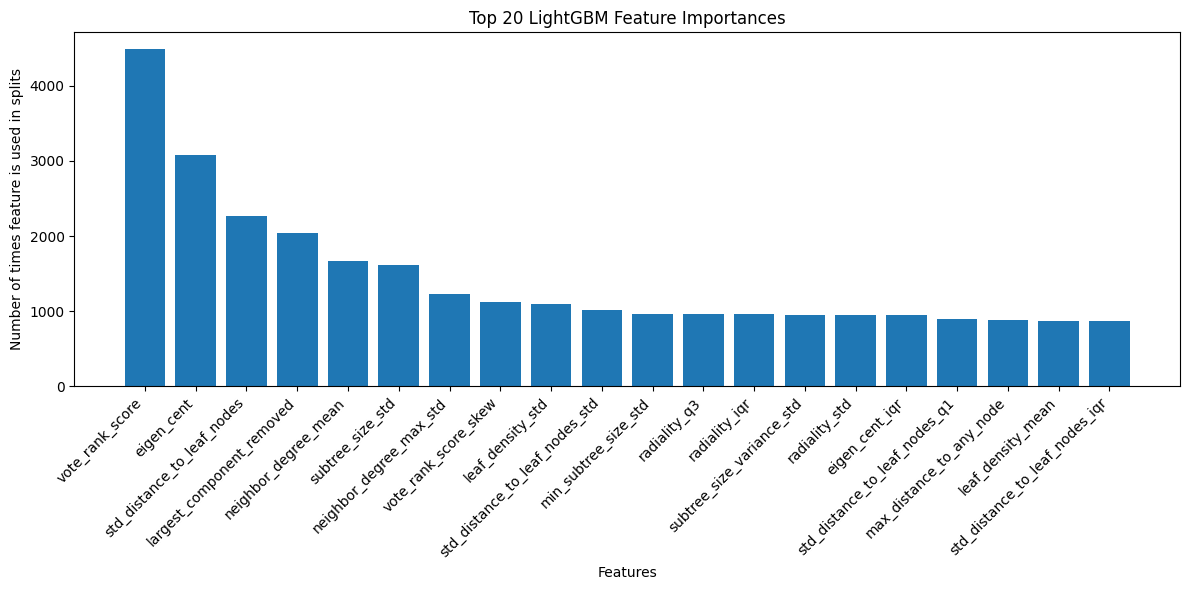


Relative Feature Importance (%):
--------------------------------
vote_rank_score: 4.59%
eigen_cent: 3.14%
std_distance_to_leaf_nodes: 2.32%
largest_component_removed: 2.08%
neighbor_degree_mean: 1.70%
subtree_size_std: 1.65%
neighbor_degree_max_std: 1.26%
vote_rank_score_skew: 1.15%
leaf_density_std: 1.11%
std_distance_to_leaf_nodes_std: 1.04%
min_subtree_size_std: 0.99%
radiality_q3: 0.98%
radiality_iqr: 0.98%
subtree_size_variance_std: 0.97%
radiality_std: 0.97%
eigen_cent_iqr: 0.97%
std_distance_to_leaf_nodes_q1: 0.92%
max_distance_to_any_node: 0.91%
leaf_density_mean: 0.88%
std_distance_to_leaf_nodes_iqr: 0.88%


/var/folders/51/y2_6x05j1hjgtnzwshx1dgt80000gn/T/ipykernel_51312/1256309988.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_features['importance_percentage'] = (top_20_features['importance'] /


In [31]:
# Get feature importances from the LightGBM model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance scores
model = joblib.load('/Users/nishantsushmakar/Documents/UPC/UPC-ML-Challenge/resources/lgbm_logloss/lgbm_logloss_7.pkl')
# Get feature names and importances from the model
feature_names = model.feature_name_
feature_importances = model.feature_importances_

# Create DataFrame with feature names and importance scores
feature_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Sort features by importance in descending order
feature_imp = feature_imp.sort_values('importance', ascending=False)

# Get top 20 features
top_20_features = feature_imp.head(20)

print("\nTop 20 Most Important Features (by split importance):")
print("---------------------------------------------------")
for idx, row in top_20_features.iterrows():
    print(f"{row['feature']}: {row['importance']}")

# Create a bar plot of feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(20), top_20_features['importance'])
plt.xticks(range(20), top_20_features['feature'], rotation=45, ha='right')
plt.title('Top 20 LightGBM Feature Importances')
plt.xlabel('Features')
plt.ylabel('Number of times feature is used in splits')
plt.tight_layout()
plt.show()

# Also show relative importance as percentage
top_20_features['importance_percentage'] = (top_20_features['importance'] / 
                                          feature_imp['importance'].sum() * 100)

print("\nRelative Feature Importance (%):")
print("--------------------------------")
for idx, row in top_20_features.iterrows():
    print(f"{row['feature']}: {row['importance_percentage']:.2f}%")